# 1.Summary

This is an overview of AI/machine learning/data scientist job search terms on **mycareersfuture.sg** on **2 Jun 2020**

1.   There is a high wage floor for data related roles compared to other industries of 4.5-5k for entry level
2. There is also huge upside for highly skilled and experienced members with high median/mean pay
3.   Banks, Tech and Gov predominantly make up the employers (which is indicative of Singapore's industries)
4. Keywords for Data Scientists technical skills include Python, Hadoop, Java, SQL which is expected
5. Keywords for jobs include soft skills job descriptions include communication, team player, experience (this is generic across all industries nowadays)

Modelling improvements

1. Better categorical feature engineering for 'responsibilities' and 'skills'
2. To understand better the models used
3. To used more advanced models/ensembling to generate better results




# 2. Data Gathering

## 2.1 Basic Imports

### Basic Imports

In [0]:
!apt-get update
!apt install chromium-chromedriver
!pip install selenium
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_columns',20)
pd.set_option("max_r", 100)
import requests
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
from selenium.webdriver.common.keys import Keys
import urllib

from bs4 import BeautifulSoup
from time import sleep

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [933 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/univers

In [0]:
driver = webdriver.Chrome('chromedriver',options=options)

### To import csv files

In [0]:
from google.colab import files
uploaded = files.upload()

Saving AIjobsclean.csv to AIjobsclean.csv


## 2.2 Web Scrapping

In [0]:
links = [
    "https://www.mycareersfuture.sg/search?search=deep%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=reinforcement%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=supervised%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=unsupervised%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=business%20intelligence&page={}",
    "https://www.mycareersfuture.sg/search?search=data%20scientist&page={}",
    "https://www.mycareersfuture.sg/search?search=algorithm&page={}",
    
    "https://www.mycareersfuture.sg/search?search=machine%20learning&page={}",
    "https://www.mycareersfuture.sg/search?search=ML%20engineer&page={}",
    "https://www.mycareersfuture.sg/search?search=ML%20scientist&page={}",
    "https://www.mycareersfuture.sg/search?search=ML%20consultant&page={}",
    
    "https://www.mycareersfuture.sg/search?search=artificial%20intelligence&page={}",
    "https://www.mycareersfuture.sg/search?search=AI%20engineer&page={}",
    "https://www.mycareersfuture.sg/search?search=AI%20scientist&page={}",
    "https://www.mycareersfuture.sg/search?search=AI%20consultant&page={}"
    ]

job_postings = []
job_postings_counts = []

for link in links:
    for pages in range(0, 40 + 1):
        driver.get(link.format(pages))
        sleep(5)
        html = BeautifulSoup(driver.page_source, "lxml")
        for job_card in html.find_all(
            "div", id=lambda x: x and x.startswith("job-card-")
        ):
            job_postings.append(
                "https://www.mycareersfuture.sg" + job_card.find("a")["href"]
            )
            job_postings_counts.append(link)

In [0]:
print(len(job_postings))
print(len(job_postings_counts))

1209
1209


In [0]:
print(job_postings)
print(job_postings_counts)

In [0]:
from google.colab import files
job_postings = pd.DataFrame(job_postings)
job_postings_counts = pd.DataFrame(job_postings_counts)
jobpostings=pd.concat([job_postings,job_postings_counts],axis=1)
jobpostings.to_csv('AIjobpostings.csv')
files.download('AIjobpostings.csv')

In [0]:
jobslistings = jobpostings.iloc[:,0].drop_duplicates(keep='first')
print(len(jobslistings))

848


In [0]:
jobslistings.to_csv('AIjobpostings_nodupes.csv')
files.download('AIjobpostings_nodupes.csv')

### Extract Job Data from the listings

In [0]:
jobslistings=pd.read_csv('AIjobpostings_nodupes.csv')
jobs_list = jobslistings.iloc[:,1].to_list()

In [0]:
print(jobs_list)

['https://www.mycareersfuture.sg/job/sciences/research-engineer-nanyang-technological-university-3e53762e10e69c5f12846adcbac1505a', 'https://www.mycareersfuture.sg/job/engineering/design-engineer-avnet-asia-e47854d6ac4a5579a52bfdd2fb00ee66', 'https://www.mycareersfuture.sg/job/sciences/research-assistant-nanyang-technological-university-4a49b929dc54d81090e3a5a45d5bb456', 'https://www.mycareersfuture.sg/job/sciences/research-assistant-nanyang-technological-university-640112f38a4f8e14027750cc82423dc7', 'https://www.mycareersfuture.sg/job/sciences/research-associate-nanyang-technological-university-f92e157f9eac55bb0913a80996882243', 'https://www.mycareersfuture.sg/job/security/engineer-sgunitedjobs-oneberry-technologies-8f50ae63091b0978cd378b91d09895ba', 'https://www.mycareersfuture.sg/job/assistant-vice-president-data-insights-capitaland-business-services-f1c74d0f20d222c6fe9001e5203938cb', 'https://www.mycareersfuture.sg/job/sciences/sgunitedjobs-scientist-robotics-autonomous-systems-i2r

In [0]:
company = []
title = []
salary = []
responsibilities = []
seniority = []
employment_type = []
category = []
address = []
applications = []
posted =[]
closing = []
skills = []

failed_url = []

for index, link in enumerate(jobs_list):

    try:
        driver.get(link)
        sleep(3)
        job_page = driver.page_source

        soup = BeautifulSoup(job_page, "lxml")

        company.append(soup.find("p", {"data-cy": "company-hire-info__company"})) 
        title.append(soup.find("h1", {"id": "job_title"}))
        salary.append(soup.find("div", {"class": "lh-solid"}))
        responsibilities.append(soup.find("div", {"id": "job_description"})) 
        seniority.append(soup.find("p", {"id": "seniority"}))
        employment_type.append(soup.find("p", {"id": "employment_type"}))
        category.append(soup.find("p", {"id": "job-categories"}))
        address.append(soup.find("p", {"id": "address"}))
        applications.append(soup.find("span", {"id": "num_of_applications"}))
        posted.append(soup.find("span", {"id": "last_posted_date"})) 
        closing.append(soup.find("span", {"id": "expiry_date"}))
        skills.append(soup.find("div", {'class': "multi-pill-button"}))

    except:
        failed_url.append(link)

In [0]:
print(len(failed_url))

0


In [0]:
raw = [company, title, salary, responsibilities, seniority, employment_type, category, address, applications, posted, closing, skills]

In [0]:
clean = {}

for index, items in enumerate(raw):
    clean[index] = []
    for elements in items:
        try:
            clean[index].append(elements.text)
        except:
            clean[index].append(None)

In [0]:
AI_jobs=pd.DataFrame.from_dict(clean)

In [0]:
AI_jobs.columns = [
    "Company",
    "Title",
    "Salary_Range",
    "Responsibilities",
    "Seniority",
    "Employment_Type",
    "Category",
    "Address",
    'Applications',
    "Posted",
    "Closing",
    'Skills'
]

In [0]:
AI_jobs.head()

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Posted,Closing,Skills
0,NANYANG TECHNOLOGICAL UNIVERSITY,Research Engineer (Computer Science / Computer...,"$3,500to$5,300",Roles & ResponsibilitiesAlibaba NTU Singapore ...,Professional,Full Time,Sciences / Laboratory / R&D,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...",3 applications,Posted 24 May 2020,Closing on 23 Jun 2020,AnalyticsClassificationComputer EngineeringCom...
1,AVNET ASIA PTE LTD,Design Engineer,"$3,000to$4,500",Roles & ResponsibilitiesYou will work with mar...,Junior Executive,"Permanent, Full Time",Engineering,"NEW TECH PARK, 151 LORONG CHUAN 556741",4 applications,Posted 24 May 2020,Closing on 23 Jun 2020,Artificial IntelligenceComputer VisionEngineer...
2,NANYANG TECHNOLOGICAL UNIVERSITY,Research Assistant (Computer Science / Engin...,"$3,500to$5,300",Roles & ResponsibilitiesDelta-NTU Corporate La...,Professional,Full Time,Sciences / Laboratory / R&D,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...",3 applications,Posted 24 May 2020,Closing on 23 Jun 2020,CollaborationCommunicationComputer Engineering...
3,NANYANG TECHNOLOGICAL UNIVERSITY,Research Assistant (Computer Science / Enginee...,"$3,000to$4,500",Roles & ResponsibilitiesDelta-NTU Corporate La...,Professional,Full Time,Sciences / Laboratory / R&D,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...",2 applications,Posted 24 May 2020,Closing on 23 Jun 2020,CollaborationCommunicationComputer Engineering...
4,NANYANG TECHNOLOGICAL UNIVERSITY,Research Associate (Natural Language Processing),"$3,500to$5,300",Roles & ResponsibilitiesDelta-NTU Corporate La...,Professional,Full Time,Sciences / Laboratory / R&D,"NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG A...",3 applications,Posted 24 May 2020,Closing on 23 Jun 2020,AnalyticsComputer EngineeringDevelopmentElectr...


In [0]:
jobs = AI_jobs.dropna(axis=0, how='all')
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           818 non-null    object
 1   Title             818 non-null    object
 2   Salary_Range      815 non-null    object
 3   Responsibilities  818 non-null    object
 4   Seniority         818 non-null    object
 5   Employment_Type   818 non-null    object
 6   Category          818 non-null    object
 7   Address           817 non-null    object
 8   Applications      755 non-null    object
 9   Posted            818 non-null    object
 10  Closing           818 non-null    object
 11  Skills            818 non-null    object
dtypes: object(12)
memory usage: 83.1+ KB


In [0]:
jobs = jobs.drop_duplicates(keep='first')
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      813 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         816 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Posted            816 non-null    object
 10  Closing           816 non-null    object
 11  Skills            816 non-null    object
dtypes: object(12)
memory usage: 82.9+ KB


raw data save point

In [0]:
jobs.to_csv('AIjobs.csv') 
files.download('AIjobs.csv')

# 3. Data Exploration and Feature Engineering

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


## 3.1 .info

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      813 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         787 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Posted            816 non-null    object
 10  Closing           816 non-null    object
 11  Skills            816 non-null    object
dtypes: object(12)
memory usage: 82.9+ KB


## 3.2 Dropping invalid datapoints

deleting empty data points

In [0]:
jobs = jobs.dropna(axis=0, how='all')
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      813 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         787 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Posted            816 non-null    object
 10  Closing           816 non-null    object
 11  Skills            816 non-null    object
dtypes: object(12)
memory usage: 82.9+ KB


deleting duplicates based on data pulled (weblink might be different but its the same job posting)

In [0]:
jobs = jobs.drop_duplicates(keep='first')
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      813 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         787 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Posted            816 non-null    object
 10  Closing           816 non-null    object
 11  Skills            816 non-null    object
dtypes: object(12)
memory usage: 82.9+ KB


## Save point

In [0]:
jobs.to_csv('creditjobs.csv') 
files.download('creditjobs.csv')

In [0]:
jobs = pd.read_csv('AIjobs.csv',index_col=0)

## 3.4 Going through each data column

### 3.4.1. Numerical Features

#### 1. POSTED ON / CLOSING DATES

Seems like these columns do not have much use since the job posting site allows listings to be up for 1-2 months and hence we will drop them

The website arranges the listings naturally by date so we could have just looked at the first and last posting to verify this before extracting data

In [0]:
jobs['Posted'] = jobs['Posted'].str.replace('Posted ','')
jobs['Closing'] = jobs['Closing'].str.replace('Closing on ','')
jobs['Posted'] = jobs['Posted'].apply(pd.to_datetime) 
jobs['Closing'] = jobs['Closing'].apply(pd.to_datetime)  

In [0]:
oldest = min(jobs.Posted)
oldest

Timestamp('2020-03-25 00:00:00')

In [0]:
youngest = max(jobs.Posted)
youngest

Timestamp('2020-06-02 00:00:00')

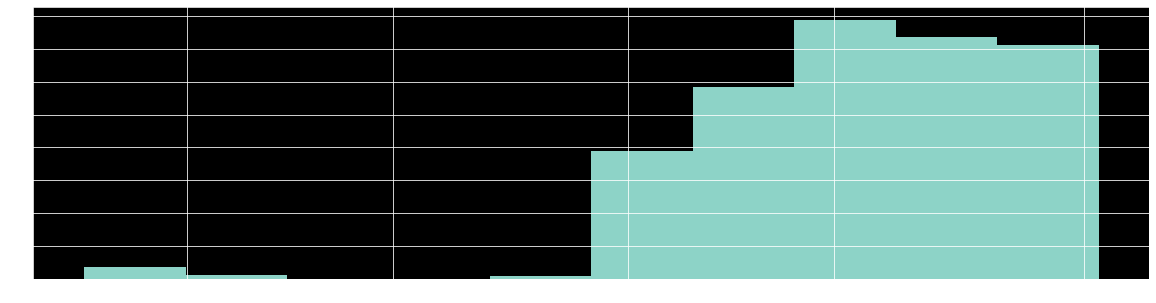

In [0]:
jobs.Posted.hist(figsize=(20,5))

In [0]:
oldest = min(jobs.Closing)
oldest

Timestamp('2020-06-01 00:00:00')

In [0]:
youngest = max(jobs.Closing)
youngest

Timestamp('2021-05-25 00:00:00')

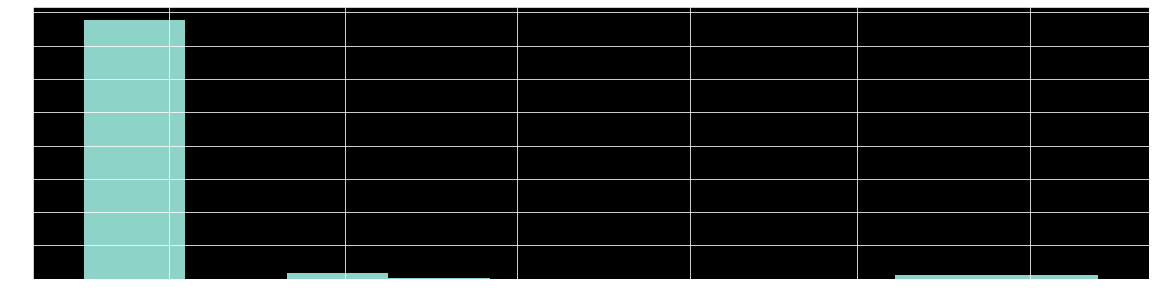

In [0]:
jobs.Closing.hist(figsize=(20,5))
# GovTech hiring non stop

In [0]:
jobs[jobs['Closing']>'2021-01-01 00:00:00']

In [0]:
jobs.drop(['Posted','Closing'],axis=1,inplace=True)

#### 2. SALARY_RANGE

In [0]:
jobs.describe()

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills
count,816,816,813,816,787,816,816,815,753,816
unique,329,665,286,787,11,17,103,235,77,745
top,NANYANG TECHNOLOGICAL UNIVERSITY,Data Scientist,"$4,500to$9,000","Roles & ResponsibilitiesThe project focuses on development of machine learning and image processing algorithms for application in medical image processing and analysis, targeting for real world applications with collaboration with clinicians and industrial leaders.\nSpecific R&D tasks could be:\n\nStudy existing and novel methods for medical image processing and analysis.\nAdopt deep learning / machine learning based method for x-ray / US / CT / MRI image understanding\nDeep learning / machine learning based method for artifact removal\nDevelop and test novel machine learning methods for imaging and image analysis\n\nThe candidate is expected to adopt and develop deep learning / machine learning methods to fulfill the needs of clinical and industrial imaging applications, and assist in development of new technology, system implementation and experiments. He/she is also encouraged to contribute to publication and technology disclosure related to research and industrial projects.\nCore responsibilities include data preprocessing, system integration, adopting and implementing new technologies and conducting experiments and analysis. He/she will be working in a multi-disciplinary team of image processing, signal processing and deep learning, closely working with clinicians and industry partners on impactful projects that have the potential to transform healthcare and deliver improved outcomes.\n\nMaster or Bachelor degree in computer and/ or engineering\nProficient in Java, Python, C/C++ for system development in Linux or Windows\nExperience in image processing and / or deep learning technologies is preferred\n\nThe above eligibility criteria are not exhaustive. A*STAR may include additional selection criteria based on its prevailing recruitment policies. These policies may be amended from time to time without notice. We regret that only shortlisted candidates will be notified.",Professional,Full Time,Information Technology,Islandwide,0 application,AnalysisBusiness StrategyCurriculum DesignData AnalysisE-LearningEnglishHigher EducationLeadershipLecturingManagementMatlabProgrammingProject ManagementPublic SpeakingQualitative ResearchResearchScienceStatisticsTeachingUniversity Teaching
freq,101,17,46,2,295,309,216,139,103,11


In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      813 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         787 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Skills            816 non-null    object
dtypes: object(10)
memory usage: 70.1+ KB


Let's try to impute the salary of the missing numbers

In [0]:
jobs[jobs['Salary_Range'].isnull()]

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills
65,Singapore Polytechnic,Lecturer (Artificial Intelligence & Data Science) - School of Computing,NaN,"Roles & ResponsibilitiesSchool of Computing Lecturer (Artificial Intelligence & Data Science) The job of an academic is challenging and meaningful. Not only should he/she have both the knowledge and working experience, he/she must also possess a passion for working with youths, nurturing them and moulding their characters. There will be opportunities to develop the curriculum, introduce new courses as well as be involved in consultancy and other applied research projects. Administrative work related to teaching and School/Institutional strategic initiatives will be an important part of the job too. Successful candidates will be expected to be resourceful, innovative and with good communication skills. The appointee must be competent to teach the following subjects: Artificial Intelligence (AI) & Machine Learning DevOps & Automation for AI Deep Learning Data Engineering Practical AI The appointee must be competent to supervise poly-wide and industry Applied AI and Analytics projects. Responsibilities:- Conduct lessons, design and develop teaching and assessment materials and facilitate learning of students (youths and adult learners) which includes e-learning activities Curriculum development, assessment setting and associate tasks for modules related to Machine Learning, AI and other foundational ICT. This includes regular review of existing curriculum and make recommendations on areas of improvements that would enhance students’ learning, performance and employability Support student development in areas of mentoring, career guidance and competition training which includes soliciting and supervision student internships Participate in delivery of outreach activities to promote marketing of School of Computing (SoC) course offerings to potential students Keep current and abreast of trends and developments of AI & Data Science Technology Support the SoC’ strategic initiatives through involvement in committee work and projects such as process improvement projects, development and management of new courses Requirements:- Minimum 2 years of relevant industry experience using open source DevOps tools and software as a service solution in the development and implementation of AI and machine learning algorithms Passionate about education and possess strong interest in teaching and mentoring both youths and adult learners Relevant qualifications in the field of Artificial Intelligence, Data Science, Machine Learning Candidates who possess experience in teaching at tertiary level will have an added advantage People-oriented individual with strong interpersonal, written and communication skills with ability to present and explain difficult concepts in a clear and concise manner Self-driven, independent and possess readiness to work as a team Possess working experience in one or more of the following areas: (a) Knowledge of Machine Learning algorithms, Deep Neural Network and Reinforcement Learning (b) Application of Machine Learning/AI in real world industrial settings with large scale data (c) Machine Learning tools like Microsoft Azure ML, IBM Bluemix, Amazon Web Services (d) Distributed processing, database modelling, database development, data pipelines, API design, optimisation, modelling, big data, model implementation, data visualisation, messaging systems (e) Various Machine Learning frameworks such as Keras, TensorFlow, Caffe, Caffe 2, PyTorch,Hadoop YARN, MxNet Closing Date: 2 Jun 2020 If you are shortlisted for the position(s), you should hear from us within 30 days of the closing date of the advertisement.",NaN,Contract,"Information Technology, Public / Civil Service",500 DOVER ROAD 139651,NaN,AnalysisBusiness StrategyCurriculum DesignData AnalysisE-LearningEnglishHigher EducationLeadershipLecturingManagementMatlabProgr

In [0]:
jobs[jobs['Title'].str.contains('Lecture',case=False)&jobs['Company'].str.contains('Poly',case=False)]

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills
65,Singapore Polytechnic,Lecturer (Artificial Intelligence & Data Science) - School of Computing,NaN,"Roles & ResponsibilitiesSchool of Computing Lecturer (Artificial Intelligence & Data Science) The job of an academic is challenging and meaningful. Not only should he/she have both the knowledge and working experience, he/she must also possess a passion for working with youths, nurturing them and moulding their characters. There will be opportunities to develop the curriculum, introduce new courses as well as be involved in consultancy and other applied research projects. Administrative work related to teaching and School/Institutional strategic initiatives will be an important part of the job too. Successful candidates will be expected to be resourceful, innovative and with good communication skills. The appointee must be competent to teach the following subjects: Artificial Intelligence (AI) & Machine Learning DevOps & Automation for AI Deep Learning Data Engineering Practical AI The appointee must be competent to supervise poly-wide and industry Applied AI and Analytics projects. Responsibilities:- Conduct lessons, design and develop teaching and assessment materials and facilitate learning of students (youths and adult learners) which includes e-learning activities Curriculum development, assessment setting and associate tasks for modules related to Machine Learning, AI and other foundational ICT. This includes regular review of existing curriculum and make recommendations on areas of improvements that would enhance students’ learning, performance and employability Support student development in areas of mentoring, career guidance and competition training which includes soliciting and supervision student internships Participate in delivery of outreach activities to promote marketing of School of Computing (SoC) course offerings to potential students Keep current and abreast of trends and developments of AI & Data Science Technology Support the SoC’ strategic initiatives through involvement in committee work and projects such as process improvement projects, development and management of new courses Requirements:- Minimum 2 years of relevant industry experience using open source DevOps tools and software as a service solution in the development and implementation of AI and machine learning algorithms Passionate about education and possess strong interest in teaching and mentoring both youths and adult learners Relevant qualifications in the field of Artificial Intelligence, Data Science, Machine Learning Candidates who possess experience in teaching at tertiary level will have an added advantage People-oriented individual with strong interpersonal, written and communication skills with ability to present and explain difficult concepts in a clear and concise manner Self-driven, independent and possess readiness to work as a team Possess working experience in one or more of the following areas: (a) Knowledge of Machine Learning algorithms, Deep Neural Network and Reinforcement Learning (b) Application of Machine Learning/AI in real world industrial settings with large scale data (c) Machine Learning tools like Microsoft Azure ML, IBM Bluemix, Amazon Web Services (d) Distributed processing, database modelling, database development, data pipelines, API design, optimisation, modelling, big data, model implementation, data visualisation, messaging systems (e) Various Machine Learning frameworks such as Keras, TensorFlow, Caffe, Caffe 2, PyTorch,Hadoop YARN, MxNet Closing Date: 2 Jun 2020 If you are shortlisted for the position(s), you should hear from us within 30 days of the closing date of the advertisement.",NaN,Contract,"Information Technology, Public / Civil Service",500 DOVER ROAD 139651,NaN,AnalysisBusiness StrategyCurriculum DesignData AnalysisE-LearningEnglishHigher EducationLeadershipLecturingManagementMatlabProgr

In [0]:
jobs.loc[65,'Salary_Range']='$3,600to$8,000'

In [0]:
jobs[jobs['Title'].str.contains('engineer',case=False)&jobs['Company'].str.contains('Defence Science',case=False)]

,Company,Title,Salary_Range,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills
39,DEFENCE SCIENCE AND TECHNOLOGY AGENCY,"#SGUnitedJobs Senior Engineer / Engineer, Artificial Intelligence","$4,500to$6,000","Roles & ResponsibilitiesAt DSTA, we develop leading-edge technological and engineering solutions for the defence and security of our nation. Look forward to comprehensive professional and personal development programmes, and grow in a collaborative and dynamic environment. Join us in the engineering, IT or the corporate domains to make an impact on the defence and security of the nation!\nOpportunity\nWe are looking for an individual to join us in our Digital Hub Programme Centre where you will participate in data analytics, artificial intelligence and software development initiatives. The role will require you to:\n\nSolve business problems using machine learning\nBuild complex models and perform exploratory analysis on wealth of data to turn data into actionable insights\nBuild effective partnership with data engineering and data science platform teams on building data pipelines and realisation of data driven systems to improve decision making and deliver business value to MINDEF and SAF\n\nRequirements\n\nTertiary qualification in Data/Business Analytics, Computer Science, Information Systems, Computer Engineering, or related fields\nDemonstrated expertise in manipulating data and developing machine learning models\nGood understanding of deep learning and neural networks concepts\nProficient in Python, R, SQL programming languages\nExcited to gain knowledge in a new domain\nTeam player with good communication skills\nPassionate and self-motivated\n",Fresh/entry level,Permanent,"Information Technology, Public / Civil Service",1 DEPOT ROAD 109679,NaN,AnalysisAnalyticsBusiness AnalysisBusiness IntelligenceBusiness ProcessData AnalysisData ModelingData WarehousingDatabase DesignDatabasesETLIT ManagementManagementMicrosoft SQL ServerProcess ImprovementProject ManagementRequirements AnalysisSDLCSQLStrategy
711,DEFENCE SCIENCE AND TECHNOLOGY AGENCY,"#SGUnitedJobs Senior Engineer / Engineer, Cybersecurity","$3,600to$6,000","Roles & ResponsibilitiesAt DSTA, we develop leading-edge technological and engineering solutions for the defence and security of our nation. Look forward to comprehensive professional and personal development programmes, and grow in a collaborative and dynamic environment. Join us in the engineering, IT or the corporate domains to make an impact on the defence and security of the nation!\nOpportunity \nWe are looking for an individual to join us in our Cybersecurity Programme Centre where you will design and implement holistic information security solutions for Command & Control (C2) and enterprise IT systems. The role will require you to:\n\nDesign, implement, project and system manage the information security infrastructure such as identity & access management systems, network and systems protection, and monitoring systems\nSafeguard enterprise IT systems against unintended or unauthorised access, change and/or destruction through malware analysis or vulnerability assessment\nFormulate and innovate new security approaches using artificial intelligence, machine learning and other analytical techniques\n\nRequirements\n\nTertiary qualification in Computer Science, Information Technology, Computer Engineering, Electrical and Electronics Engineering or a related discipline\nGood knowledge of information security principles and technologies\nPassionate and self-motivated \nCustomer-oriented and innovative\nAble to work both in a team and independently\n\nCandidates with relevant working experience may be considered for a Senior Engineer position.",Fresh/entry level,Permanent,"Information Technology, Public / Civil Service",1 DEPOT ROAD 109679,NaN,CISSPComputer ForensicsComputer SecurityEncryptionFirewallsInformation SecurityInformation Security ManagementIntrusion DetectionLinuxMalwar

In [0]:
# consider similar senior engineer roles based on description, the 10k roles don't look similar
jobs.loc[838,'Salary_Range']='$3,000to$6,000'

In [0]:
jobs.loc[76,'Salary_Range']='$2,800to$2,800'
# found the salary online of 2.8k per month
# https://www.google.com/search?q=%23SGunitedJobs+Manager+%E2%80%93+System+Architect+(TCESO)+(1%2B1+year+contract)&rlz=1C1CHBF_enSG871SG871&oq=%23SGunitedJobs+Manager+%E2%80%93+System+Architect+(TCESO)+(1%2B1+year+contract)&aqs=chrome..69i57.187j0j7&sourceid=chrome&ie=UTF-8&ibp=htl;jobs&sa=X&ved=2ahUKEwjG9cneoOXpAhVQU30KHelbBv0Qp4wCMAF6BAgNEAE#htidocid=iTeDglAnNZTRbIkaAAAAAA%3D%3D&sxsrf=ALeKk014bH0GFl5jaS5OX4H-pDFKHQB4WA:1591173912370

In [0]:
salary = jobs['Salary_Range'].str.split('to',1,expand=True)

In [0]:
salary.columns = ['Salary_Min', 'Salary_Max']

In [0]:
jobs = pd.concat([jobs, salary], axis = 'columns')

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           816 non-null    object
 1   Title             816 non-null    object
 2   Salary_Range      816 non-null    object
 3   Responsibilities  816 non-null    object
 4   Seniority         787 non-null    object
 5   Employment_Type   816 non-null    object
 6   Category          816 non-null    object
 7   Address           815 non-null    object
 8   Applications      753 non-null    object
 9   Skills            816 non-null    object
 10  Salary_Min        816 non-null    object
 11  Salary_Max        816 non-null    object
dtypes: object(12)
memory usage: 122.9+ KB


In [0]:
jobs['Salary_Min'] = jobs['Salary_Min'].map(lambda x : x.replace('$',''))
jobs['Salary_Max'] = jobs['Salary_Max'].map(lambda x : x.replace('$',''))
jobs['Salary_Min'] = jobs['Salary_Min'].map(lambda x : x.replace(',',''))
jobs['Salary_Max'] = jobs['Salary_Max'].map(lambda x : x.replace(',',''))

In [0]:
jobs['Salary_Min'] = pd.to_numeric(jobs['Salary_Min'])
jobs['Salary_Max'] = pd.to_numeric(jobs['Salary_Max'])

In [0]:
jobs.drop('Salary_Range',axis=1,inplace=True)

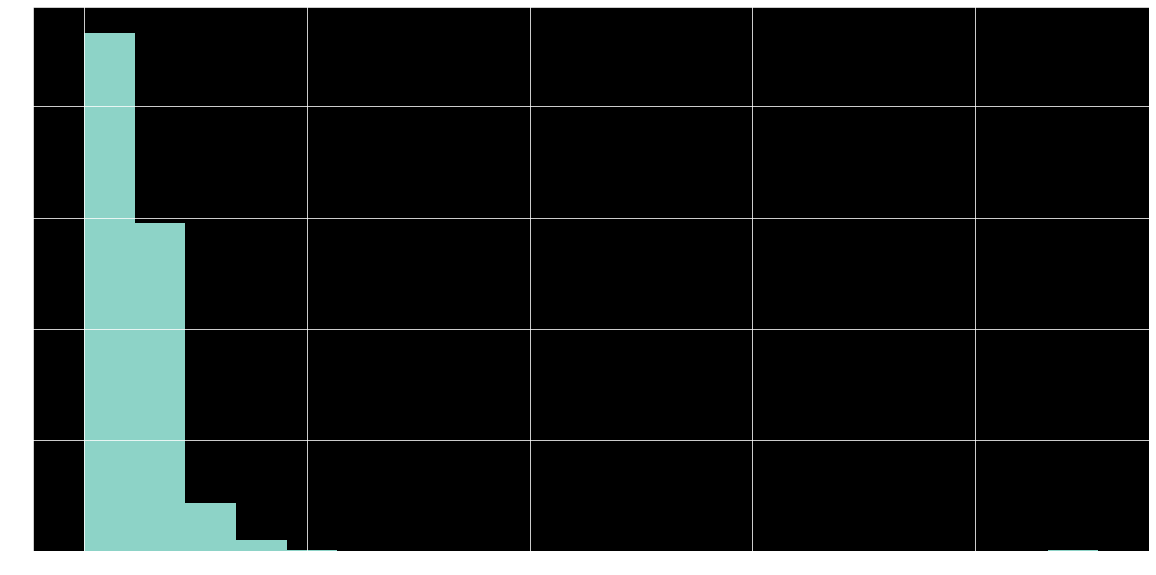

In [0]:
jobs.Salary_Min.hist(figsize=(20,10),bins=20)

In [0]:
jobs[jobs.Salary_Min>30000]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max
598,CRITEO SINGAPORE PTE. LTD.,"Analytics Team Lead, Large Customers, South APAC","Roles & ResponsibilitiesWho we are\nCriteo (NASDAQ: CRTO) is the global technology company powering the world’s marketers with trusted and impactful advertising. 2,800 Criteo team members partner with over 20,000 customers and thousands of publishers around the globe to deliver effective advertising across all channels, by applying advanced machine learning to unparalleled data sets. Criteo empowers companies of all sizes with the technology they need to better know and serve their customers.\n\nWhat You'll Do\n\nManage the operations of Analytics team (also called AX Team), for South Asia & Pacific (South East Asia, Hong Kong, Taiwan, India and Australia/New Zealand); Drive the analytics agenda in APAC so that we keep on raising the bar in terms of quality of client insights provided\nImplement team strategy to sustain growth for the fastest-growing region at Criteo\nGrow key relationships with top advertisers, provide advanced data insights on campaign optimization and customer behavior and being the lead in customer management\nDefine go-to-market approach with commercial leads by shaping Criteo’s pitch and bringing best practices with proper data usage to ensure premium service delivery and client’s retention\nDevelop collaboration with APAC & Global counterparts to increase efficiency of analysts; knowledge sharing and exchange of data science skillsets across regions\nRaise team’s awareness by increasing internal & external knowledge about Criteo product\nDefine operational guidelines on engagement, priorities and resource allocation between business partners and team members\nEmpower team members on the handling of their book of business and their accountability towards business stakeholders\nPromote AX team achievements internally\nBuild a strong partnership with various stakeholders; act as a business partner by proactively enabling them in their business decisions and providing data backed recommendations\nAlign service offerings and priorities of AX team with requirements of management and country-level targets; follow up regularly with different stakeholders\nIdentify and drive the implementation of market wide optimizations\nMain performance measurement is the delivery and performance of the South Asia & Pacific AX team\n\nWhat We Need\n\nPrevious solid experience within Business Intelligence or Data Science space in the online services or a related industry is essential\nGood technical exposure to R programming, Python, SQL (simple and complex queries), Tableau (or other Data Visualization tool), Hadoop, Hive, Vertica, etc.\nMaster’s Degree in computer science, technology or top tier Business & Management with very strong analytical skills\nA strong interest in analytics and statistics and experience in end-to-end problem-solving\nPassionate and driven personality, with strong interest in Ad Tech and e-commerce\nStrong organizational skills to work with remote managers and teams, as well as internal/external stakeholders\nStrong understanding of product development, ability to liaise and influence Product teams\nFlexible to operate across time zones\nContinuous learner and flexibility for adapting and adjusting strategies and/or operations in fast-changing environment\n\nAt Criteo, we dare to be different. We believe that diversity fuels innovation and creates an energy that can be seen and felt all over Criteo. We champion different perspectives and are committed to creating a workplace where all Criteos are heard and feel a sense of belonging.",Manager,Full Time,Advertising / Media,"CAPITAGREEN, 138 MARKET STREET 048946",28 applications,Analytical AbilitiesAnalytical SkillsData VisualizationExcelManagerial ExperiencePythonR ProgrammingSenior Stakeholder ManagementSQLStakeholder Management,91040,152000


In [0]:
# can't tell if its annual or monthly, likely monthly
jobs.loc[598,'Salary_Min']=91040/12
jobs.loc[598,'Salary_Max']=152000/12

In [0]:
jobs[jobs.Salary_Min<20]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max
208,BLUECHIP PLATFORMS ASIA PTE. LTD.,AVP Business Planning Analysis Manager,"Roles & ResponsibilitiesReporting to Head of Financial Planning an Analysis, the incumbent is responsible for the financial management control, planning and analysis functions. The incumbent will work closely with designated business and support unit heads in the following areas:\nJob Responsibilities\nManagement & Performance Management Reporting. Partnering the unit heads to drive performance. Perform monthly financial and statistical analysis and reporting. Coordinate the preparation of annual operating and capital budgets. Monitor, analyze and track budget vs. actual performance of the various lines of business and support centers with a view of expense management. Project and Capital Expenditure Management. Partnering the business and unit heads on review and preparation of business case on product initiative and projects feasibilities\nRequirements/Qualifications\n\nA good degree in Accountancy or Business Administration (major in Finance) and a qualified accountant would be a plus with a minimum of 10 years of experience doing management reporting, financial planning an analysis within the banking and financial service sector.\nProficiency in SAP and other business intelligence tools such as Tableau, Business Object, SAP Lumira/BPC\nExperience in financial modelling and variance analysis\nStrong background in business process analysis and streamlining/re-engineering experience\nStrong knowledge of profitability and performance management concepts, and understanding of key financial instruments and indicators\nStrong managerial, problem-solving experience, analytical, project management, and facilitation skills\nStrong organizational skills, independence of thoughts, high energy and urgency\nGood written/ verbal communication and presentation skills\n\nApply here\nhttps://www.bluechipcareers-asia.com/jobDetails/5696/avp-business-planning-analysis-manager\nFor more Banking and Finance Jobs visit us at:\nhttps://www.bluechipcareers-asia.com/",Manager,Full Time,"Accounting / Auditing / Taxation, Banking and Finance",Islandwide,10 applications,AnalysisBusiness AnalysisBusiness ProcessBusiness Process ImprovementChange ManagementFinancial PlanningLeadershipManagementPerformance ManagementProject ManagementSchedulingControlManaging budgetBusiness Support Unit,1.0,1.0
472,TRADINGPLC VENTURES PTE. LTD.,Proprietary Trader,"Roles & ResponsibilitiesJunior and Senior Funded Trader\nFull time | Executive | Risk Management, Banking & Finance\n\nTradingPLC Ventures is a dynamic company with vision to expand presence globally and make positive impact for the communities and markets.\nWe are looking for Traders-To-Be / Proprietary (prop) Traders in Singapore to fund. This exciting role are mostly for experience traders in the recruitment route. We want someone who is committed and want to secure this rare opportunity.\nIt doesn’t matter if you are a newbie or have little experience in trading. We want an ardent learner who’s always looking to improve their trading skills and want to make serious money consistently.\n\nWe Have:\n- Fun and dynamic environment where our proprietary team is able to discuss valuable information that can help them to profit from market activities.\n- A team of Coaches & Top traders with minimum 10 - 20 years’ experiences.\n- Sophisticated modelling, software and Infrastructure for our Traders to trade.\n- Experience coaches to let you realize outsized trading gains and move to a status of making real money.\n\nThis Job Might Be For You if:\n- You have passion for trading and will be working on your trading strategy daily.\n- You are a keen learner and would like to improve your skills consistently.\n- Willing to Invest your Time and Commitment to build and improve your skill before becoming a pro trader. If you are tal

In [0]:
# trader and business planner seem irrelevant to data science so let's drop it
jobs.drop(472,inplace=True)

In [0]:
jobs.drop(208,inplace=True)

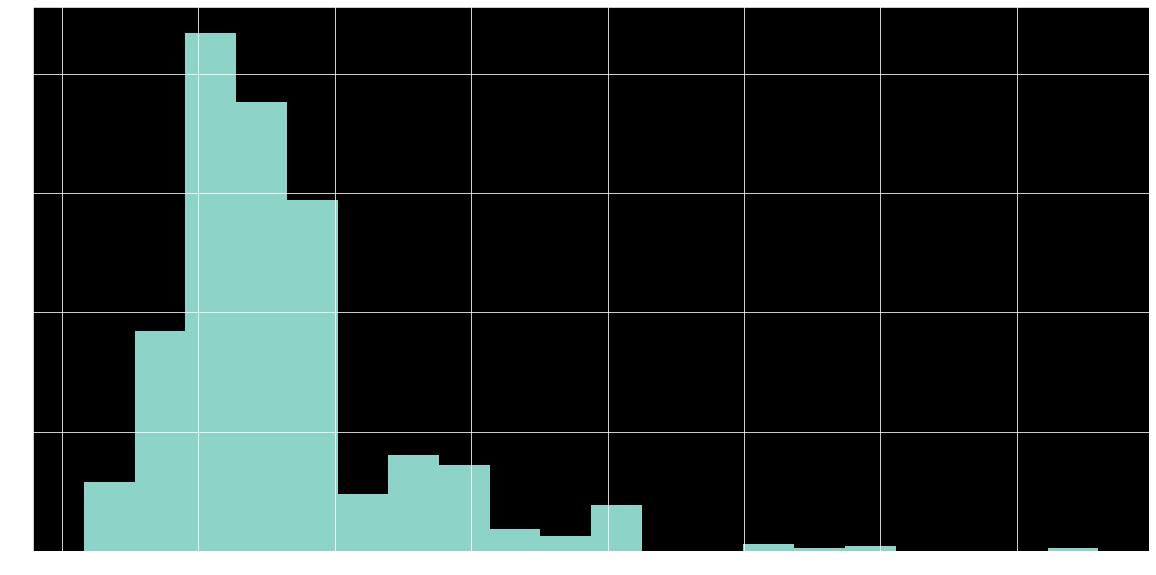

In [0]:
jobs.Salary_Max.hist(figsize=(20,10),bins=20)

In [0]:
jobs[jobs.Salary_Max<1000]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max
751,LYTEHOUSE PTE. LTD.,Marketing Intern,"Roles & ResponsibilitiesJob Overview\nYou….yes you. We want you to join a fast-moving, impact-driven startup that is transforming the physical security space with the latest in machine learning and sensor technology. Lytehouse is the command centre for security control rooms that optimises real-time threat detection from identification to dispatch. \n\nWe are looking for an ambitious, passionate Marketing Intern to help launch our platform in South Africa and grow our digital presence. As an early-stage company, you will have a taste of side of our business and be on the frontline at this exciting time! If you're hard-working, hungry, and love our mission, then apply now!\n\n\nResponsibilities:\n\nCo-create brand book and guidelines\nSupport website revamp\nManage and update the company database and customer relationship management systems (CRM)\nCreate marketing and advertising promotional activities (e.g. social media, direct mail, and web)\nCo-create blog content and videos\nPrepare detailed promotional resources and product manuals\nMonitor all social media platforms for trending news, ideas, and feedback\nResearch and evaluate competitor marketing and digital content\n\n\nRequirements: \n\nPractical understanding of social media strategies and platforms\nExcellent communicator and copywriter\nFlexible work schedule\nTake initiative\nHardworking and dedicated outlook\nAbility to take direction and absorb information quickly\nOutstanding multitasking abilities\nVideo editing and/or graphic design skills preferable\nMust have a passion for impact and for the rollercoaster Startup world!\n",Non-executive,Internship/Traineeship,Marketing / Public Relations,Islandwide,39 applications,CopywritingDigital CopywritingDigital MarketingGraphic DesignMarketingSEO CopywritingSocial MediaSocial Media BloggingSocial Media CommunicationsSocial Media Strategypassionate,500.0,800.0


In [0]:
# Marketing doesn't seem related to data science even though they are marketing ML
jobs.drop(751,inplace=True)

In [0]:
jobs[jobs.Salary_Max>20000]
# no annual remuneration listed

Company  \
81   DBS BANK LTD.                                         
183  CARGILL ASIA PACIFIC HOLDINGS PTE. LTD.               
233  STANDARD CHARTERED BANK (SINGAPORE) LIMITED           
245  CAG REGIONAL SINGAPORE PTE. LTD.                      
281  TIKTOK PTE. LTD.                                      
487  ENVISION DIGITAL INTERNATIONAL PTE. LTD.              
490  EXODUSPOINT CAPITAL MANAGEMENT SINGAPORE, PTE. LTD.   
787  AMAZON WEB SERVICES SINGAPORE PRIVATE LIMITED         
815  SCIENTE INTERNATIONAL PTE. LTD.                       

                                                                                                                                             Title  \
81   SVP, Solution Architect Big Data Analytics (CMP), Group Consumer Banking and Big Data Analytics Technology, Technology & Operations (WD06583)   
183  Full Stack Solution Architect                                                                                                                   
233  Data Commercialization                                                                                                                          
245  Engineer                                                                                                                                        
281  Head of Product and Process, Trust & Safety                                                                                                     
487  Business Development Manager - Weather                                                                                                          
490  Portfolio Manager - Quantitative Strategies                                                                                                     
787  Principal IoT Solution Architect                                                                                                                
815  Head - Technology Innovation & Engineering                                                                                                      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

We create a new column for average salary

In [0]:
jobs['Salary_Average'] = (jobs['Salary_Min'] + jobs['Salary_Max'])/2
jobs['Salary_Average'] = jobs['Salary_Average'].round(1)

#### 3. APPLICATIONS

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           813 non-null    object 
 1   Title             813 non-null    object 
 2   Responsibilities  813 non-null    object 
 3   Seniority         784 non-null    object 
 4   Employment_Type   813 non-null    object 
 5   Category          813 non-null    object 
 6   Address           812 non-null    object 
 7   Applications      750 non-null    object 
 8   Skills            813 non-null    object 
 9   Salary_Min        813 non-null    float64
 10  Salary_Max        813 non-null    float64
 11  Salary_Average    813 non-null    float64
dtypes: float64(3), object(9)
memory usage: 82.6+ KB


In [0]:
jobs['Applications'] = jobs['Applications'].str.replace(' applications','')
jobs['Applications'] = jobs['Applications'].str.replace(' application','')
jobs['Applications'] = pd.to_numeric(jobs['Applications'])

Text(0.5, 1.0, 'Frequency of Applications')

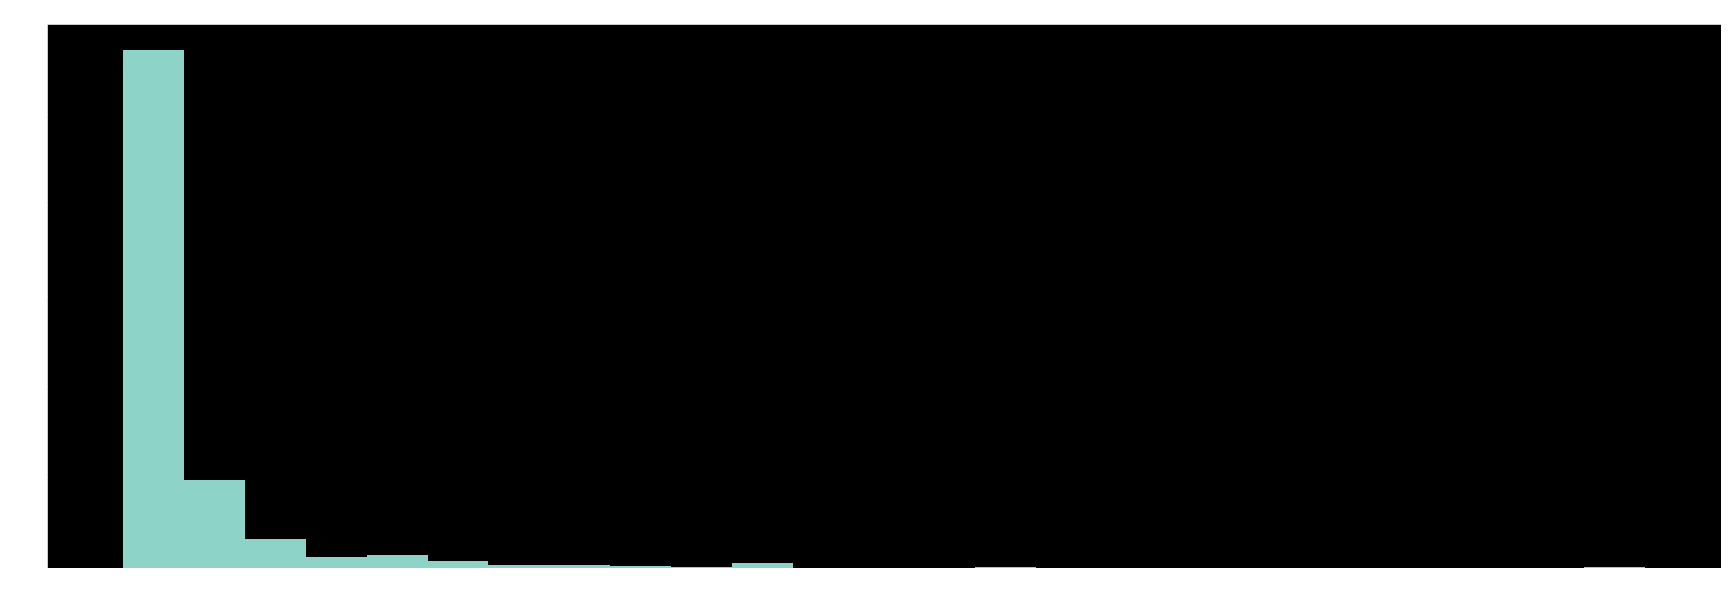

In [0]:
jobs['Applications'].plot(kind='hist', figsize=(30,10),bins=25)
plt.xlabel("Applications", fontsize=10)
plt.title("Frequency of Applications", fontsize=16)

In [0]:
jobs[jobs.Applications>75]

Company  \
13   HANALYTICS PTE. LTD.                          
179  UBISOFT SINGAPORE PTE. LTD.                   
189  SALESFORCE.COM SINGAPORE PTE. LTD.            
196  SURBANA JURONG PRIVATE LIMITED                
244  CANOPY PTE. LTD.                              
292  DELIVEROO SINGAPORE PTE. LTD.                 
405  PHILLIP SECURITIES PTE LTD                    
466  NINJA LOGISTICS PTE. LTD.                     
478  DELIVEROO SINGAPORE PTE. LTD.                 
500  DELIVEROO SINGAPORE PTE. LTD.                 
502  DELIVEROO SINGAPORE PTE. LTD.                 
563  DELL GLOBAL B.V. (SINGAPORE BRANCH)           
621  SAMTECH INTELLIGENCE PTE. LTD.                
740  ARAMCO TRADING SINGAPORE PTE. LTD.            
823  STAFFONDEMAND PTE. LTD.                       
834  KEYREPLY PTE. LTD.                            
841  SINGAPORE INDEX TRADING INSTITUTE PTE. LTD.   

                                           Title  \
13   Machine Learning Associate / Engineer         
179  Data Scientist                                
189  Sales Strategy Futureforce Associate          
196  Director, IT Application Systems              
244  Graduate - Data Analyst (#FinTech #Startup)   
292  Operations Director                           
405  Trader                                        
466  Regional Sales & Planning Manager             
478  Operations Associate                          
500  Operations Manager                            
502  Finance and Strategy Manager                  
563  Data Scientist                                
621  Data Science Analyst #SGUnitedTraineeships    
740  Data Analyst                                  
823  Accounts Executive                            
834  Business Development Manager                  
841  Junior Trader                                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [0]:
# dropping irrelevant jobs
jobs.drop([292,405,478,500,502,841,834,823],inplace=True)

Deliveroo,myrepublic jobs all have alogorithm in the description and might be worth taking a look at to see if their postings are valid

In [0]:
jobs[jobs['Company'].str.contains('deliveroo',case=False)]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average


In [0]:
jobs[jobs['Company'].str.contains('republic',case=False)]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average


In [0]:
jobs.Applications.median()

4.0

In [0]:
# we will just assume that these jobs have 4 applications which is the median anyway
jobs.Applications.fillna(4,inplace=True)

### 3.4.2 Categorical Features

#### 1. COMPANY

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           805 non-null    object 
 1   Title             805 non-null    object 
 2   Responsibilities  805 non-null    object 
 3   Seniority         776 non-null    object 
 4   Employment_Type   805 non-null    object 
 5   Category          805 non-null    object 
 6   Address           804 non-null    object 
 7   Applications      805 non-null    float64
 8   Skills            805 non-null    object 
 9   Salary_Min        805 non-null    float64
 10  Salary_Max        805 non-null    float64
 11  Salary_Average    805 non-null    float64
dtypes: float64(4), object(8)
memory usage: 81.8+ KB


In [0]:
jobs.Company.unique()

array(['NANYANG TECHNOLOGICAL UNIVERSITY', 'AVNET ASIA PTE LTD',
       'ONEBERRY TECHNOLOGIES PTE. LTD.',
       'CAPITALAND BUSINESS SERVICES PTE. LTD.',
       'A*STAR RESEARCH ENTITIES', 'PALO IT SINGAPORE PTE. LTD.',
       'HANALYTICS PTE. LTD.', 'AMARIS.AI PTE. LTD.',
       'SINGTEL MOBILE SINGAPORE PTE. LTD.', 'STAFFONDEMAND PTE. LTD.',
       'ADECCO PERSONNEL PTE LTD', 'JABIL CIRCUIT (SINGAPORE) PTE. LTD.',
       'INSPIRE RECRUITMENT CONSULTING PTE. LTD.',
       'SCIENTE INTERNATIONAL PTE. LTD.',
       'HOESTAR PD TECHNOLOGY PTE. LTD.',
       'ST ENGINEERING LAND SYSTEMS LTD.',
       'TRANSFORMA ROBOTICS PTE. LTD.',
       'DEFENCE SCIENCE AND TECHNOLOGY AGENCY',
       'NATIONAL UNIVERSITY HEALTH SYSTEM PTE. LTD.',
       'EASYMILE PTE. LTD.', 'MEDIATEK SINGAPORE PTE. LTD.',
       'PANASONIC ASIA PACIFIC PTE. LTD.', 'GENIEBOOK PTE. LTD.',
       'SNAPHUNT PTE. LTD.', 'NATIONAL UNIVERSITY OF SINGAPORE',
       'TECHNOLOGY CENTRE FOR OFFSHORE AND MARINE, SINGAPORE LTD.'

We try to remove common words that might interfere with our data analysis later on and try to group mispelt companies?

In [0]:
str_company =[' PTE. LTD.',' PTE. LIMITED',' PTE LTD', 'PRIVATE LIMITED', '(PTE. LTD.)',
              ' LIMITED',' LTD.',' LTD',
              '(PTE)',
              ' INC.',
]

In [0]:
for i in str_company:
  jobs.Company = jobs.Company.str.replace(i,'')

In [0]:
jobs['Company'] = jobs['Company'].str.replace('[^\w\s]','')

In [0]:
jobs['Company']= jobs['Company'].str.title()

In [0]:
jobs.Company.unique()

array(['Nanyang Technological University', 'Avnet Asia',
       'Oneberry Technologies', 'Capitaland Business Services',
       'Astar Research Entities', 'Palo It Singapore', 'Hanalytics',
       'Amarisai', 'Singtel Mobile Singapore', 'Staffondemand',
       'Adecco Personnel', 'Jabil Circuit Singapore',
       'Inspire Recruitment Consulting', 'Sciente International',
       'Hoestar Pd Technology', 'St Engineering Land Systems',
       'Transforma Robotics', 'Defence Science And Technology Agency',
       'National University Health System', 'Easymile',
       'Mediatek Singapore', 'Panasonic Asia Pacific', 'Geniebook',
       'Snaphunt', 'National University Of Singapore',
       'Technology Centre For Offshore And Marine Singapore',
       'Dso National Laboratories',
       'Inland Revenue Authority Of Singapore',
       'Infineon Technologies Asia Pacific',
       'Occutrack Medical Solutions', 'Infinium Robotics',
       'Singapore Polytechnic', 'Starhub',
       'Desay Sv Aut

In [0]:
jobs.Company.value_counts().head(30)

Nanyang Technological University                       101
Astar Research Entities                                74 
National University Of Singapore                       26 
Government Technology Agency                           20 
Jpmorgan Chase Bank Na                                 15 
Dbs Bank                                               11 
Technology Centre For Offshore And Marine Singapore    10 
Institute Of Technical Education                       10 
Ministry Of Home Affairs                               9  
Staffondemand                                          8  
Defence Science And Technology Agency                  8  
Adecco Personnel                                       8  
Goldman Sachs Services Singapore                       7  
Ernst  Young Advisory                                  7  
Tiktok                                                 6  
Dso National Laboratories                              6  
Amarisai                                               6

#### 2. ADDRESS/POSTAL

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 847
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           805 non-null    object 
 1   Title             805 non-null    object 
 2   Responsibilities  805 non-null    object 
 3   Seniority         776 non-null    object 
 4   Employment_Type   805 non-null    object 
 5   Category          805 non-null    object 
 6   Address           804 non-null    object 
 7   Applications      805 non-null    float64
 8   Skills            805 non-null    object 
 9   Salary_Min        805 non-null    float64
 10  Salary_Max        805 non-null    float64
 11  Salary_Average    805 non-null    float64
dtypes: float64(4), object(8)
memory usage: 81.8+ KB


In [0]:
jobs[jobs.Address.isnull()]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average
620,Smart Nation And Digital Government Office,"Manager / Senior Manager (Standards, Cybersecurity & Quality Assurance), Policy and Governance","Roles & ResponsibilitiesA. Company Description The Smart Nation and Digital Government Office (SNDGO), under the Prime Minister’s Office (PMO) plans and prioritizes key Smart Nation and digital government projects, raises the standards of Government ICT and services, builds long-term capabilities for the public sector, and promotes adoption and participation in digital and smart innovations. It takes a whole-of-nation effort, and we will actively engage the public, the industry and fellow agencies as we build a Smart Nation together. We are looking for self-motivated and curious individuals who value integrity, teamwork, and excellence. If you share our passion in shaping Singapore into a Smart Nation, we welcome you to join us! B. Responsibilities The Standards, Cybersecurity & Quality Assurance team was formed with the purpose of creating the right governance structures and policies to improve the cost-effectiveness, usability, and security of Government ICT systems. How the Government uses ICT is undergoing a step change with our move towards a Smart Nation. As such, the team is looking at how our existing governance structures and policies needs to be transformed to support and drive this change. In this role, you will: Work with stakeholders to set out the intent of policy areas (e.g. ICT audit, security, development, AI Governance) Develop and execute strategies to ensure effective policy implementation Support senior management in making trade-offs between security, usability, and costs on key ICT policies. This role reports to a Senior Assistant Director. C. Requirements [Work Experience & Competencies] An ideal candidate should possess the following: Strong analytical and writing skills Ability to communicate complex ideas effectively, both verbally and in writing Strong communication and interpersonal skills to engage a wide spectrum of external and internal stakeholders; including multi-agency and inter-departmental teams Strong record of leadership in an academic, professional, or extracurricular setting Appreciation of ICT including cloud computing and cybersecurity, and/or emerging technologies (e.g. machine learning / AI). Having the following job experience is advantageous: Developing policies and strategies within a large organisation or experience in consulting, a start-up or other business environment Having presented recommendations to senior stakeholders and management Experience in software development, ICT project management, cybersecurity, or data science [Personal Traits] Strong sense of ownership of outcomes, and confidence to assess and express one’s own view on how to drive these outcomes, and identification with the Smart Nation Vision Analytical, with good critical thinking and an eye for details Curious, willing to build up ICT knowledge and keep up with technological trends Being adept at prioritising and managing between multiple workstreams Being comfortable with accepting and responding to changes, amidst pressing deadlines D. Others Only shortlisted applicants will be notified within 2 weeks after closing date.Successful candidates will be offered a 2-year contract in the first instance.",NaN,Permanent,Public / Civil Service,NaN,4.0,Business StrategyChange ManagementCoachingEmployee EngagementEmployee RelationsHuman ResourcesLeadershipLeadership DevelopmentManagementOrganizational DevelopmentPerformance ManagementProject ManagementRecruitingStrategic PlanningStrategyTalent AcquisitionTalent ManagementTeam BuildingTeam LeadershipTraining,4000.0,7500.0,5750.0


In [0]:
jobs.Address.fillna('109 North Bridge Road, #06-01 Funan O2 Office, Singapore 179097',inplace=True)

In [0]:
jobs.Address.unique()

array(['NANYANG TECHNOLOGICAL UNIVERSITY, 50 NANYANG AVENUE 639798',
       'NEW TECH PARK, 151 LORONG CHUAN 556741', 'Islandwide',
       'Connexis, 1 Fusionopolis Way 138632',
       'GOLDEN AGRI PLAZA, 108 PASIR PANJANG ROAD 118535',
       'COMCENTRE, 31 EXETER ROAD 239732', '81 VICTORIA STREET 188065',
       'SHAW CENTRE, 1 SCOTTS ROAD 228208',
       '16 TAMPINES INDUSTRIAL CRESCENT 528604',
       'MACTECH BUILDING, 2 KALLANG PUDDING ROAD 349307',
       'UOB PLAZA, 80 RAFFLES PLACE 048624', '249 JALAN BOON LAY 619523',
       'Immunos, 8A Biomedical Grove 138648', '2 CLEANTECH LOOP 637144',
       '1 DEPOT ROAD 109679', '1E KENT RIDGE ROAD 119228',
       '173A TELOK AYER STREET 068622',
       'SOLARIS, 1 FUSIONOPOLIS WALK 138628',
       '202 BEDOK SOUTH AVENUE 1 469332',
       'LINK@AMK, 3 ANG MO KIO STREET 62 569139',
       'Cuppage Terrace, 29A Cuppage Road 229456',
       '21 LOWER KENT RIDGE ROAD 119077',
       'THE MENDEL, 12 SCIENCE PARK DRIVE 118225',
       'REVE

lets extract the **postal code** using regex and use that instead of **Address**


In [0]:
import re

In [0]:
search = []    
for values in jobs['Address']:
    try:
      search.append(re.search(r'\d{1,6}$', values).group())
    except:
      search.append('undisclosed')
jobs['Postal'] = search

In [0]:
jobs['Address'] = jobs['Address'].str.replace('[^\w\s]','')

In [0]:
jobs.Address[jobs.Postal=='undisclosed'].value_counts()
# these data were not going to give any address anyway

Islandwide    133
Name: Address, dtype: int64

#### 3. SENIORITY

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 0 to 847
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           805 non-null    object 
 1   Title             805 non-null    object 
 2   Responsibilities  805 non-null    object 
 3   Seniority         776 non-null    object 
 4   Employment_Type   805 non-null    object 
 5   Category          805 non-null    object 
 6   Address           805 non-null    object 
 7   Applications      805 non-null    float64
 8   Skills            805 non-null    object 
 9   Salary_Min        805 non-null    float64
 10  Salary_Max        805 non-null    float64
 11  Salary_Average    805 non-null    float64
 12  Postal            805 non-null    object 
dtypes: float64(4), object(9)
memory usage: 88.0+ KB


In [0]:
jobs.Seniority.value_counts(dropna=False)

Professional          294
Executive             135
Senior Executive      96 
Fresh/entry level     76 
Manager               57 
Middle Management     41 
Junior Executive      36 
NaN                   29 
Non-executive         21 
Senior Management     19 
Manager, Executive    1  
Name: Seniority, dtype: int64

In [0]:
jobs[jobs.Seniority=='Manager, Executive']

Company                         Title  \
746  Staffondemand  Marketing Technology Manager   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [0]:
jobs.loc[746,'Seniority']='Manager'

In [0]:
# looking at min max of each category to find outliers
seniority_types = jobs.Seniority.value_counts().index
seniority_types
for i in seniority_types:
  print(i)
  print(jobs.Salary_Average[jobs.Seniority==i].min())
  print(jobs.Salary_Average[jobs.Seniority==i].max())

Professional
3250.0
29000.0
Executive
1850.0
21000.0
Senior Executive
3600.0
15500.0
Fresh/entry level
1450.0
8500.0
Manager
3500.0
20708.0
Middle Management
2700.0
20500.0
Junior Executive
2250.0
9000.0
Non-executive
2950.0
9000.0
Senior Management
5500.0
22500.0


In [0]:
avg_salary=jobs.groupby('Seniority').agg({'Salary_Average':'mean'})
avg_salary

,Salary_Average
Seniority,
Executive,6131.477778
Fresh/entry level,3867.098684
Junior Executive,4754.722222
Manager,8464.391379
Middle Management,7797.560976
Non-executive,5643.404762
Professional,6649.782313
Senior Executive,7154.286458
Senior Management,12615.973684


Based on the salary ranges, the progression seems to be:

In [0]:
progression = ['Fresh/entry level','Junior Executive','Executive','Professional','Senior Executive','Middle Management','Manager','Senior Management','Non-executive']

In [0]:
jobs[(jobs.Seniority=='Executive')&(jobs.Salary_Average>15000)]
# feels like an annual salary OR professional role

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average,Postal
245,Cag Regional Singapore,Engineer,"Roles & ResponsibilitiesTHE ROLE\nIn an exciting, international and fast-paced work environment, you will be given challenging and diverse opportunities every day. You will work closely with the Chief Technology Officer (CTO) and fellow Engineers, collaborate on building a new, high caliber development team responsible for all core technology build out (all stack tiers) for the CompareAsiaGroup platforms to be deployed in markets across Asia.\n\nYOUR TASK\n\nHelping to craft and implement the data infrastructure and analytical systems at Compare Asia Group\nApplying sound data engineering principles and innovative data science to improve the financial lives of our customers\nSupporting a data-driven culture by building democratic, self-service data management and analysis tools with data privacy and governance as primary design goals\nEngaging with data stakeholders (including application engineers, management teams, business analysts and data scientists) as a subject matter expert on data engineering practices and the application of data science to complex business problems\n\nSKILLS & REQUIREMENTS\n\nYou will have an engineering mindset with deep familiarity with modern software engineering practices\n5+ years professional experience developing high quality code in one or more of Java, Scala or Python\n5+ years professional experience with data-wrangling and visualization with relational and non-relational databases\nProfessional experience designing and implementing critical path data pipelines and scalable data lake architectures, ideally within a cloud platform\nProfessional experience working across the data engineering and data science technology landscape such as Spark, Jupyter, Snowflake, Kubeflow and data visualization tools such as Tableau, Superset and Metabase\nExperience with the implementation and deployment of machine learning in the areas of customer lifetime value, marketing personalization and product recommendation\nExperience deploying predictive modeling and statistical analysis techniques to build end-to-end production-ready solutions with associated monitoring, quality control and metadata capture\nExcellent verbal and written communication skills\n\nCORE COMPETENCIES\n\nDemonstrated code implementation in a commercial environment\nFluency in an Object Oriented language (preferably Java)\nFast and Adaptive Learning\n",Executive,Permanent,Information Technology,22A MOSQUE STREET 059502,6.0,DataEngineeringLinuxManagementManufacturingMatlabMicrosoft OfficeProject ManagementTestingsystemenvironmentdeveloping teamsAbility to work creativelychallengingplatformdata infrastructure,14000.0,28000.0,21000.0,059502


In [0]:
jobs.loc[245,'Seniority']='Professional'

In [0]:
jobs[(jobs.Seniority=='Senior Executive')&(jobs.Salary_Average>10000)]

Company  \
108  Carousell                               
363  Optimum Solutions Singapore             
458  Siemens Healthcare                      
626  Jpmorgan Chase Bank Na                  
651  Jpmorgan Chase Bank Na                  
686  Ibm Innovation Services                 
758  Jpmorgan Chase Bank Na                  
759  Jpmorgan Chase Bank Na                  
762  Jpmorgan Chase Bank Na                  
788  Jpmorgan Chase Bank Na                  
837  Keysight Technologies Singapore Sales   

                                                                   Title  \
108  Senior Data Scientist                                                 
363  Full Stack Java Developer                                             
458  Senior Data Scientist                                                 
626  Software Engineer - Cloud Computing, Observability                    
651  Wholesale Payments Data & Analytics, Data Scientist, Vice President   
686  AP Lead AI Scientist                                                  
758  Core Engineering Technology, Software Engineer, Vice President        
759  Core Engineering Technology, Software Engineer, Vice President        
762  Cybersecurity Intelligence Group Analyst - Fraud, VP                  
788  Migration Project Execution, Global Technology Infrastructure, VP     
837  R&D Engineer 6, Software                                              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [0]:
jobs[(jobs.Seniority=='Senior Executive')&(jobs.Salary_Average<5000)]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average,Postal
32,Hoestar Pd Technology,machine learning engineer,"Roles & ResponsibilitiesJob Brief Description\nWe are looking for a Machine Learning (ML) Engineer to help us create artificial intelligence products. Your ultimate goal will be to shape and build efficient self-learning applications\nResponsibilities\nDesigning and developing machine learning and deep learning systems\nRunning machine learning tests and experiments\nImplementing appropriate ML algorithms\nCreating machine learning models and retraining systems. To do this job successfully, you need exceptional skills in statistics and programming.\nKnowledge of data science and software engineering\nStudy and transform data science prototypes\nDesign machine learning systems\nResearch and implement appropriate ML algorithms and tools\nDevelop machine learning applications according to requirements\nSelect appropriate datasets and data representation methods\nRun machine learning tests and experiments\nPerform statistical analysis and fine-tuning using test results\nExtend existing ML libraries and frameworks\nKeep abreast of developments in the field\nDevelop process and tools to monitor and analyse ML model performance and data accuracy\nRequirements\nProven experience as a Machine Learning Engineer or similar role\nUnderstanding of data structures, data modeling and software architecture\nDeep knowledge of math, probability, statistics and algorithms\nExpertise in visualizing and manipulating big datasets\nAbility to write robust code in Python, Java and R, etc\nFamiliarity with machine learning frameworks (like Keras or PyTorch) and libraries (like scikit-learn)\nExcellent communication skills\nAbility to work in a team\nOutstanding analytical and problem-solving skills\nBSc in Computer Science, Mathematics or Electrical & Electronic Engineering (a plus); Master’s degree is an added advantage",Senior Executive,Full Time,Engineering,MACTECH BUILDING 2 KALLANG PUDDING ROAD 349307,12.0,Machine LearningPythonSoftware EngineeringStatisticsdesignedsystemefficientAIMLDeep learning,4000.0,4500.0,4250.0,349307
58,Capitaland Business Services,Data Scientist,"Roles & ResponsibilitiesThe Job\nAs a member of the Data & Insights team, you will leverage your strong collaboration skills and ability to extract valuable insights from highly complex data sets to ask the right questions and find the right answers.\n\nResponsibilities\n\nWork with business analysts and internal stakeholders to identify business problems and opportunities, propose analytics solutions, data and technology requirements, and formalize it into a project. The analytics solutions include but not limited to report automation, descriptive analytics and advanced analytics.\nWork with data engineers to plan, identify and integrate data from multiple source systems to enterprise data platform for analytics purpose.\nPerform data exploration, preprocess and analyze the data, structured or unstructured, develop and deploy machine learning/deep learning models.\nCreate the dashboard, communicate and present key findings to stakeholders and manage UAT.\nWork with the team to run and prioritize projects according to objectives and business impact.\n\nRequirements\n\nBachelor's degree or equivalent experience in quantative field (Statistics, Mathematics, Computer Science, Engineering, etc.)\nAt least 3 years' of relevant work experience\nDeep understanding of machine learning and deep learning algorithms and experience with open-source libraries such as TensorFlow, Keras, Pytorch, Scikit-Learn etc.\nFluency in a programming language (Python, R, SQL, etc.)\nFamiliarity with Big Data frameworks and visualization tools (Power BI, Hadoop, Spark, Tableau, etc.)\nGood collaboration and communication skills to work effectively across teams and partner with business stakeholders.\n\nCorporate Title

In [0]:
jobs[(jobs.Seniority=='Fresh/entry level')&(jobs.Salary_Average>5000)]

Company  \
36   Astar Research Entities                 
39   Defence Science And Technology Agency   
235  Micron Semiconductor Asia Operations    
279  Astar Research Entities                 
384  Jpmorgan Chase Bank Na                  
393  Jpmorgan Chase Bank Na                  
413  Astar Research Entities                 
504  Presto Labs                             
574  Defence Science And Technology Agency   
673  Astar Research Entities                 
703  Southern Ridges Capital                 
740  Aramco Trading Singapore                
818  Defence Science And Technology Agency   
826  Defence Science And Technology Agency   

                                                                  Title  \
36   #SgUnitedJobs Research Fellow (AI / Bioinformatician)  /  SIgN       
39   #SGUnitedJobs Senior Engineer /  Engineer, Artificial Intelligence   
235  Data Scientist - Image Analytics                                     
279  #SgUnitedJobs Senior Research Engineer (IIoT Data Analytic), I3      
384  2020 SOFTWARE ENGINEER PROGRAM – FULL TIME – SINGAPORE               
393  2020 Software Engineer Program - Full-Time - Singapore               
413  #SgUnitedJobs Research Fellow (LBOI, SBIC)                           
504  Software Engineer                                                    
574  #SGUnitedJobs Software Developer, Cybersecurity                      
673  #SGUnitedJobs Senior /  Research Engineer (Cybersecurity), I2R       
703  Quant Research Analyst                                               
740  Data Analyst                                                         
818  #SGunitedJobs Senior Engineer  /  Engineer, Software Engineering     
826  #SGUnitedJobs Senior Engineer /  Engineer, Data Engineering          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [0]:
jobs[(jobs.Seniority=='Manager')&(jobs.Salary_Average<5000)]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average,Postal
5,Oneberry Technologies,Engineer (Proof of Concepts) #SGUNITEDJOBS,"Roles & ResponsibilitiesWe are a Security Technology company serving Government Agencies providing Essential Services.\n\nResponsibilities\n\nReporting directly to the Back-end Technical Manager, the following are the tasks and responsibilities of the POC Engineer:\n\na. Supporting Business Development Teams with pre-sales support in the form of Proof Of Concept CCTV, Wireless Networking and Video \nSurveillances projects, providing new solutions not available in the market\n\nb. Liaison with Clients in obtaining all necessary requirements in order to propose a solution and turning it into working POCs\n\nc. Draft proposals for solutions and conduct presentations to both Frontline and Back-end Technical Managers and General Manager for approval prior to submissions to BD\n\nd. As a Team together with BD to meet clients to present and propose POCs\n\ne. Upon receipt of client’s approval for POC, to independently build the working POCs\n\nf. To support and maintain the developed and installed POCs on site\n\ng. To provide additional support to both the Frontline and Back End \nManagers as and when required\n\nRequirements\n\n- Able to work independently and have a natural inclination to build Proof Of Concepts for both indoor and outdoor CCTV, Wireless networking, Surveillance Video Streaming solutions background are pre-requisites for this position\n\n- Working knowledge in both electronics and software programming or coding skillsets\n\n- Previous experience and exposure in a similar capacity is an added advantage\n\n- Min ITC/Diploma in Electronics/Mechatronics/Electrical\n\n- Outgoing personality and enjoy meeting clients to understand customers’ requirements\n\n- Able to translate clients requirements from initial meeting, to drafting of proposals up to the final stage of building the working Proof of Concept and installation\n\n- Working knowledge of Video Analytics and AI deep learning both on edge and servers are pre-requisites for this position\n\n- Singaporeans preferred, completed NS in SPF is also an added advantage\n\n- Min 2 years of working experience in a similar position\n\nLocation: Bishan",Manager,Full Time,Security and Investigation,Islandwide,7.0,Account ManagementC ProgrammingCCTVEquipment InstallationSurveillanceWireless Networkingstrategic business development managementpre-sales supportGovernment AgencyProof of ConceptSecurity technology,3000.0,4000.0,3500.0,undisclosed
29,Nanyang Technological University,Research Fellow,"Roles & ResponsibilitiesA Research Fellow position is currently available in the Bio-Data Science and Education Laboratory, School of Biological Sciences, Nanyang Technological University, Singapore.\n\nResponsibilities\n\nExplore how data science, artificial intelligence and machine learning may be deployed towards investigating signs of human-based deep learning\nIdentify useful feature sets that may predict future performance and develop tools and applications that help learners acquire higher levels of proficiency\nUnderstand and measure how students acquire non-academic abilities, e.g. teamwork, leadership, communication, resilience and adaptability\nThe setting will be on NTU’s unique experiential learning DEEP programme\n\nRequirements\n\nPhD in Data Science, Computer Science, Information Science (other relevant degrees may also be considered)\nIndicators of high productivity and motivation even if you have no experience working on education technology (Edtech) projects\n\nYou will be jointly supervised by Dr Wilson Goh, Bio-Data Science and Education Laboratory (School of Biological Sciences) and Dr Sze Chun Chau, Director of Experiential Learning (President’s Office), Nanyang Technological University.\n\nWe regret only shortlisted candidates will be notified.\n",Manager,"Con

In [0]:
jobs.loc[367,'Seniority']='Non-executive'
jobs.loc[29,'Seniority']='Non-executive'
jobs.loc[5,'Seniority']='Executive'

In [0]:
jobs[(jobs.Seniority=='Middle Management')&(jobs.Salary_Average<5000)]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average,Postal
136,Icon Resources And Technologies,Business Development Manager,"Roles & ResponsibilitiesSr. Manager/ Business Development Manager Software Solutions\nJob profile:\n1. Lead generation and qualification of prospects\n2. New customer acquisition\n3. Visiting corporate customers in Singapore and presenting the Company range of solutions and services to them\n4. Product demonstration\n5. Understanding the market potential.\n6. Understanding clients processes and position product correctly\n7. Should take the initiative and create opportunities to drive more business from the clients\n8. Working closely with the technical team for proof of concepts as per the customer requirements\n9. Monitor customer preferences to determine focus of sales efforts\nJob Requirements\n3 to 10 years’ experience in sales of software solutions and services to corporate customers. Background in sales of Business Intelligence, Business Process Management, ERP or Document Management solutions will be an added advantage\n1. Excellent communication and presentation skills\n2. A flair for technology sales.\n3. Singapore citizens / PRs only",Middle Management,"Permanent, Full Time","Information Technology, Sales / Retail",TANNERY HOUSE 37 TANNERY LANE 347790,16.0,Business DevelopmentBusiness StrategyClient AcquisitionNew Business DevelopmentProduct DemonstrationQlikViewSalesGenerate leadsstrategic business development managementInitiativemarket potential,3500.0,5000.0,4250.0,347790
140,Icon Resources And Technologies,Presales - Consultant BI,"Roles & ResponsibilitiesJob Description\nAs part of our expansion plans, we are looking for a Presales Consultant- BI based out of Singapore.\nRoles & Responsibility:\nResponsible for designing and architecting Technical Solutions using BI tools\nAct as a knowledgeable and trusted advisor to clients on the Business Analytics capabilities offered and identify appropriate implementation and deployment options for their solution.\nProvide technical expertise in BI to help design personalized customer solutions at the start of the sales process\nBuild confidence that a solution will deliver and develop prototypes of solutions against industry or specific customer requirements.\nWork closely with sales teams and use BI insight and experience to craft winning propositions ( RFP, Capability Presentations, POCs)\nGo to person for Sales team when BI analytics and visualization is the topic of interest for customers\nJob Requirements\nRequirements:\n\nA Bachelor’s Degree in Computer Science or equivalent\n5 + years of experience in Presales for Business Intelligence or Business Process Management , Business Applications like ERP, CRM,\nMust be a subject matter expert with extensive BI experience.\nAn ability to communicate technical information to non-technical staff in a way that is easy to understand.\nMust demonstrate a high level of functional expertise and experience.\nHands on expertize on Qlik Product Family ( Qlik View, Qlik Sense, NPrinting ) is mandatory\nExperience in Power BI, Tableau, Cognos BI would be preferred\nStrong knowledge in RDBMS/DWH concepts\nStrong Client Relationship and engagement skills\nExceptional presentation and demo capabilities\n\nExcellent written and spoken English",Middle Management,"Permanent, Full Time","Information Technology, Others",TANNERY HOUSE 37 TANNERY LANE 347790,2.0,Business AnalyticsBusiness IntelligenceCRMEnterprise SoftwareJob DescriptionsPre-salesQlikViewQlikView DevelopmentSolution Architecturedesignedknowledgeable,3000.0,6000.0,4500.0,347790
241,Government Technology Agency,#SGUnitedJob Data Analytics Lead,"Roles & ResponsibilitiesAre you interested in leading a data science team and excited to showcase how data can optimize the agency’s work processes? We are looking for a Data Analytics Lead who will help drive a strong data science cult

In [0]:
jobs.drop([753,288,140,136],inplace=True)
jobs.loc[578,'Seniority']='Fresh/entry level'

In [0]:
jobs[(jobs.Seniority=='Junior Executive')&(jobs.Salary_Average>5000)]

Company  \
100  Sensetime International                 
213  Mts Global                              
236  Carat Media Services Singapore          
314  Twitter Asia Pacific                    
406  Goldman Sachs Services Singapore        
486  Keysight Technologies Singapore Sales   
582  Adecco Personnel                        
664  Bnp Paribas                             
693  Goldman Sachs Services Singapore        
697  Goldman Sachs Services Singapore        
704  Real Estate Analytics                   

                                                                        Title  \
100  Researcher                                                                 
213  Solutions Engineer                                                         
236  Junior Data Scientist                                                      
314  Data Scientist - Self Serve Ads                                            
406  SecDb C++ / Java Software Engineer - SecDB Architecture, Analyst (58613)   
486  Data Scientist                                                             
582  Database Analyst                                                           
664  Global Markets Data Scientist                                              
693  Securities Division Operations, Business Intelligence, Analyst (60492)     
697  Automation Engineer, Java - Backend  /  Workflow  /  UI, Analyst (60932)   
704  Junior Data Engineer                                                       

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [0]:
jobs[(jobs.Seniority=='Senior Management')&(jobs.Salary_Average<8000)]

,Company,Title,Responsibilities,Seniority,Employment_Type,Category,Address,Applications,Skills,Salary_Min,Salary_Max,Salary_Average,Postal
660,Microsec,Senior Full Stack Developer,"Roles & ResponsibilitiesResponsibilities:\nSuccessful applicants will be responsible for further developing MicroSec’s IoT cybersecurity products. They will follow agile scrum methodologies to establish needs from Product Owners, and help with the self-organization of their development team, guiding junior team members. There will be a broad range of problems to solve, such as data visualization, cryptographic implementations, IoT communication and machine learning.\n\nRequirements:\n\n5 years of experience in Python and relevant frameworks such as Django and Flask\nAt least 5 years of experience in development for Linux-based platforms\nPrevious work experience on IoT or industrial automation solutions\nA proactive, team-based worker, who contributes to success through a significant collaborative effort.\nDevSecOps experience for secure continuous integration and deployment\nDemonstrable knowledge of at-scale, reliable container-based deployments (Docker, Kubernetes, etc)\nExperience with databases of different types, such as SQL, time-series and key-value stores.\nA broad portfolio of algorithms, languages and paradigms, demonstrating an ability to learn and integrate with new technologies or concepts quickly.\nExperience in implementing REST APIs, with specifications written in OpenAPI / Swagger or Postman.\nWorking knowledge of OpenSSL, TLS configurations and Public Key Infrastructure\nStrong understanding of security measures such as 2FA/MFA, access tokens and signatures.\nA history of working within an agile environment, either Scrum or similar, with a focus on responsible, customer-focused delivery.\nAbility to clearly document work, through well-defined specifications, code comments, user- and developer-guides \n\nDesirable:\n1. Desirable programming languages:\n\nGo\nC/C++\nJavascript\n\n\n2. Desirable markup languages:\n\nMarkdown\nMermaid\nHTML5\n\n\n3. Desirable frameworks:\n\nVueJS\nAngular\nGrafana\n\n\n4. Desirable protocol knowledge:\n\nTCP/IP stack\nMQTT or other message brokers\nIoT communication protocols such as BLE, LoRa, ZigBee and others\n\n\n5. Desirable skills:\n\nScrum master\nUnit testing and integration testing\nUX design or enhancement\nInteracting with Cryptokey or HSM\nDebugging of code- and system-level issues from micro-service to whole-cloud.\n",Senior Management,"Permanent, Full Time","Information Technology, Telecommunications, Others",PLATINUM 28 28 GENTING LANE 349585,1.0,Angular JSC LanguageDevelopmentDevOpsEmbedded CEmbedded C++HTML5JavaScriptPythondeveloping teamsplatformAgile Development,5000.0,6000.0,5500.0,349585


In [0]:
jobs.loc[660,'Seniority']='Senior Executive'

In [0]:
avg_salary=jobs.groupby('Seniority').agg({'Salary_Average':'mean'})
avg_salary

,Salary_Average
Seniority,
Executive,6001.848148
Fresh/entry level,3859.084416
Junior Executive,4754.722222
Manager,8713.812727
Middle Management,8347.222222
Non-executive,5508.108696
Professional,6698.427119
Senior Executive,7137.231959
Senior Management,13011.305556


I'm going to estimate their seniority based on their pay range

In [0]:
jobs.Salary_Average[jobs.Seniority.isnull()]

60     9500.0 
65     5800.0 
76     2800.0 
80     16000.0
89     6000.0 
124    4500.0 
132    4500.0 
133    4500.0 
205    4400.0 
284    4250.0 
510    5000.0 
547    4750.0 
548    5250.0 
576    6500.0 
608    4500.0 
620    5750.0 
633    4800.0 
744    2100.0 
770    10000.0
773    5000.0 
774    4600.0 
775    3750.0 
776    2850.0 
794    2750.0 
795    5250.0 
798    9500.0 
804    4500.0 
838    4500.0 
842    5800.0 
Name: Salary_Average, dtype: float64

In [0]:
jobs.loc[76,'Seniority']='Fresh/entry level'
jobs.loc[744,'Seniority']='Fresh/entry level'
jobs.loc[776,'Seniority']='Fresh/entry level'
jobs.loc[775,'Seniority']='Fresh/entry level'
jobs.loc[794,'Seniority']='Fresh/entry level'
jobs.loc[124,'Seniority']='Junior Executive'
jobs.loc[132,'Seniority']='Junior Executive'
jobs.loc[133,'Seniority']='Junior Executive'
jobs.loc[205,'Seniority']='Junior Executive'
jobs.loc[284,'Seniority']='Junior Executive'
jobs.loc[547,'Seniority']='Junior Executive'
jobs.loc[608,'Seniority']='Junior Executive'
jobs.loc[633,'Seniority']='Junior Executive'
jobs.loc[774,'Seniority']='Junior Executive'
jobs.loc[804,'Seniority']='Junior Executive'
jobs.loc[838,'Seniority']='Junior Executive'
jobs.loc[65,'Seniority']='Non-executive'
jobs.loc[510,'Seniority']='Non-executive'
jobs.loc[548,'Seniority']='Non-executive'
jobs.loc[620,'Seniority']='Non-executive'
jobs.loc[773,'Seniority']='Non-executive'
jobs.loc[795,'Seniority']='Non-executive'
jobs.loc[842,'Seniority']='Non-executive'
jobs.loc[89,'Seniority']='Executive'
jobs.loc[576,'Seniority']='Executive'
jobs.loc[60,'Seniority']='Manager'
jobs.loc[842,'Seniority']='Manager'
jobs.loc[798,'Seniority']='Manager'
jobs.loc[80,'Seniority']='Senior Management'
jobs.loc[770,'Seniority']='Senior Management'

In [0]:
jobs.Seniority.value_counts(dropna=False)

Professional         295
Executive            137
Senior Executive     97 
Fresh/entry level    82 
Manager              58 
Junior Executive     47 
Middle Management    36 
Non-executive        29 
Senior Management    20 
Name: Seniority, dtype: int64

#### 4. EMPLOYMENT TYPE

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 847
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           801 non-null    object 
 1   Title             801 non-null    object 
 2   Responsibilities  801 non-null    object 
 3   Seniority         801 non-null    object 
 4   Employment_Type   801 non-null    object 
 5   Category          801 non-null    object 
 6   Address           801 non-null    object 
 7   Applications      801 non-null    float64
 8   Skills            801 non-null    object 
 9   Salary_Min        801 non-null    float64
 10  Salary_Max        801 non-null    float64
 11  Salary_Average    801 non-null    float64
 12  Postal            801 non-null    object 
dtypes: float64(4), object(9)
memory usage: 127.6+ KB


In [0]:
jobs.Employment_Type.value_counts()

Full Time                                                                                   301
Contract, Full Time                                                                         168
Permanent, Full Time                                                                        109
Permanent                                                                                   87 
Contract                                                                                    79 
Internship/Traineeship                                                                      24 
Contract, Permanent, Full Time                                                              11 
Temporary                                                                                   8  
Full Time, Internship/Traineeship                                                           3  
Contract, Permanent                                                                         2  
Temporary, Contract, Part Time, Permanen

Going to assume in the order of Permanent, Contract, Internship 

In [0]:
jobs.Employment_Type = jobs.Employment_Type.replace(
    {
    'Full Time':'Permanent',
    'Permanent, Full Time':'Permanent',
    'Permanent, Full Time ':'Permanent',
    'Contract, Permanent  ': 'Permanent',
    'Contract, Permanent, Full Time':'Permanent',
    'Permanent, Full Time, Flexi-work':'Permanent',
    'Temporary, Part Time, Freelance, Permanent, Full Time, Flexi-work, Internship/Traineeship':'Permanent',
    'Temporary, Contract, Part Time, Permanent, Full Time, Internship/Traineeship':'Permanent',
    'Contract, Permanent':'Permanent',
    'Part Time, Permanent':'Permanent',
    'Part Time, Full Time':'Permanent',
    'Temporary, Contract, Part Time, Permanent, Full Time, Flexi-work, Internship/Traineeship':'Permanent',
      
    'Contract, Full Time':'Contract',
    'Temporary':'Contract',
    'Temporary, Contract, Full Time':'Contract',
    'Part Time':'Contract',
    'Contract, Part Time':'Contract',
    'Temporary, Contract':'Contract',
    'Contract, Internship/Traineeship':'Contract',
    'Part Time, Full Time, Flexi-work':'Contract',
    'Temporary, Full Time':'Contract',
     
    'Full Time, Internship/Traineeship':'Internship',
    'Internship/Traineeship':'Internship'
    }
)
jobs.Employment_Type.value_counts()
# if we had more time we could look at the job description

Permanent     515
Contract      259
Internship    27 
Name: Employment_Type, dtype: int64

#### 5. TITLE/ROLES

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 0 to 847
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           801 non-null    object 
 1   Title             801 non-null    object 
 2   Responsibilities  801 non-null    object 
 3   Seniority         801 non-null    object 
 4   Employment_Type   801 non-null    object 
 5   Category          801 non-null    object 
 6   Address           801 non-null    object 
 7   Applications      801 non-null    float64
 8   Skills            801 non-null    object 
 9   Salary_Min        801 non-null    float64
 10  Salary_Max        801 non-null    float64
 11  Salary_Average    801 non-null    float64
 12  Postal            801 non-null    object 
dtypes: float64(4), object(9)
memory usage: 127.6+ KB


In [0]:
jobs.Title.unique()

array(['Research Engineer (Computer Science / Computer Engineering)',
       'Design Engineer',
       'Research Assistant (Computer Science  /  Engineering)',
       'Research Assistant (Computer Science / Engineering)',
       'Research Associate (Natural Language Processing)',
       'Engineer (Proof of Concepts) #SGUNITEDJOBS',
       'Assistant Vice President, Data & Insights',
       '#SGUnitedJobs Scientist (Neuromorphic Programme), Robotics & Autonomous Systems, I2R',
       '#SGUnitedJobs Senior /  Research Engineer (Visual Intelligence), I2R',
       'Data Scientist',
       '#SGUnitedJobs Scientist (Neuromorphic Computing / AI), Robotics & Autonomous Systems, I2R',
       '#SGUnitedJobs Scientist (Visual Intelligence), I2R',
       'Machine Learning Associate / Engineer',
       'Data Applications Engineer / Manager',
       'Research Fellow (contract ending 31 March 2021), LARC',
       'Research Associate (Computer Science & Engineering) (R00002124)',
       'Research Fell

In [0]:
replacements=['#SGUnitedJobs','SGUnitedJobs','SGUnited Jobs','#SGUnited Jobs',
              '#SGUnited Traineeships','#SGUnitedTraineeships','SGUnited Traineeships','SGUnitedTraineeships',
              'SgUnitedJobs']
for i in replacements:
  jobs['Title'] = jobs['Title'].str.replace(i,'')
# remove SGUnited!

In [0]:
jobs['Title'] = jobs['Title'].str.replace('[^\w\s]','')
jobs['Title'] = jobs['Title'].str.replace('[\d]','')

In [0]:
jobs['Title'] = jobs['Title'].str.title()
# remove caps

In [0]:
for i in range(len(jobs.Title)):
  jobs.iloc[i,1]=re.sub(r"\s\s+"," ",jobs.iloc[i,1])
  jobs.iloc[i,1]=re.sub(r"^\s","",jobs.iloc[i,1])
  jobs.iloc[i,1]=re.sub(r"\s$","",jobs.iloc[i,1])
# remove spacing

Data Science has distinct roles, let's try to separate them into those e.g Analyst vs Engineer vs Devops

In [0]:
jobs['Roles'] = jobs['Title']

In [0]:
jobs.Roles.unique()

array(['Research Engineer Computer Science Computer Engineering',
       'Design Engineer',
       'Research Assistant Computer Science Engineering',
       'Research Associate Natural Language Processing',
       'Engineer Proof Of Concepts Sgunitedjobs',
       'Assistant Vice President Data Insights',
       'Scientist Neuromorphic Programme Robotics Autonomous Systems Ir',
       'Senior Research Engineer Visual Intelligence Ir',
       'Data Scientist',
       'Scientist Neuromorphic Computing Ai Robotics Autonomous Systems Ir',
       'Scientist Visual Intelligence Ir',
       'Machine Learning Associate Engineer',
       'Data Applications Engineer Manager',
       'Research Fellow Contract Ending March Larc',
       'Research Associate Computer Science Engineering R',
       'Research Fellow Computer Science Engineering R',
       'Research Engineer Contract Ending March Larc',
       'Data Scientist Tech Mnc Contract Nlp', 'Sr Data Scientist',
       'Software Engineer Vision 

In [0]:
# we replace more specific roles first then slowly get broader
jobs.loc[jobs['Roles'].str.contains('lecture',case=False), 'Roles'] = 'Lecturer'
jobs.loc[jobs['Roles'].str.contains('research',case=False), 'Roles'] = 'Researcher'
jobs.loc[jobs['Roles'].str.contains('devops',case=False), 'Roles'] = 'DevOps'
jobs.loc[jobs['Roles'].str.contains('consultant',case=False), 'Roles'] = 'Consultant'
jobs.loc[jobs['Roles'].str.contains('UI',case=False)|jobs['Roles'].str.contains('UX',case=False), 'Roles'] = 'UI UX'
jobs.loc[jobs['Roles'].str.contains('rpa',case=False), 'Roles'] = 'RPA Dvloper'
jobs.loc[jobs['Roles'].str.contains('business development',case=False), 'Roles'] = 'Business Dvlopement'
jobs.loc[jobs['Roles'].str.contains('business intelligence',case=False)|jobs['Roles'].str.contains(' BI ',case=False), 'Roles'] = 'Business Intelligence'
jobs.loc[jobs['Roles'].str.contains('business',case=False)&jobs['Roles'].str.contains('analyst',case=False), 'Roles'] = 'Business Anlyst'
jobs.loc[jobs['Roles'].str.contains('product',case=False)&jobs['Roles'].str.contains('manager',case=False), 'Roles'] = 'Product Manager'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('engineer',case=False), 'Roles'] = 'Data Eng'
jobs.loc[jobs['Roles'].str.contains('machine learning',case=False)&jobs['Roles'].str.contains('engineer',case=False), 'Roles'] = 'Machine Learning Eng'
jobs.loc[jobs['Roles'].str.contains('software',case=False)&jobs['Roles'].str.contains('developer',case=False), 'Roles'] = 'Software Dvloper'
jobs.loc[jobs['Roles'].str.contains('software',case=False)&jobs['Roles'].str.contains('engineer',case=False), 'Roles'] = 'Software Eng'
jobs.loc[jobs['Roles'].str.contains(' AI ',case=False)|jobs['Roles'].str.contains('natural lang',case=False), 'Roles'] = 'AI'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('analytic',case=False), 'Roles'] = 'Data Anlyst'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('analyst',case=False), 'Roles'] = 'Data Anlyst'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('science',case=False), 'Roles'] = 'Data Scientst'
jobs.loc[jobs['Roles'].str.contains('data',case=False)&jobs['Roles'].str.contains('scientist',case=False), 'Roles'] = 'Data Scientst'
jobs.loc[jobs['Roles'].str.contains('project',case=False), 'Roles'] = 'Project Management'
jobs.loc[jobs['Roles'].str.contains('analytic',case=False), 'Roles'] = 'Analyst'
jobs.loc[jobs['Roles'].str.contains('analyst',case=False), 'Roles'] = 'Analyst'
jobs.loc[jobs['Roles'].str.contains('engineer',case=False), 'Roles'] = 'Engineer'
jobs.loc[jobs['Roles'].str.contains('program',case=False), 'Roles'] = 'Programmer'
jobs.loc[jobs['Roles'].str.contains('developer',case=False), 'Roles'] = 'Developer'
jobs.loc[jobs['Roles'].str.contains('scientist',case=False), 'Roles'] = 'Researcher'
jobs.loc[jobs['Roles'].str.contains('architect',case=False), 'Roles'] = 'Engineer'
jobs.loc[jobs['Roles'].str.contains('statis',case=False), 'Roles'] = 'Statistician'
jobs.loc[jobs['Roles'].str.contains('tech',case=False)|jobs['Roles'].str.contains('lead',case=False), 'Roles'] = 'TechLd'
jobs.loc[jobs['Roles'].str.contains('market',case=False)|jobs['Roles'].str.contains('seo',case=False), 'Roles'] = 'SEO'
jobs.loc[jobs['Roles'].str.contains('chief',case=False)|jobs['Roles'].str.contains('director',case=False), 'Roles'] = 'Head'
jobs.loc[jobs['Roles'].str.contains('president',case=False)|jobs['Roles'].str.contains('lead',case=False), 'Roles'] = 'Head'
jobs.loc[jobs['Roles'].str.contains('head',case=False)|jobs['Roles'].str.contains('head',case=False), 'Roles'] = 'Head'

In [0]:
jobs.Roles.value_counts()

Researcher                                                                                                     199
Engineer                                                                                                       83 
Software Eng                                                                                                   70 
Data Scientst                                                                                                  58 
Developer                                                                                                      54 
Data Anlyst                                                                                                    40 
Data Eng                                                                                                       28 
Analyst                                                                                                        27 
Project Management                                                              

In [0]:
jobs.Roles.value_counts().index.to_list()

['Researcher',
 'Engineer',
 'Software Eng',
 'Data Scientst',
 'Developer',
 'Data Anlyst',
 'Data Eng',
 'Analyst',
 'Project Management',
 'Machine Learning Eng',
 'Software Dvloper',
 'Business Intelligence',
 'TechLd',
 'Head',
 'Consultant',
 'Lecturer',
 'Business Anlyst',
 'UI UX',
 'DevOps',
 'AI',
 'Programmer',
 'RPA Dvloper',
 'Product Manager',
 'Business Dvlopement',
 'SEO',
 'Trainee Met Applications',
 'Statistician',
 'Observability Sme Elk',
 'Data Advocate Temp Ref Ie',
 'Online Shop Manager Executive',
 'Accounting Assistant',
 'Global Issue Owner',
 'Postdoctoral Associate Smart Camp Nanopore Sensors For Fingerprinting Microbial Contaminants Ref Irg_Camp__',
 'Delivery Manager Data',
 'Observability Sme',
 'Data Commercialization',
 'Trader',
 'Financial Strategy Business Partner',
 'Senior Bioinformatician Computational Phenomics Lab Eddc',
 'Finance Executive',
 'Business Strategy And Operations Manager',
 'Account Manager',
 'Regional Sales Planning Manager',
 '

In [0]:
titles_todrop = ['Associate Director Controls Regulatory Attestations And Testing',
 'Trainee Met Applications',
 'Observability Sme Elk',
 'Principal Trainer',
 'Sales Director',
 'Exchange Ops Trainee',
 'Forensics Integrity Services Investigation And Compliance Manager',
 'Senior Manager Advanced Analytics Marketing And Sales Outperformance',
 'Accounts And Admin Assistant',
 'Finance Executive',
 'Global Issue Owner',
 'Business Strategy And Operations Manager',
 'Digital Marketing Executive Manager Seo Ppc',
 'Product Controller Contract',
 'Senior Human Resource Officer',
 'Gis Gis Fellow',
 'Trader',
 'Head Of Strategic Partnerships',
 'Account Manager',
 'Database Administrator Dba',
 'Senior Sales Manager',
 'Product Development Executive',
 'Financial Strategy Business Partner',
 'It Access Management Support Up To K',
 'C Team Leader',
 'Sales Strategy Futureforce Associate',
 'Regional Sales Planning Manager',
 'Senior Bioinformatician Computational Phenomics Lab Eddc',
 'Observability Sme',
 'Postdoctoral Associate Smart Camp Nanopore Sensors For Fingerprinting Microbial Contaminants Ref Irg_Camp__',
 'Associate Director Of Sales',
 'Online Shop Manager Executive',
 'Product Owner',
 'Kafka And Nifi Admin Months Contract',
 'Manager Commercial Evaluation And Analytics',
 'Finance Specialist',
 'Regional Salesforce Administrator',
 'Sgunited Trainee Rsu Energy Technology Data',
 'Analytics Team Lead Large Customers South Apac',
 'Manager Senior Manager Standards Cybersecurity Quality Assurance Policy And Governance',
 'Accounting Assistant',
 'Regional Financial Planning And Analysis Manager']

Remaining job titles that do not seem related to banking can be dropped

In [0]:
jobs = jobs[~jobs['Title'].isin(titles_todrop)]
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           756 non-null    object 
 1   Title             756 non-null    object 
 2   Responsibilities  756 non-null    object 
 3   Seniority         756 non-null    object 
 4   Employment_Type   756 non-null    object 
 5   Category          756 non-null    object 
 6   Address           756 non-null    object 
 7   Applications      756 non-null    float64
 8   Skills            756 non-null    object 
 9   Salary_Min        756 non-null    float64
 10  Salary_Max        756 non-null    float64
 11  Salary_Average    756 non-null    float64
 12  Postal            756 non-null    object 
 13  Roles             756 non-null    object 
dtypes: float64(4), object(10)
memory usage: 88.6+ KB


In [0]:
jobs.Roles.value_counts().index.to_list()

['Researcher',
 'Engineer',
 'Software Eng',
 'Data Scientst',
 'Developer',
 'Data Anlyst',
 'Data Eng',
 'Analyst',
 'Project Management',
 'Machine Learning Eng',
 'Software Dvloper',
 'Business Intelligence',
 'Business Anlyst',
 'Consultant',
 'Lecturer',
 'TechLd',
 'UI UX',
 'DevOps',
 'AI',
 'Programmer',
 'Head',
 'RPA Dvloper',
 'Product Manager',
 'Business Dvlopement',
 'SEO',
 'Statistician',
 'Data Advocate Temp Ref Ie',
 'Portfolio Manager Quantitative Strategies',
 'Application Manager',
 'Specialist Automated Experiments Electronic Materials Imre',
 'Delivery Manager Data',
 'Data Commercialization',
 'Manager Data Warehouse',
 'It Specialist Trainer Industrial Automation West Training Up To K',
 'Manager Operations Digitalisation']

In [0]:
 changing = ['Data Advocate Temp Ref Ie',
 'Portfolio Manager Quantitative Strategies',
 'Application Manager',
 'Specialist Automated Experiments Electronic Materials Imre',
 'Delivery Manager Data',
 'Data Commercialization',
 'Manager Data Warehouse',
 'It Specialist Trainer Industrial Automation West Training Up To K',
 'Manager Operations Digitalisation']

In [0]:
for i in changing:
  print(jobs.index[jobs.Roles==i])

Int64Index([722, 829], dtype='int64')
Int64Index([490], dtype='int64')
Int64Index([134], dtype='int64')
Int64Index([443], dtype='int64')
Int64Index([642], dtype='int64')
Int64Index([233], dtype='int64')
Int64Index([689], dtype='int64')
Int64Index([840], dtype='int64')
Int64Index([749], dtype='int64')


In [0]:
jobs.loc[(722,829,490,134,443,642,233,689,840,749),'Roles']='Others'

#### 6. CATEGORY

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           756 non-null    object 
 1   Title             756 non-null    object 
 2   Responsibilities  756 non-null    object 
 3   Seniority         756 non-null    object 
 4   Employment_Type   756 non-null    object 
 5   Category          756 non-null    object 
 6   Address           756 non-null    object 
 7   Applications      756 non-null    float64
 8   Skills            756 non-null    object 
 9   Salary_Min        756 non-null    float64
 10  Salary_Max        756 non-null    float64
 11  Salary_Average    756 non-null    float64
 12  Postal            756 non-null    object 
 13  Roles             756 non-null    object 
dtypes: float64(4), object(10)
memory usage: 108.6+ KB


In [0]:
jobs["Category"] = jobs['Category'].str.replace('[^\w\s]','')

In [0]:
for i in range(len(jobs.Category)):
  col = 5
  jobs.iloc[i,col]=re.sub(r"\s\s+"," ",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"^\s","",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"\s$","",jobs.iloc[i,col])
# remove spacing

In [0]:
jobs['Category']=jobs['Category'].str.replace('and','')

In [0]:
for i in range(len(jobs.Category)):
  col = 5
  jobs.iloc[i,col]=re.sub(r"\s\s+"," ",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"^\s","",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"\s$","",jobs.iloc[i,col])
# remove spacing

In [0]:
jobs.Category.value_counts()

Information Technology                                                                                  211
Sciences Laboratory RD                                                                                  172
Engineering                                                                                             71 
Banking Finance                                                                                         41 
Information Technology Public Civil Service                                                             39 
Engineering Information Technology                                                                      21 
Engineering Sciences Laboratory RD                                                                      18 
Engineering Information Technology Sciences Laboratory RD                                               13 
Others                                                                                                  12 
Banking Finance Information 

#### 7. SKILLS

In [0]:
jobs.Skills.value_counts()

AnalysisBusiness StrategyCurriculum DesignData AnalysisE-LearningEnglishHigher EducationLeadershipLecturingManagementMatlabProgrammingProject ManagementPublic SpeakingQualitative ResearchResearchScienceStatisticsTeachingUniversity Teaching                                        11
Agile MethodologiesCC#C++CSSEclipseGitHTMLJavaJavaScriptjQueryLinuxMySQLPHPPythonSoftware DevelopmentSoftware EngineeringSQLWeb ServicesXML                                                                                                                                            11
Computer EngineeringComputer ScienceInnovationResearchconduct researchCatering workAICutting-edgeDevelop solutionsDeep learning                                                                                                                                                        9 
AlgorithmsC++Computer ScienceData AnalysisLaTeXMachine LearningMatlabProgrammingResearchTeaching                                                          

In [0]:
search = []    
for values in jobs['Skills']:
    try:
      search.append(re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', values)).split())
    except:
      search.append('')
jobs['Skills'] = search

In [0]:
jobs['Skills']

0      [Analytics, Classification, Computer, Engineering, Computer, Science, Information, Technology, Machine, Learning, Research, Research, Design, Workshops, Deep, learning]                                  
1      [Artificial, Intelligence, Computer, Vision, Engineering, Machine, Learning, Marketing, Matlab, Product, Development, Project, Management, Python, FPGA,, programmable, circuit]                          
2      [Collaboration, Communication, Computer, Engineering, Computer, Science, Information, Technology, Machine, Learning, Natural, Language, Processing, Python, Research, Deep, learning]                     
3      [Collaboration, Communication, Computer, Engineering, Computer, Science, Information, Technology, Machine, Learning, Natural, Language, Processing, Python, Research, Deep, learning]                     
4      [Analytics, Computer, Engineering, Development, Electrical, Engineering, Electronics, Mathematics, Natural, Language, Processing, Researchpublication, Ne

In [0]:
jobs['Skills']=jobs['Skills'].apply(', '.join)

In [0]:
jobs['Skills'] = jobs['Skills'].str.replace('[^\w\s]','')

In [0]:
from collections import Counter
Counter(" ".join(jobs["Skills"]).split()).most_common(20)

[('Data', 644),
 ('Development', 364),
 ('Management', 327),
 ('Java', 308),
 ('Analysis', 307),
 ('Software', 303),
 ('Engineering', 247),
 ('Research', 238),
 ('Learning', 224),
 ('Machine', 215),
 ('Python', 208),
 ('Business', 208),
 ('Computer', 201),
 ('Science', 187),
 ('Microsoft', 164),
 ('SQL', 156),
 ('C', 143),
 ('Information', 130),
 ('Project', 120),
 ('Technology', 116)]

In [0]:
jobs.Skills

0      Analytics Classification Computer Engineering Computer Science Information Technology Machine Learning Research Research Design Workshops Deep learning                               
1      Artificial Intelligence Computer Vision Engineering Machine Learning Marketing Matlab Product Development Project Management Python FPGA programmable circuit                         
2      Collaboration Communication Computer Engineering Computer Science Information Technology Machine Learning Natural Language Processing Python Research Deep learning                   
3      Collaboration Communication Computer Engineering Computer Science Information Technology Machine Learning Natural Language Processing Python Research Deep learning                   
4      Analytics Computer Engineering Development Electrical Engineering Electronics Mathematics Natural Language Processing Researchpublication Neuro Linguistic Programming                
                                                  

In [0]:
len(jobs.Skills.unique())

685

#### 8. RESPONSIBILITIES

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           756 non-null    object 
 1   Title             756 non-null    object 
 2   Responsibilities  756 non-null    object 
 3   Seniority         756 non-null    object 
 4   Employment_Type   756 non-null    object 
 5   Category          756 non-null    object 
 6   Address           756 non-null    object 
 7   Applications      756 non-null    float64
 8   Skills            756 non-null    object 
 9   Salary_Min        756 non-null    float64
 10  Salary_Max        756 non-null    float64
 11  Salary_Average    756 non-null    float64
 12  Postal            756 non-null    object 
 13  Roles             756 non-null    object 
dtypes: float64(4), object(10)
memory usage: 108.6+ KB


In [0]:
jobs.Responsibilities.value_counts()

Roles & ResponsibilitiesResponsibilities:\n\nResponsible for performing in-depth analysis on data with various machine learning and statistical methods.\nResponsible for presenting data and analyzing results in a logical and coherent manner to facilitate scientific contend creation.\nResponsible for discovering hidden information in data.\nResponsible for data generation process refinement and quality control.\nResponsible for facilitating the design and execution of experiment, process set up and quality control set up with statistical insights.\nResponsible for novel analytics tools and methods development for better understanding of data.\n\nRequirement\n\nMin MSc. in Science or Engineering Background\nMin 1 year of working experience\nKnowlege in various statistical and machine learning methods will be advantage\nExperience in bio-informatics tools and database\nExperience in qPCR technique will be prefered\nExperience with NGS is a plus.\nExperience in statistical analysis and des

In [0]:
jobs["Responsibilities"] = jobs['Responsibilities'].str.replace('[^\w\s]','')

In [0]:
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Roles  Responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Requirements', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Qualifications', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Job Description', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Job Description and Responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Key Responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Main responsibilities', '')
jobs['Responsibilities'] = jobs['Responsibilities'].str.replace('Experience', '')
# Delete common headers

In [0]:
for i in range(len(jobs.Responsibilities)):
  col = 2
  jobs.iloc[i,col]=re.sub(r"\s\s+"," ",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"^\s","",jobs.iloc[i,col])
  jobs.iloc[i,col]=re.sub(r"\s$","",jobs.iloc[i,col])
# remove spacing

In [0]:
Counter(" ".join(jobs["Responsibilities"]).split()).most_common(20)
# checking no other header words

[('and', 13586),
 ('to', 6349),
 ('in', 5398),
 ('of', 5188),
 ('the', 5146),
 ('with', 3423),
 ('a', 2808),
 ('for', 2585),
 ('data', 2437),
 ('or', 1823),
 ('on', 1435),
 ('experience', 1435),
 ('as', 1369),
 ('will', 1343),
 ('is', 1282),
 ('be', 1191),
 ('team', 1107),
 ('development', 1044),
 ('skills', 999),
 ('our', 909)]

In [0]:
jobs.Responsibilities

0      Alibaba NTU Singapore Joint Research Institute invites applications for the position of Research Engineer\nKey Carry out research in the field of automatic diabetic retinopathy classification\nImplement machine learning algorithms and analytics techniques to perform automatic diabetic retinopathy classification\nWrite papers and reports based on the requirements of the projects\nPresent research outputs at academic conferences seminars and workshops Job Masters degree in Computer Science or Computer Engineering\nGood background in deep learning transfer learning and reinforcement learning with good knowledge of common deep leaning models such as ANN CNN and computationally efficient CNN\nGood knowledge and understanding about the pathology and diagnosis of diabetes and prior research experiences in automatic diabetic retinopathy classification\nGood communication and writing in English We regret that only shortlisted candidates will be notified                                   

## 3.5 Saving the clean file

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           756 non-null    object 
 1   Title             756 non-null    object 
 2   Responsibilities  756 non-null    object 
 3   Seniority         756 non-null    object 
 4   Employment_Type   756 non-null    object 
 5   Category          756 non-null    object 
 6   Address           756 non-null    object 
 7   Applications      756 non-null    float64
 8   Skills            756 non-null    object 
 9   Salary_Min        756 non-null    float64
 10  Salary_Max        756 non-null    float64
 11  Salary_Average    756 non-null    float64
 12  Postal            756 non-null    object 
 13  Roles             756 non-null    object 
dtypes: float64(4), object(10)
memory usage: 108.6+ KB


In [0]:
jobs.to_csv('AIjobsclean.csv') 
files.download('AIjobsclean.csv')

In [0]:
jobs = pd.read_csv('AIjobsclean.csv',index_col=0)

# 4. Visualizing Overall Market

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import re
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf

%config InlineBackend.figure_format ='retina'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [0]:
jobs.Roles.value_counts().head(10)

Researcher              199
Engineer                83 
Software Eng            70 
Data Scientst           58 
Developer               54 
Data Anlyst             40 
Data Eng                28 
Analyst                 24 
Project Management      21 
Machine Learning Eng    16 
Name: Roles, dtype: int64

In [0]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 847
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           756 non-null    object 
 1   Title             756 non-null    object 
 2   Responsibilities  756 non-null    object 
 3   Seniority         756 non-null    object 
 4   Employment_Type   756 non-null    object 
 5   Category          756 non-null    object 
 6   Address           756 non-null    object 
 7   Applications      756 non-null    float64
 8   Skills            756 non-null    object 
 9   Salary_Min        756 non-null    float64
 10  Salary_Max        756 non-null    float64
 11  Salary_Average    756 non-null    float64
 12  Postal            756 non-null    object 
 13  Roles             756 non-null    object 
dtypes: float64(4), object(10)
memory usage: 88.6+ KB


In [0]:
jobs.describe()

,Applications,Salary_Min,Salary_Max,Salary_Average
count,756.000000,756.000000,756.000000,756.000000
mean,9.037037,5018.452381,8079.310847,6548.881614
std,15.200948,2372.407943,4137.810823,3181.184350
min,0.000000,1400.000000,1500.000000,1450.000000
25%,2.000000,3500.000000,5500.000000,4500.000000
50%,4.000000,4500.000000,7000.000000,5850.000000
75%,10.000000,6000.000000,9000.000000,7500.000000
max,139.000000,20000.000000,38000.000000,29000.000000


In [0]:
jobs['Salary_Average'].value_counts().head(10)

6750.0    54
5000.0    43
6000.0    40
4500.0    32
7500.0    31
5500.0    28
3750.0    25
6500.0    23
4250.0    22
4750.0    19
Name: Salary_Average, dtype: int64

## Salary Distribution

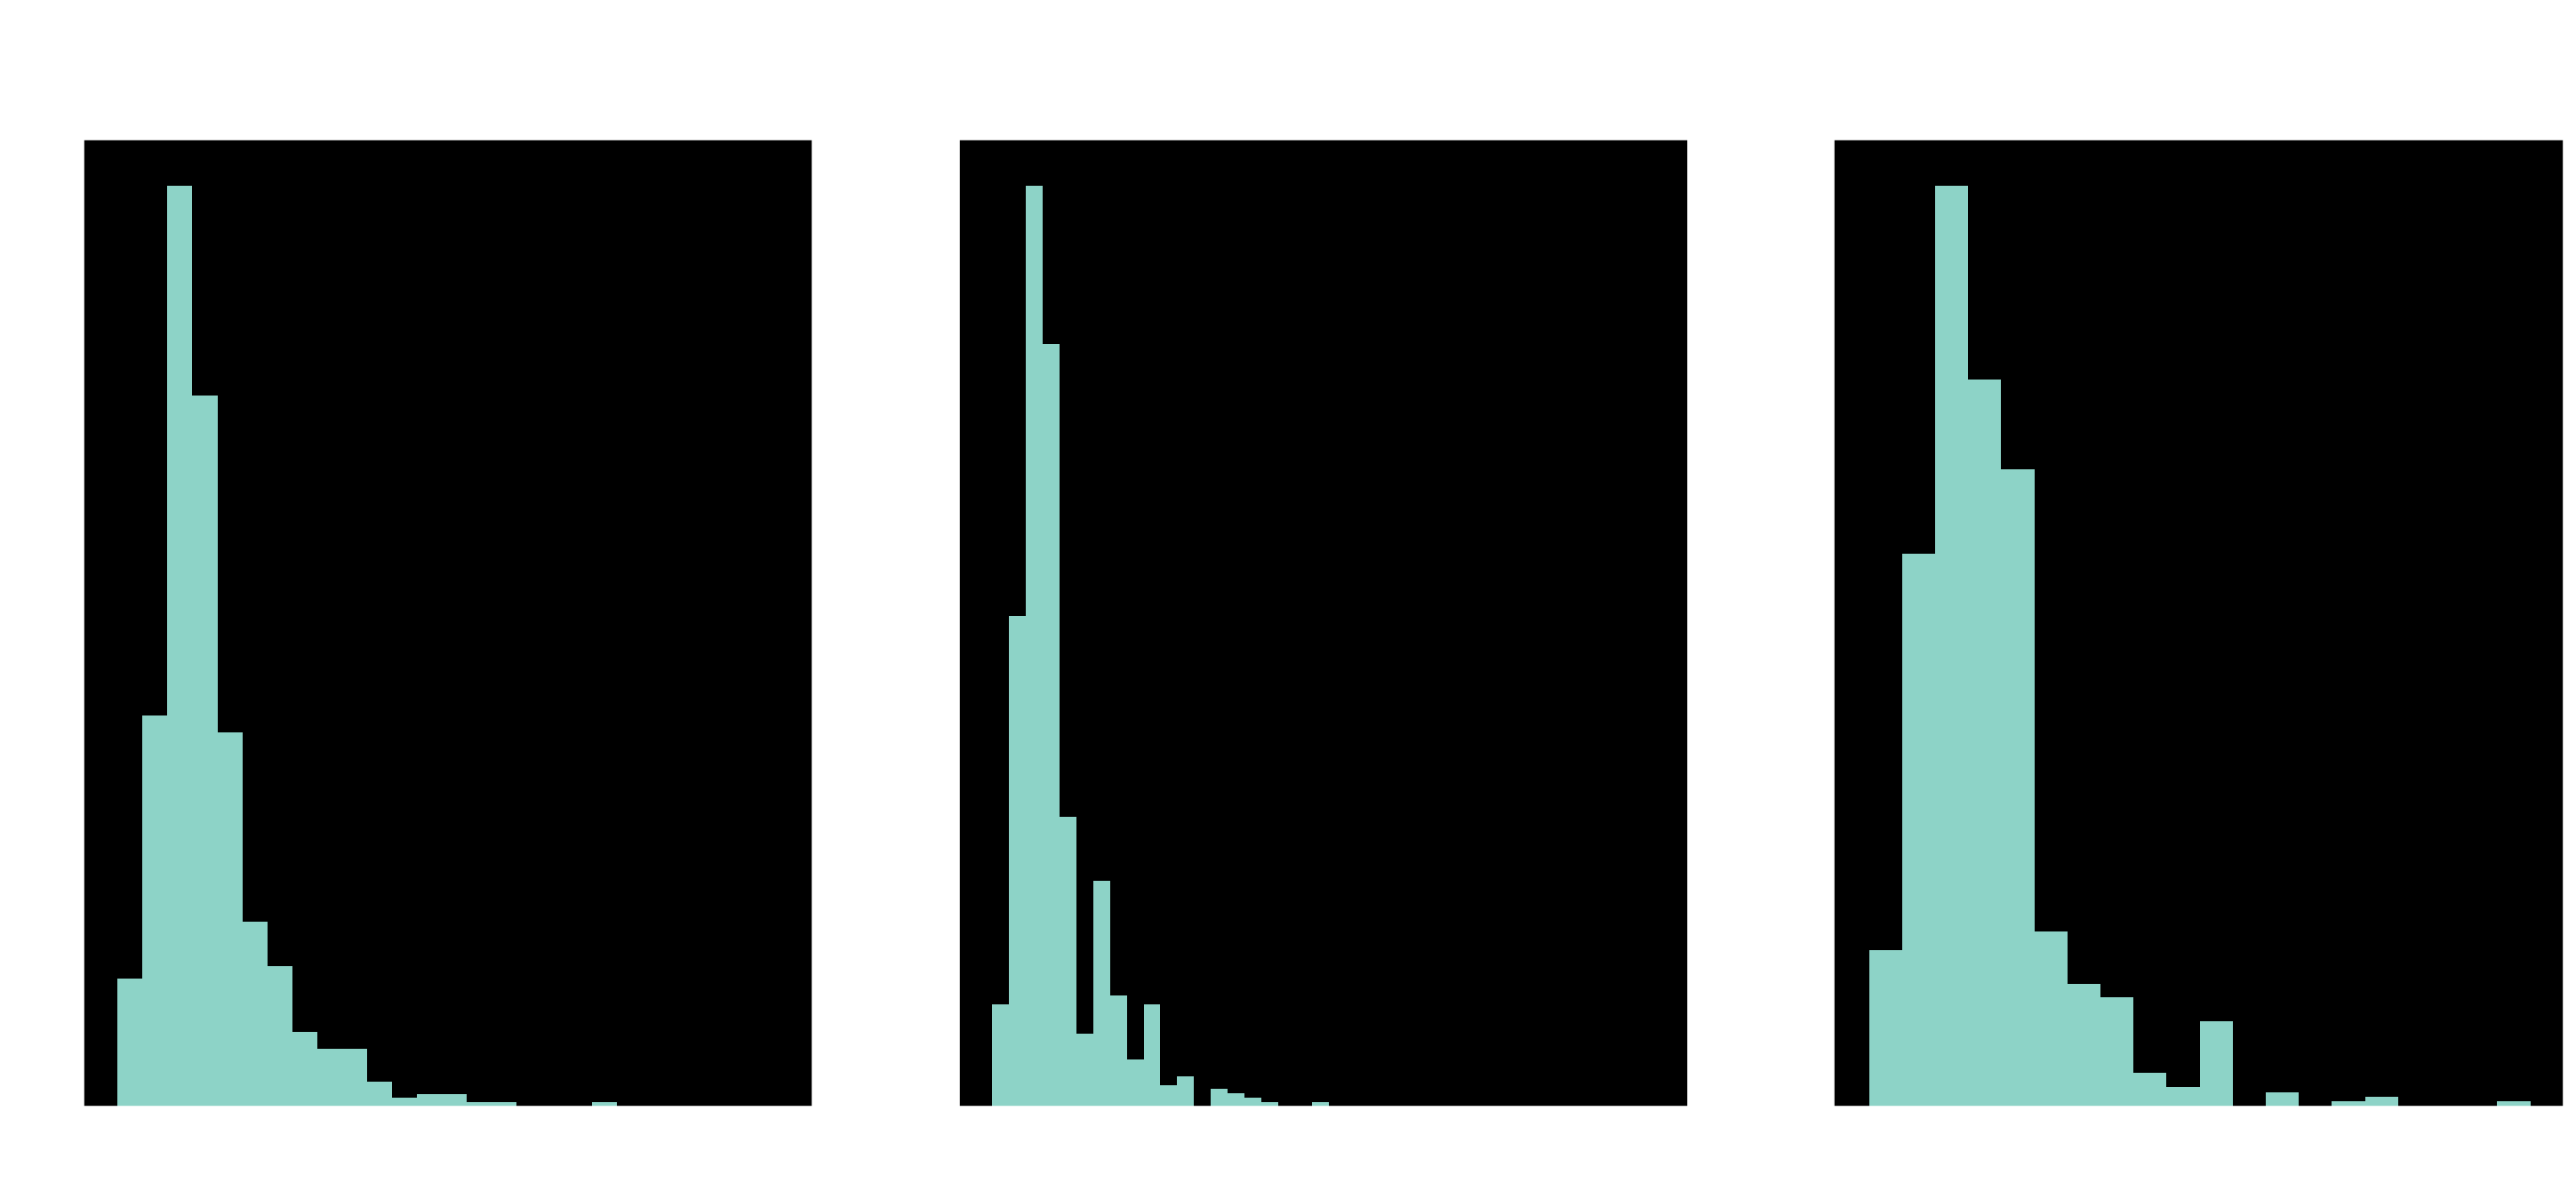

In [0]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
jobs["Salary_Average"].plot(kind="hist", ax=axs[0],bins=20)
jobs["Salary_Min"].plot(kind="hist", ax=axs[1],bins=20)
jobs["Salary_Max"].plot(kind="hist", ax=axs[2],bins=20)
fig.suptitle(
    "(L-R) Distribution of Average, Minimum and Maximum Salaries offered in job postings",
    fontsize=20,
)
plt.xlabel(
    "Monthly pay in Sing Dollars", fontsize=16, horizontalalignment="center", x=-0.8
)
plt.show()

## Salary vis-a-vis Other Features

In [0]:
group_roles=jobs.groupby('Roles').agg({'Salary_Average':'median'})
group_roles.sort_values(by=['Salary_Average'])

,Salary_Average
Roles,
SEO,3500.0
Project Management,4000.0
Statistician,4325.0
Lecturer,4500.0
Software Dvloper,4500.0
RPA Dvloper,4750.0
Programmer,4750.0
Business Anlyst,5000.0
Researcher,5250.0


In [0]:
x = jobs.Roles.value_counts().head(25).index
data = jobs[jobs['Roles'].isin(x)]

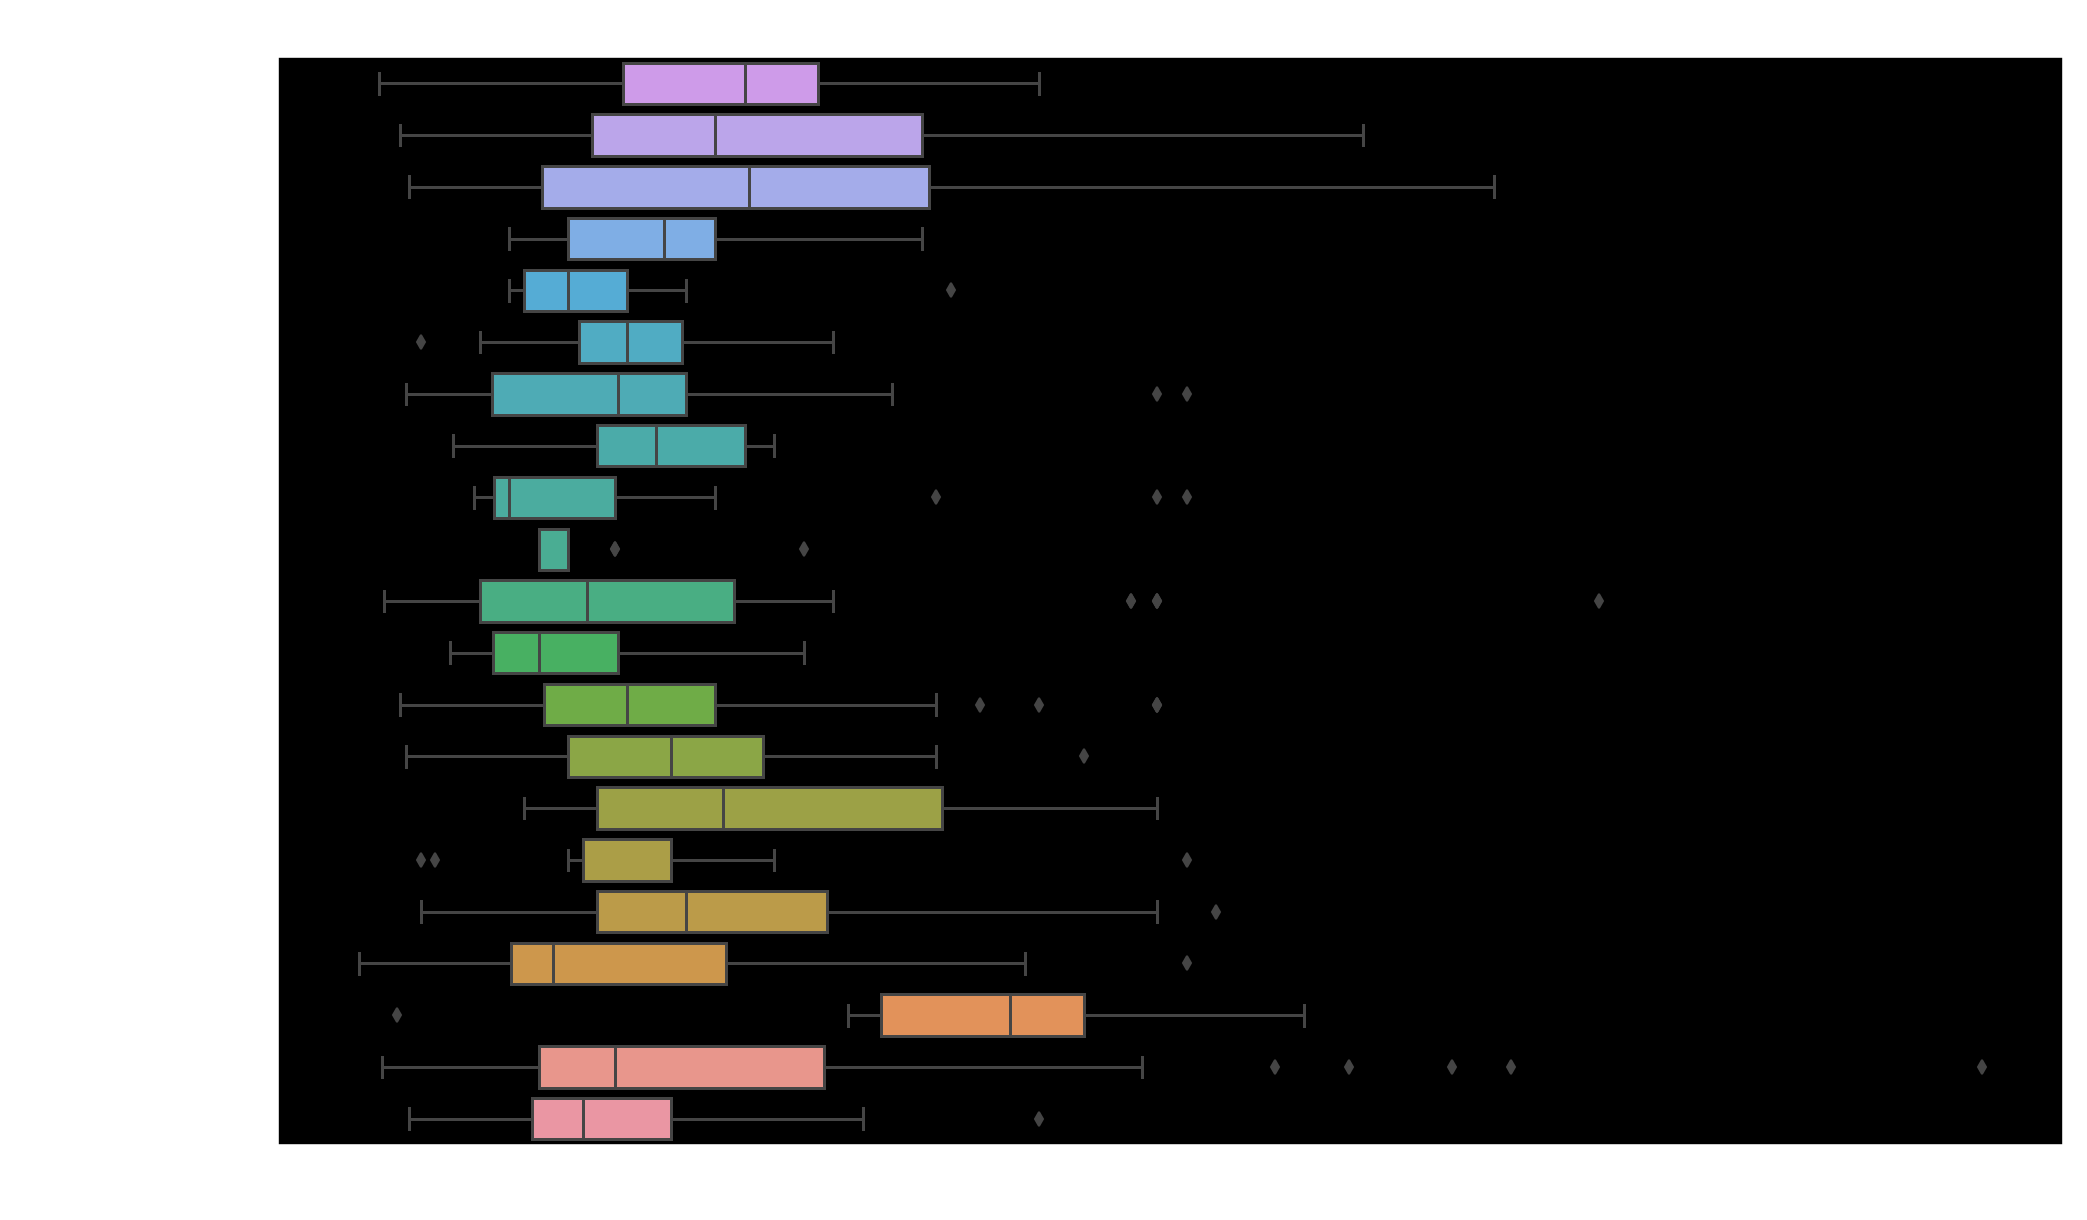

In [0]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(x="Salary_Average", y="Roles", data=data)

plt.title('Distribution of average salary by job roles', fontsize=20)
plt.ylim(-0.5, 20.5)
plt.show()

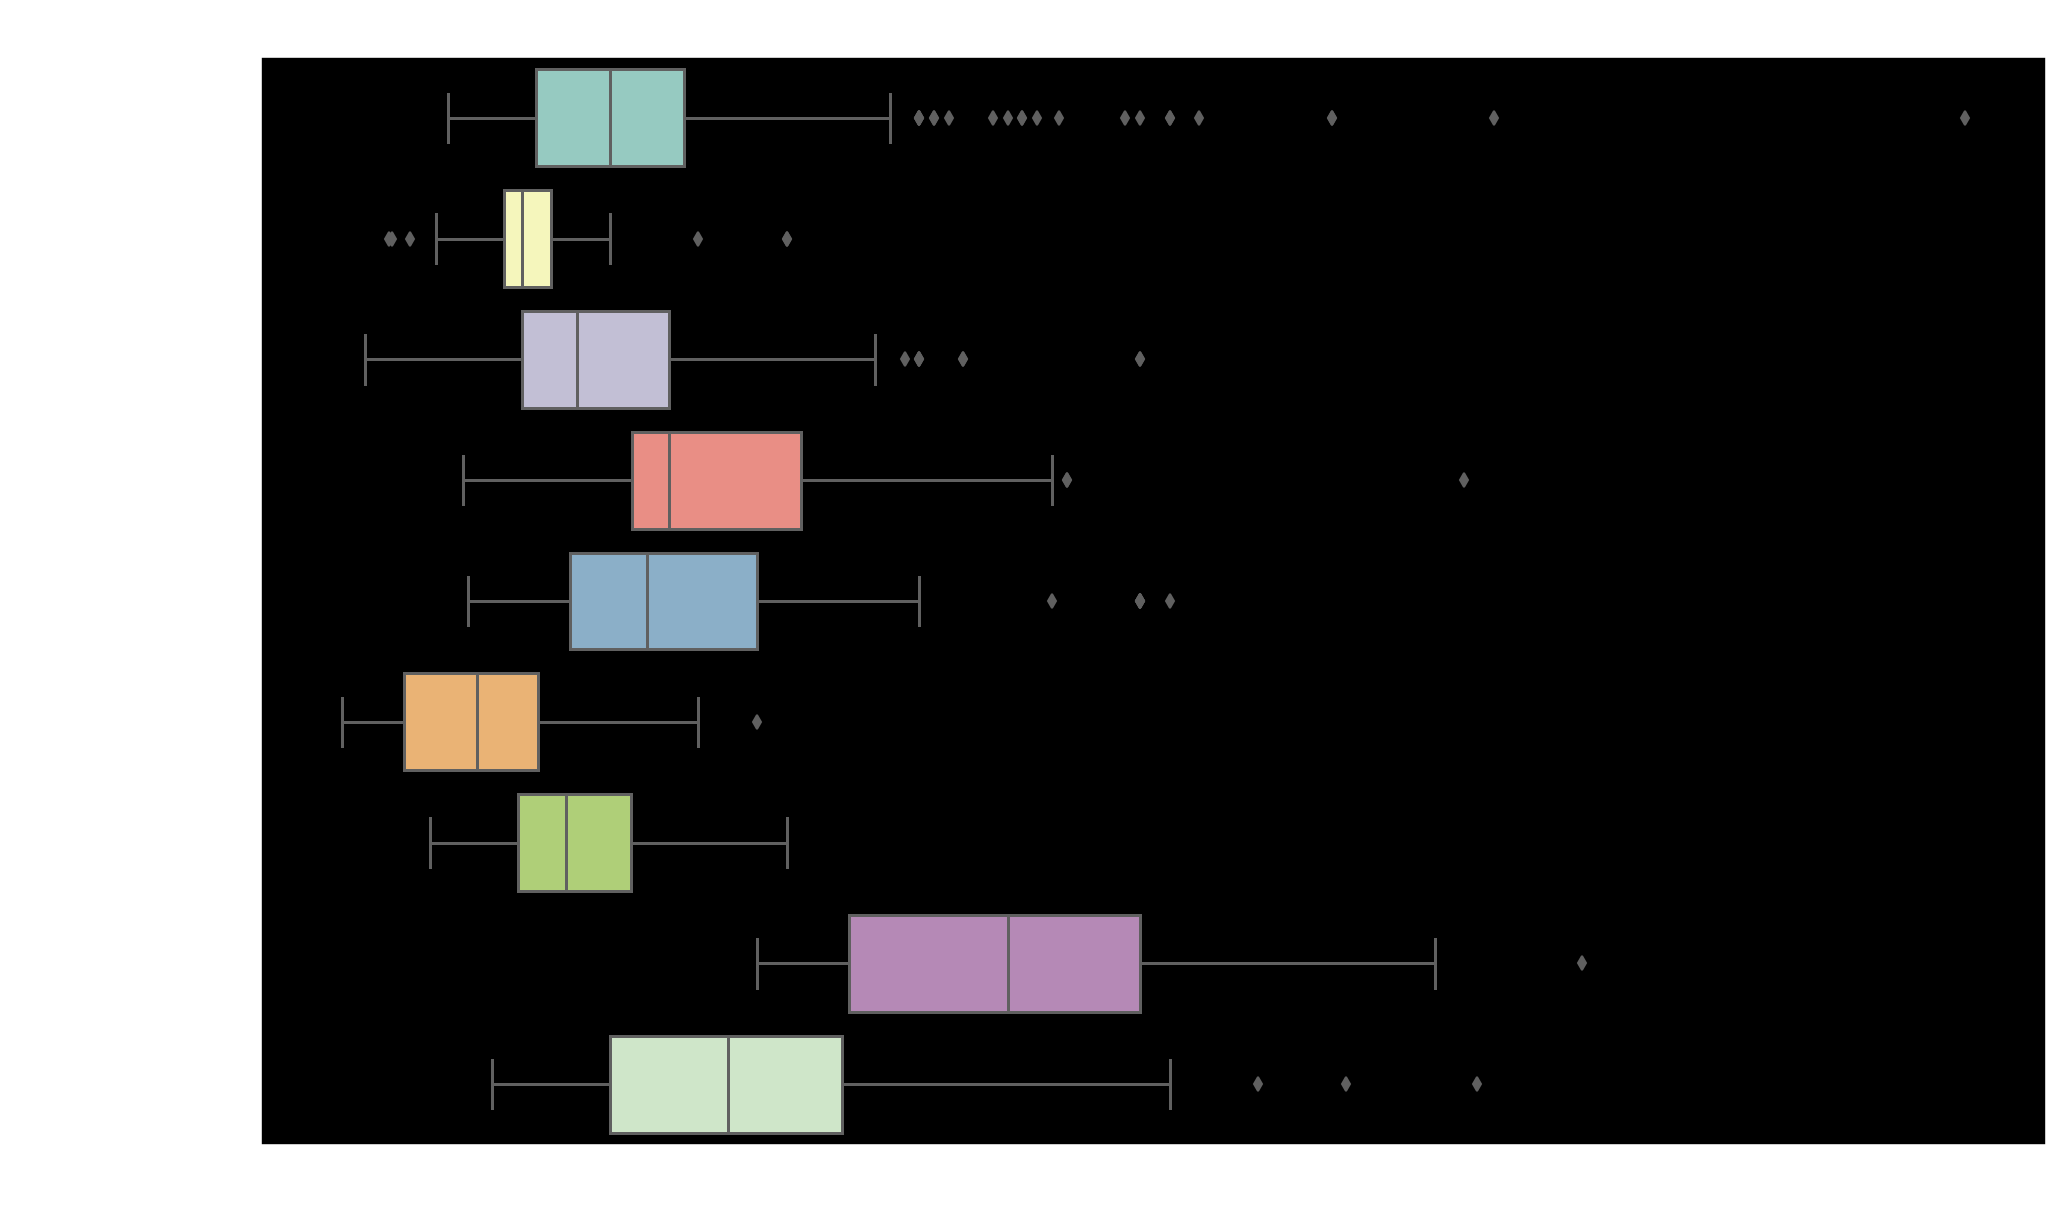

In [0]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Seniority", data=jobs)
plt.title('Distribution of average salary by seniority', fontsize=20)
plt.show()

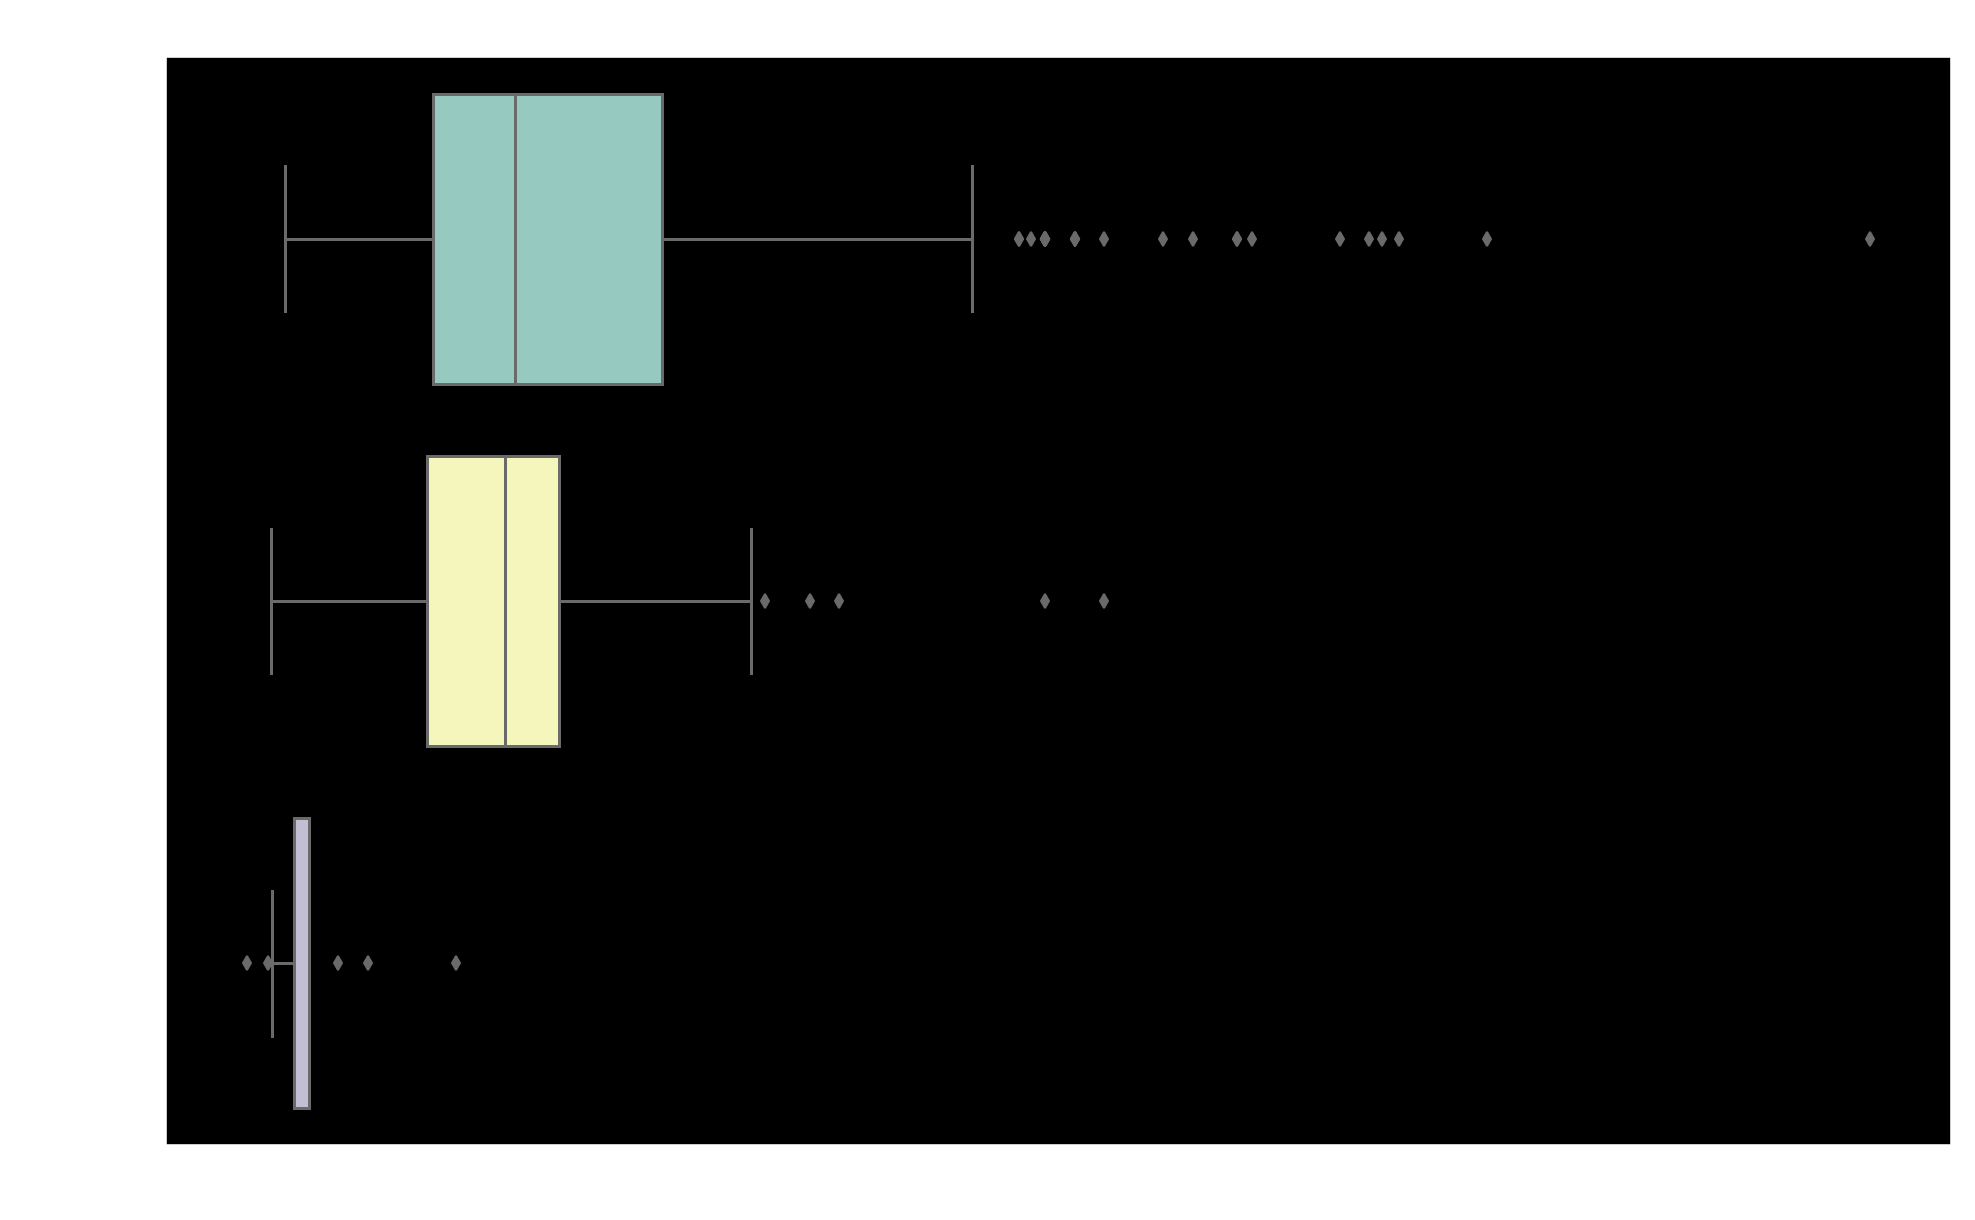

In [0]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Employment_Type", data=jobs)
plt.title('Distribution of average salary by employment type', fontsize=20)
plt.show()

## Seniority/Roles Postings

In [0]:
test=jobs["Seniority"].value_counts()
test=test.reindex(progression)
x=progression
y=test.values.tolist()

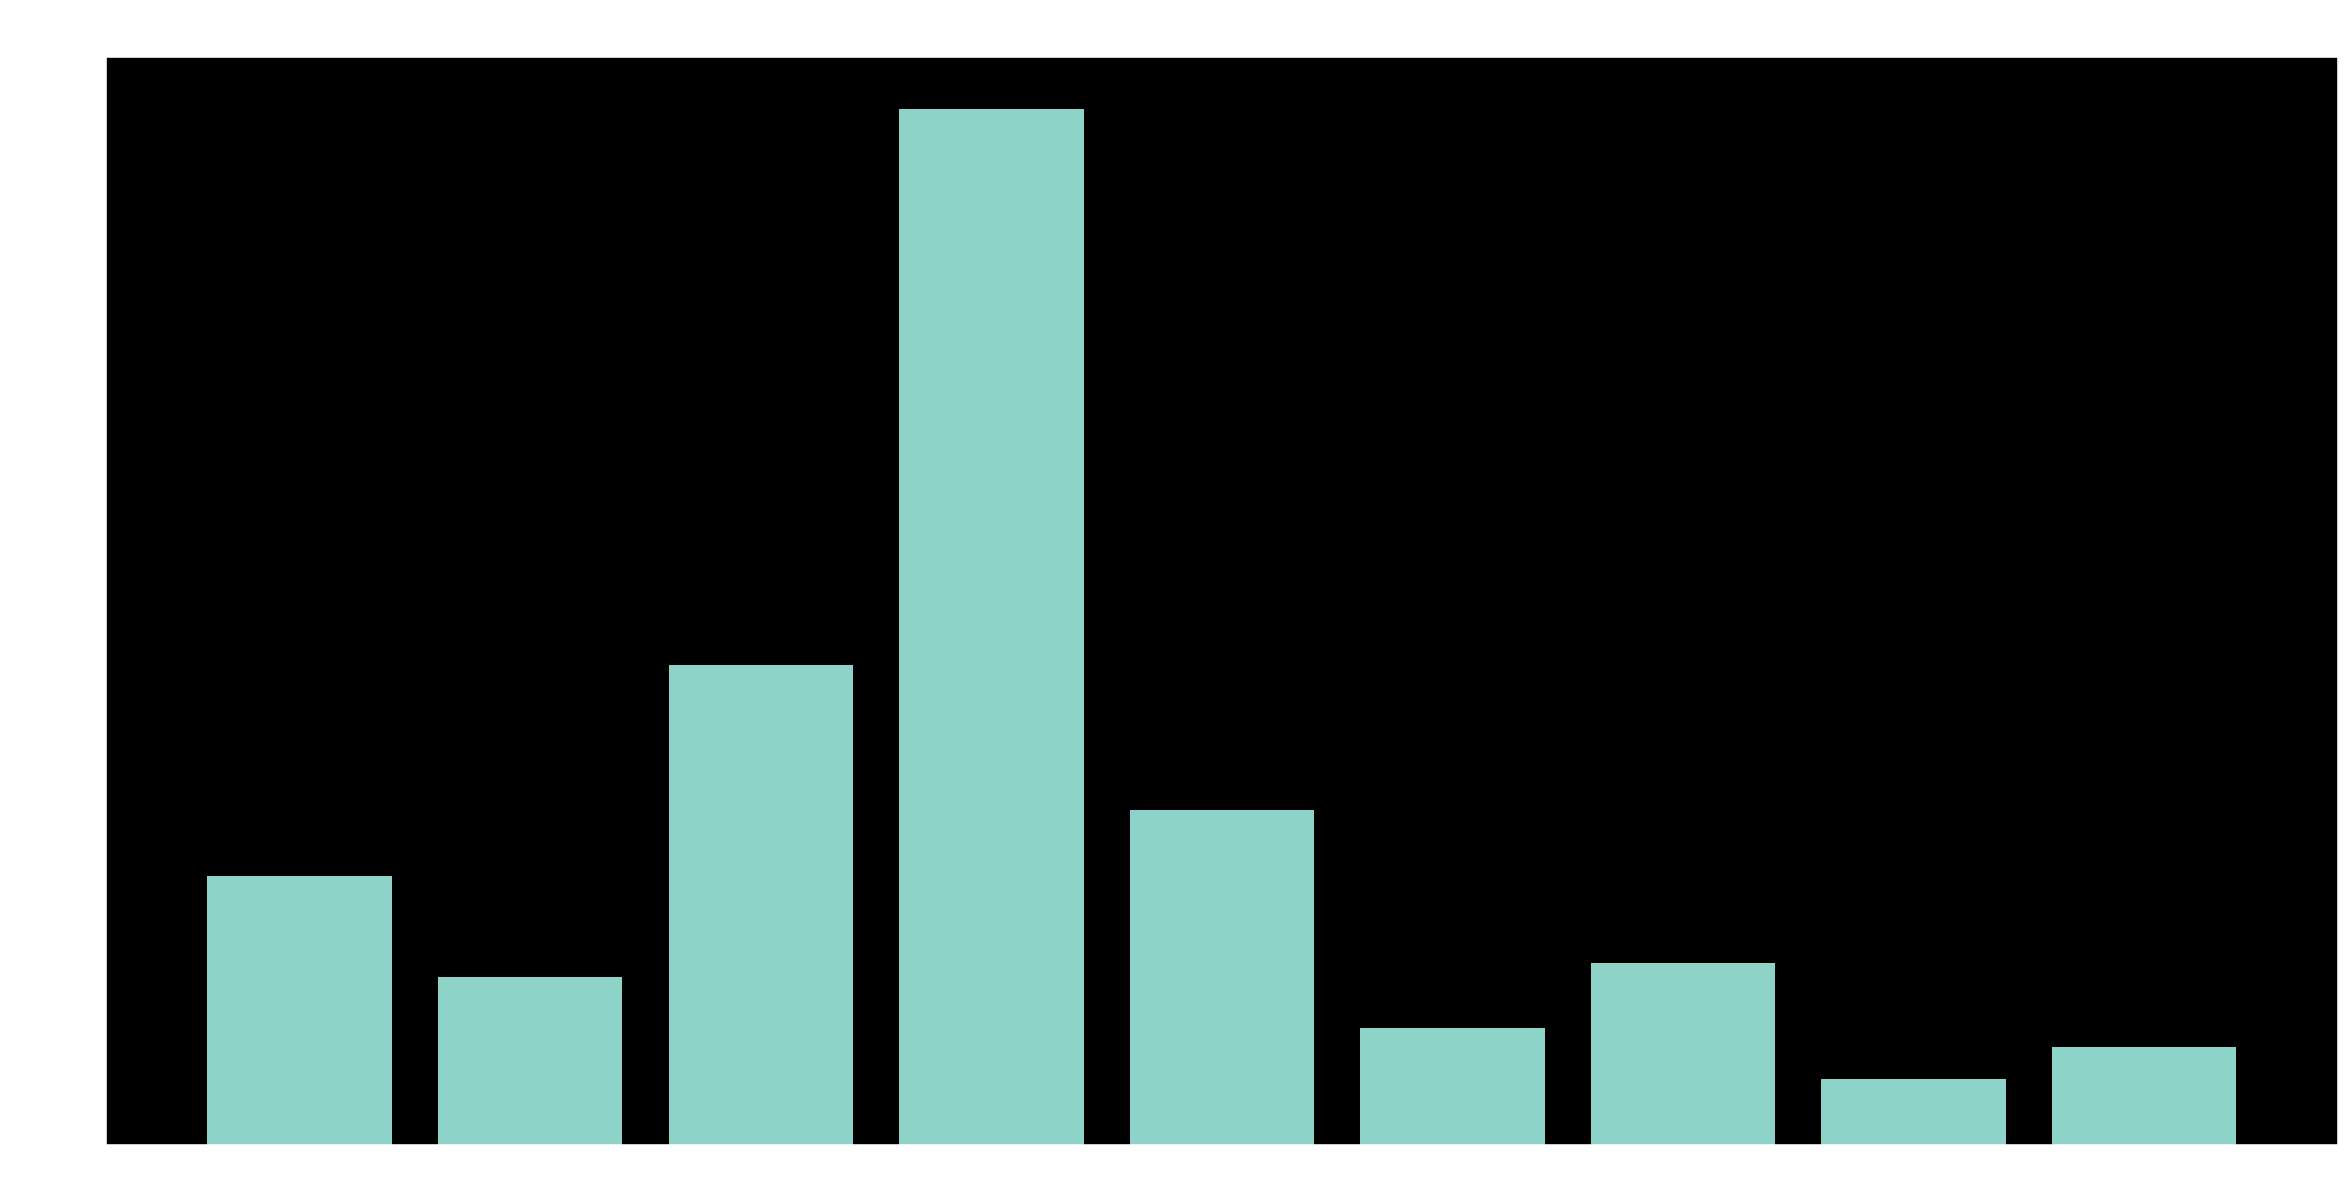

In [0]:
plt.bar(x,y)
plt.title(
    "Levels of seniority most commonly seen in job postings", fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.rcParams["figure.figsize"] = (20, 10) # (w, h)
plt.show()

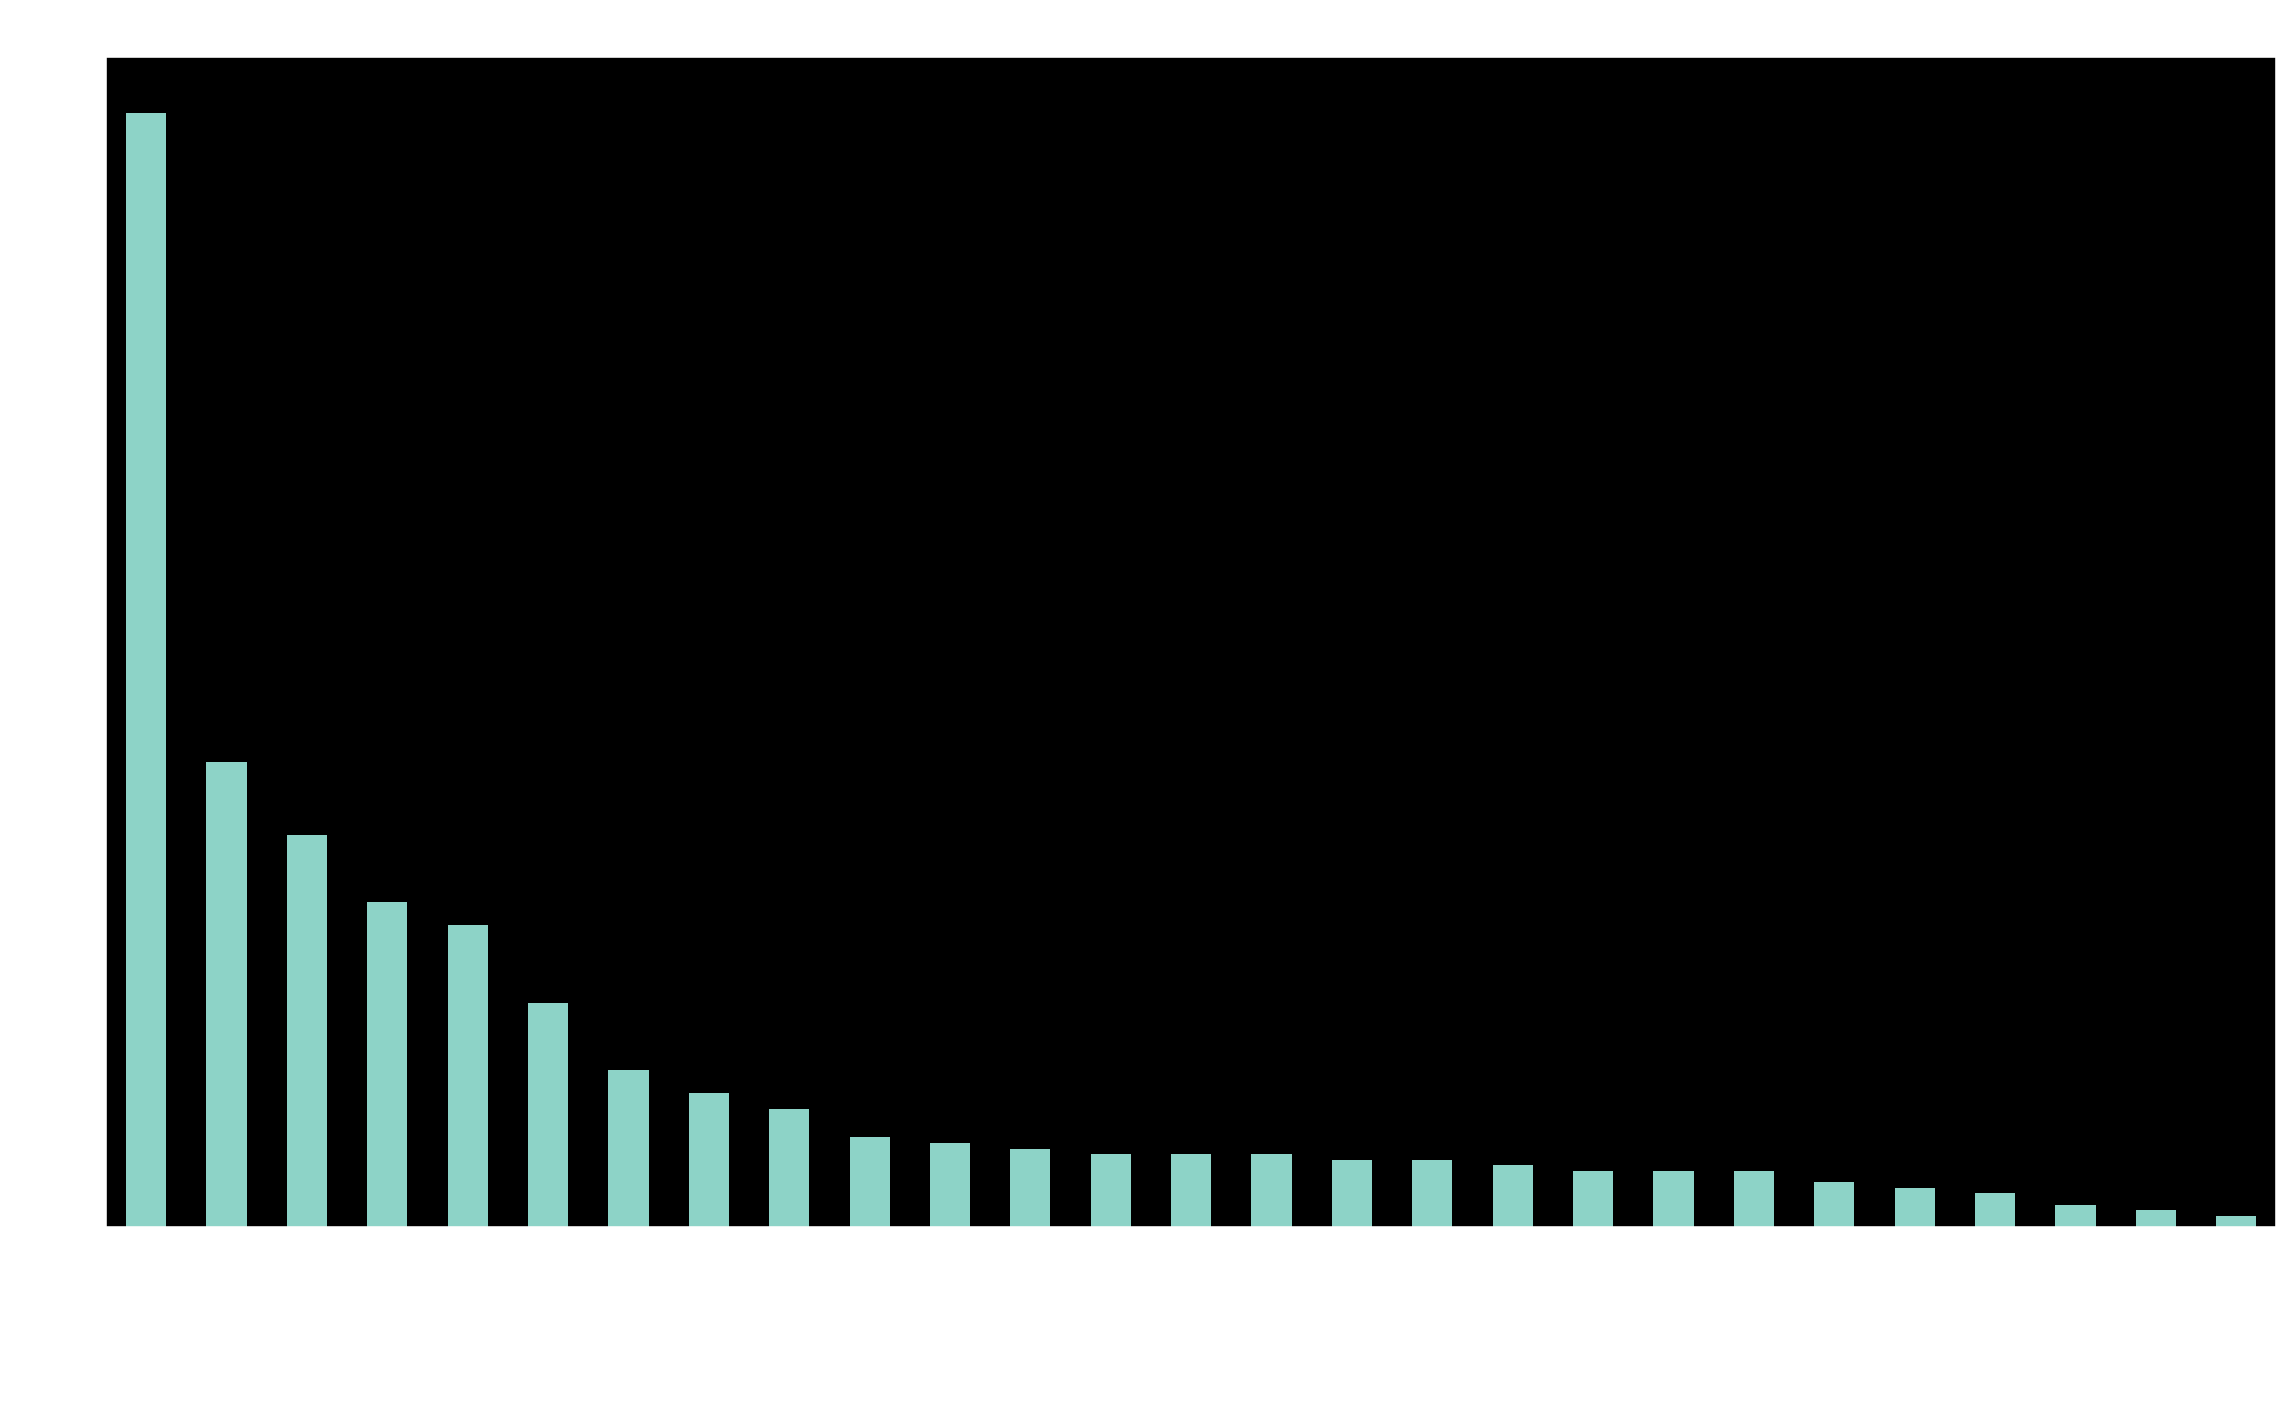

In [0]:
jobs["Roles"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
  "Roles most commonly seen in job postings", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## Employment Type Postings

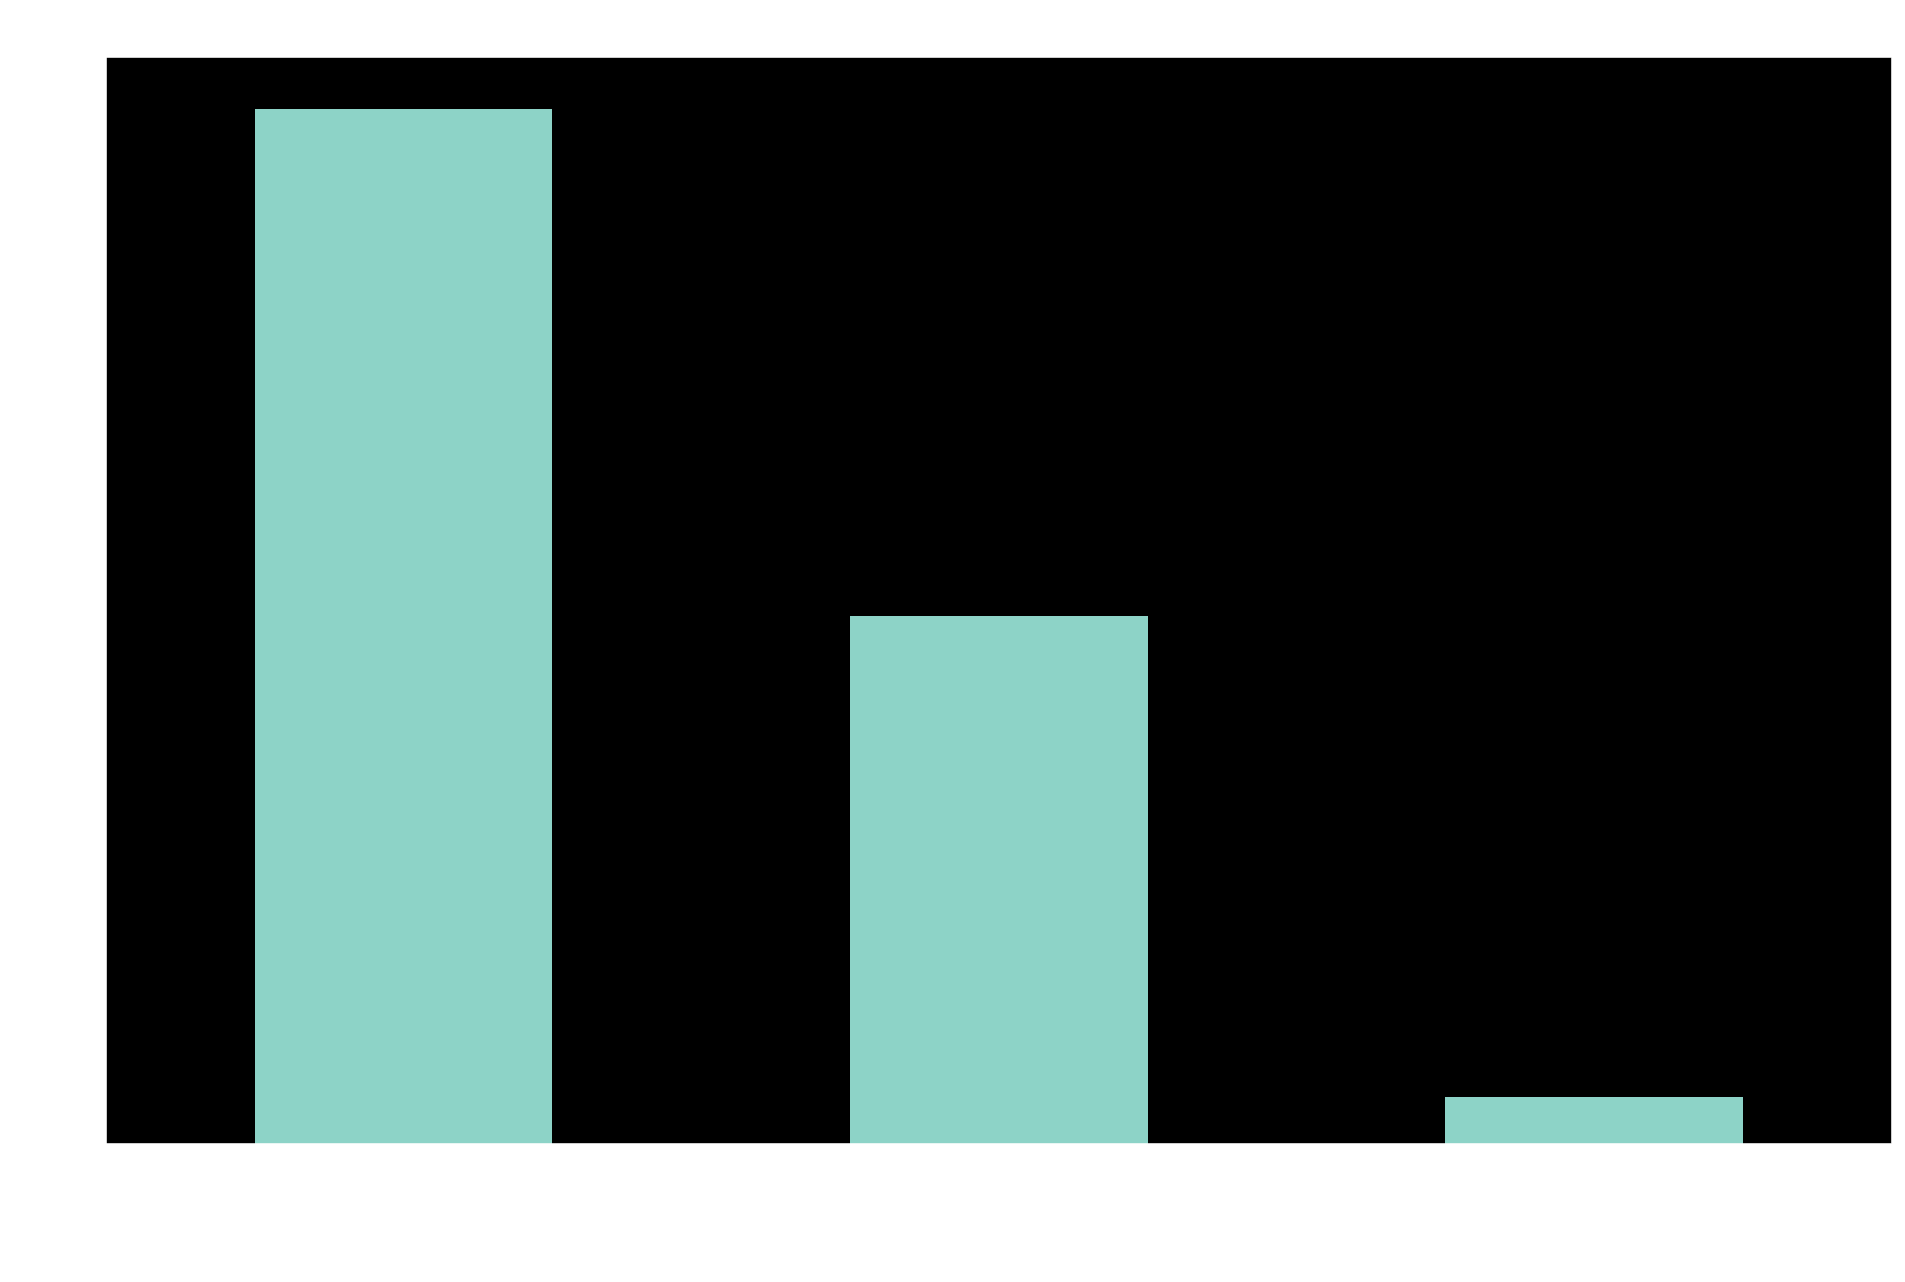

In [0]:
jobs["Employment_Type"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "Most frequently cited employment conditions in job postings", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)
plt.show()

 ## Qualitative Measures

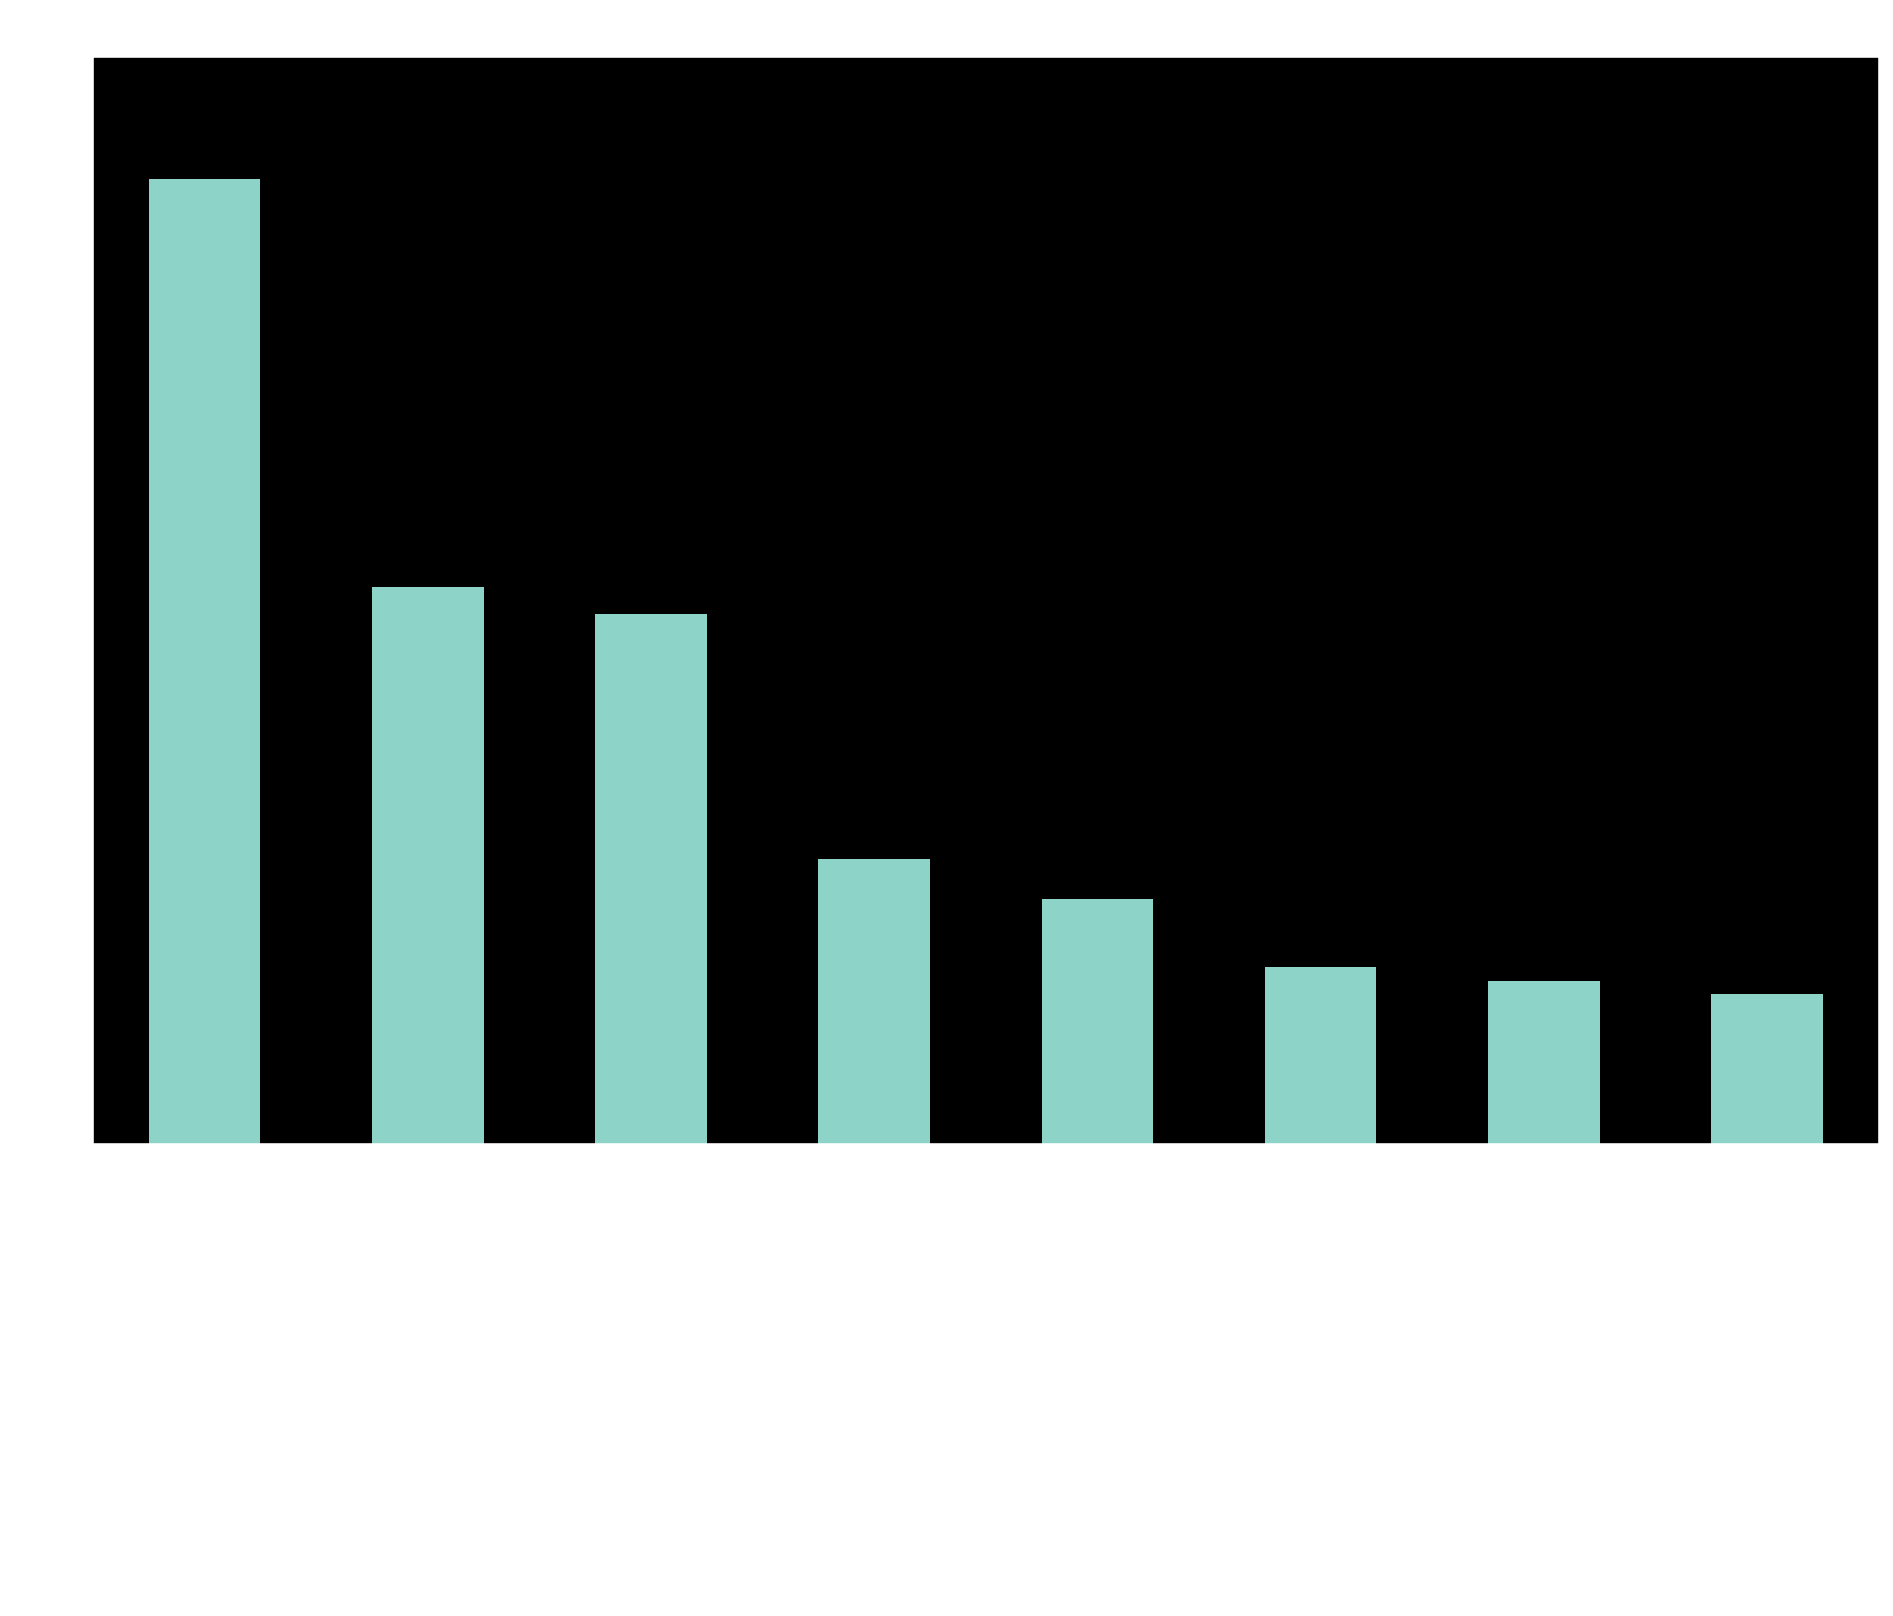

In [0]:
jobs["Category"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "Industries related to roles", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.xlim(1.5, 9.5)
plt.ylim(0,80)
plt.show()

In [0]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(2,2))
vect.fit(jobs['Responsibilities'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 1126


In [0]:
responsibility = vect.get_feature_names()
responsibility

['10 years',
 '35 years',
 '3rd party',
 'ability adapt',
 'ability communicate',
 'ability effectively',
 'ability learn',
 'ability manage',
 'ability multitask',
 'ability translate',
 'ability understand',
 'ability work',
 'ability write',
 'able work',
 'accelerate digitalization',
 'action employer',
 'actionable insights',
 'active role',
 'adapt work',
 'added advantage',
 'additional selection',
 'advance research',
 'advanced analytics',
 'advanced deep',
 'advanced knowledge',
 'advantage good',
 'affiliated research',
 'agency science',
 'agile development',
 'agile environment',
 'agile methodologies',
 'agile scrum',
 'agile software',
 'ai algorithms',
 'ai corp',
 'ai corporate',
 'ai data',
 'ai machine',
 'aims advance',
 'algorithm design',
 'algorithm development',
 'algorithms data',
 'algorithms impactful',
 'algorithms models',
 'amazon web',
 'amended time',
 'amounts data',
 'analysis data',
 'analysis design',
 'analytical problem',
 'analytical problemsolvin

In [0]:
resp = pd.DataFrame(vect.transform(jobs['Responsibilities']).todense(),
                       columns=responsibility)

In [0]:
responsibility_count = resp.sum(axis=0)
responsibility_count.sort_values(ascending = False).head(30)

machine learning           714
computer science           419
data analytics             287
big data                   256
data science               242
communication skills       227
deep learning              205
software development       186
shortlisted candidates     184
candidates notified        182
degree computer            178
artificial intelligence    178
years experience           174
regret shortlisted         142
business intelligence      120
work closely               118
computer vision            117
programming languages      117
ability work               109
working experience         108
bachelors degree           107
team player                106
skills ability             105
work independently         98 
computer engineering       95 
years relevant             89 
design develop             87 
problem solving            87 
learning algorithms        84 
data analysis              83 
dtype: int64

In [0]:
top_responsibility = responsibility_count.sort_values(ascending = False).head(30)

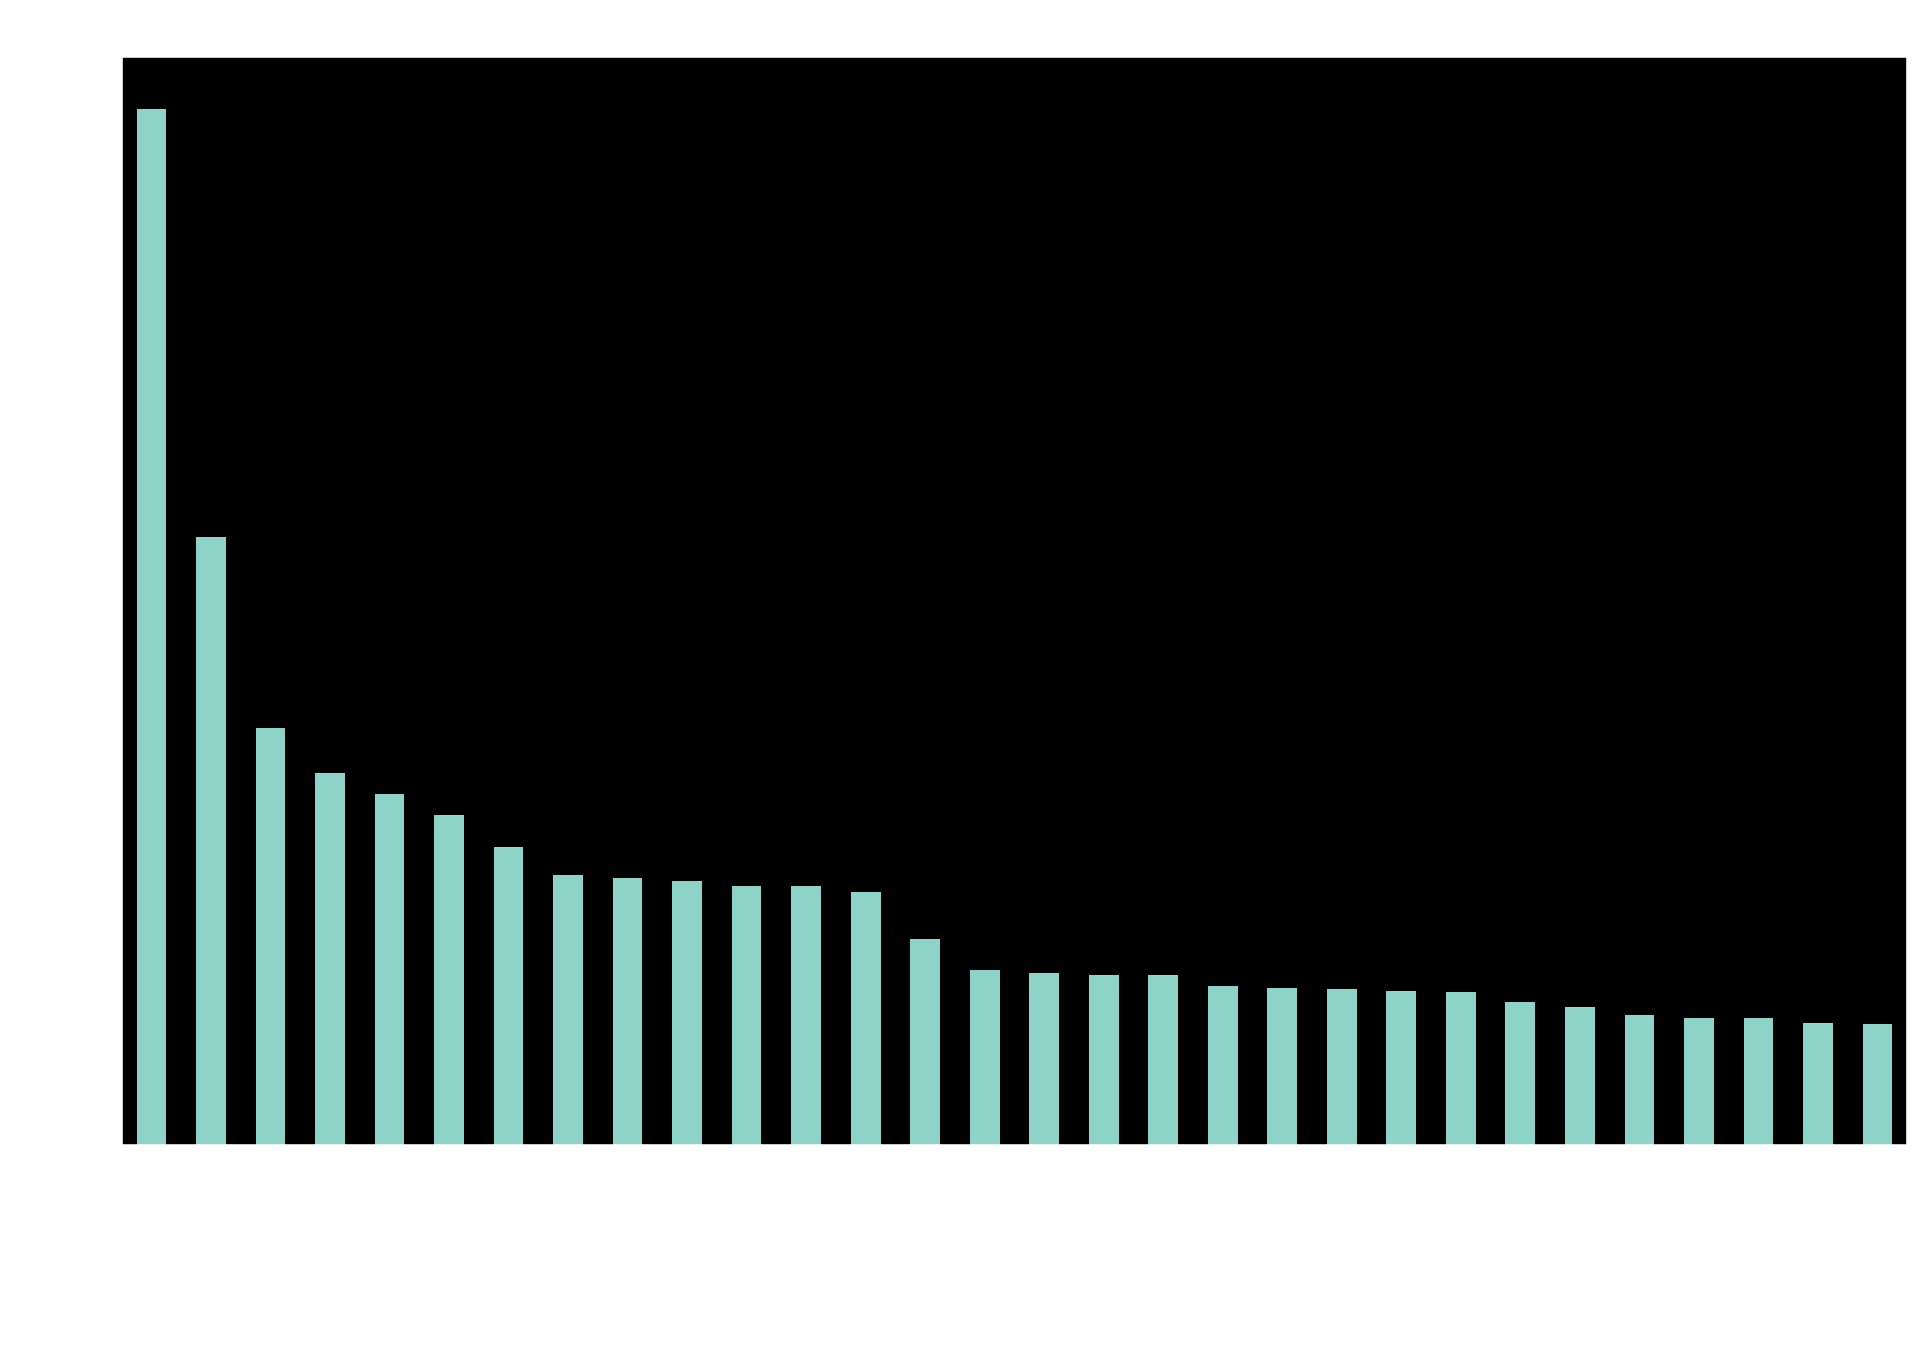

In [0]:
top_responsibility.plot(kind="bar", figsize=(16, 10))
plt.title('Top 30 words used to describe responsibilities in roles', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.show()

In [0]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
vect.fit(jobs['Skills'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 361


In [0]:
skills = vect.get_feature_names()
skills

['ability',
 'ability work',
 'account',
 'agile',
 'agile methodologies',
 'ai',
 'ai cuttingedge',
 'algorithm',
 'algorithm design',
 'algorithms',
 'algorithms analytics',
 'algorithms computer',
 'analyses',
 'analysis',
 'analysis analytics',
 'analysis business',
 'analysis data',
 'analysis financial',
 'analysis learning',
 'analytical',
 'analytics',
 'analytics artificial',
 'analytics business',
 'application',
 'application development',
 'applications',
 'architecture',
 'artificial',
 'artificial intelligence',
 'asset',
 'asset management',
 'automation',
 'banking',
 'big',
 'big data',
 'business',
 'business analysis',
 'business development',
 'business intelligence',
 'business process',
 'business strategy',
 'capability',
 'catering',
 'catering work',
 'cc',
 'cc cloud',
 'cc css',
 'center',
 'change',
 'classification',
 'cloud',
 'cloud computing',
 'coach',
 'collaboration',
 'communication',
 'communication skills',
 'communications',
 'computer',
 'compute

In [0]:
resp = pd.DataFrame(vect.transform(jobs['Skills']).todense(),
                       columns=skills)

In [0]:
skills_count = resp.sum(axis=0)
skills_count.sort_values(ascending = False).head(30)

data                      663
development               388
management                339
software                  323
analysis                  315
java                      308
learning                  269
research                  259
engineering               254
business                  221
machine                   215
machine learning          210
python                    208
computer                  201
science                   187
microsoft                 164
sql                       156
software development      138
information               134
technology                127
project                   124
intelligence              116
data analysis             114
analytics                 113
design                    112
algorithms                110
programming               107
information technology    107
data data                 107
computer science          101
dtype: int64

In [0]:
top_skills = skills_count.sort_values(ascending = False).head(30)

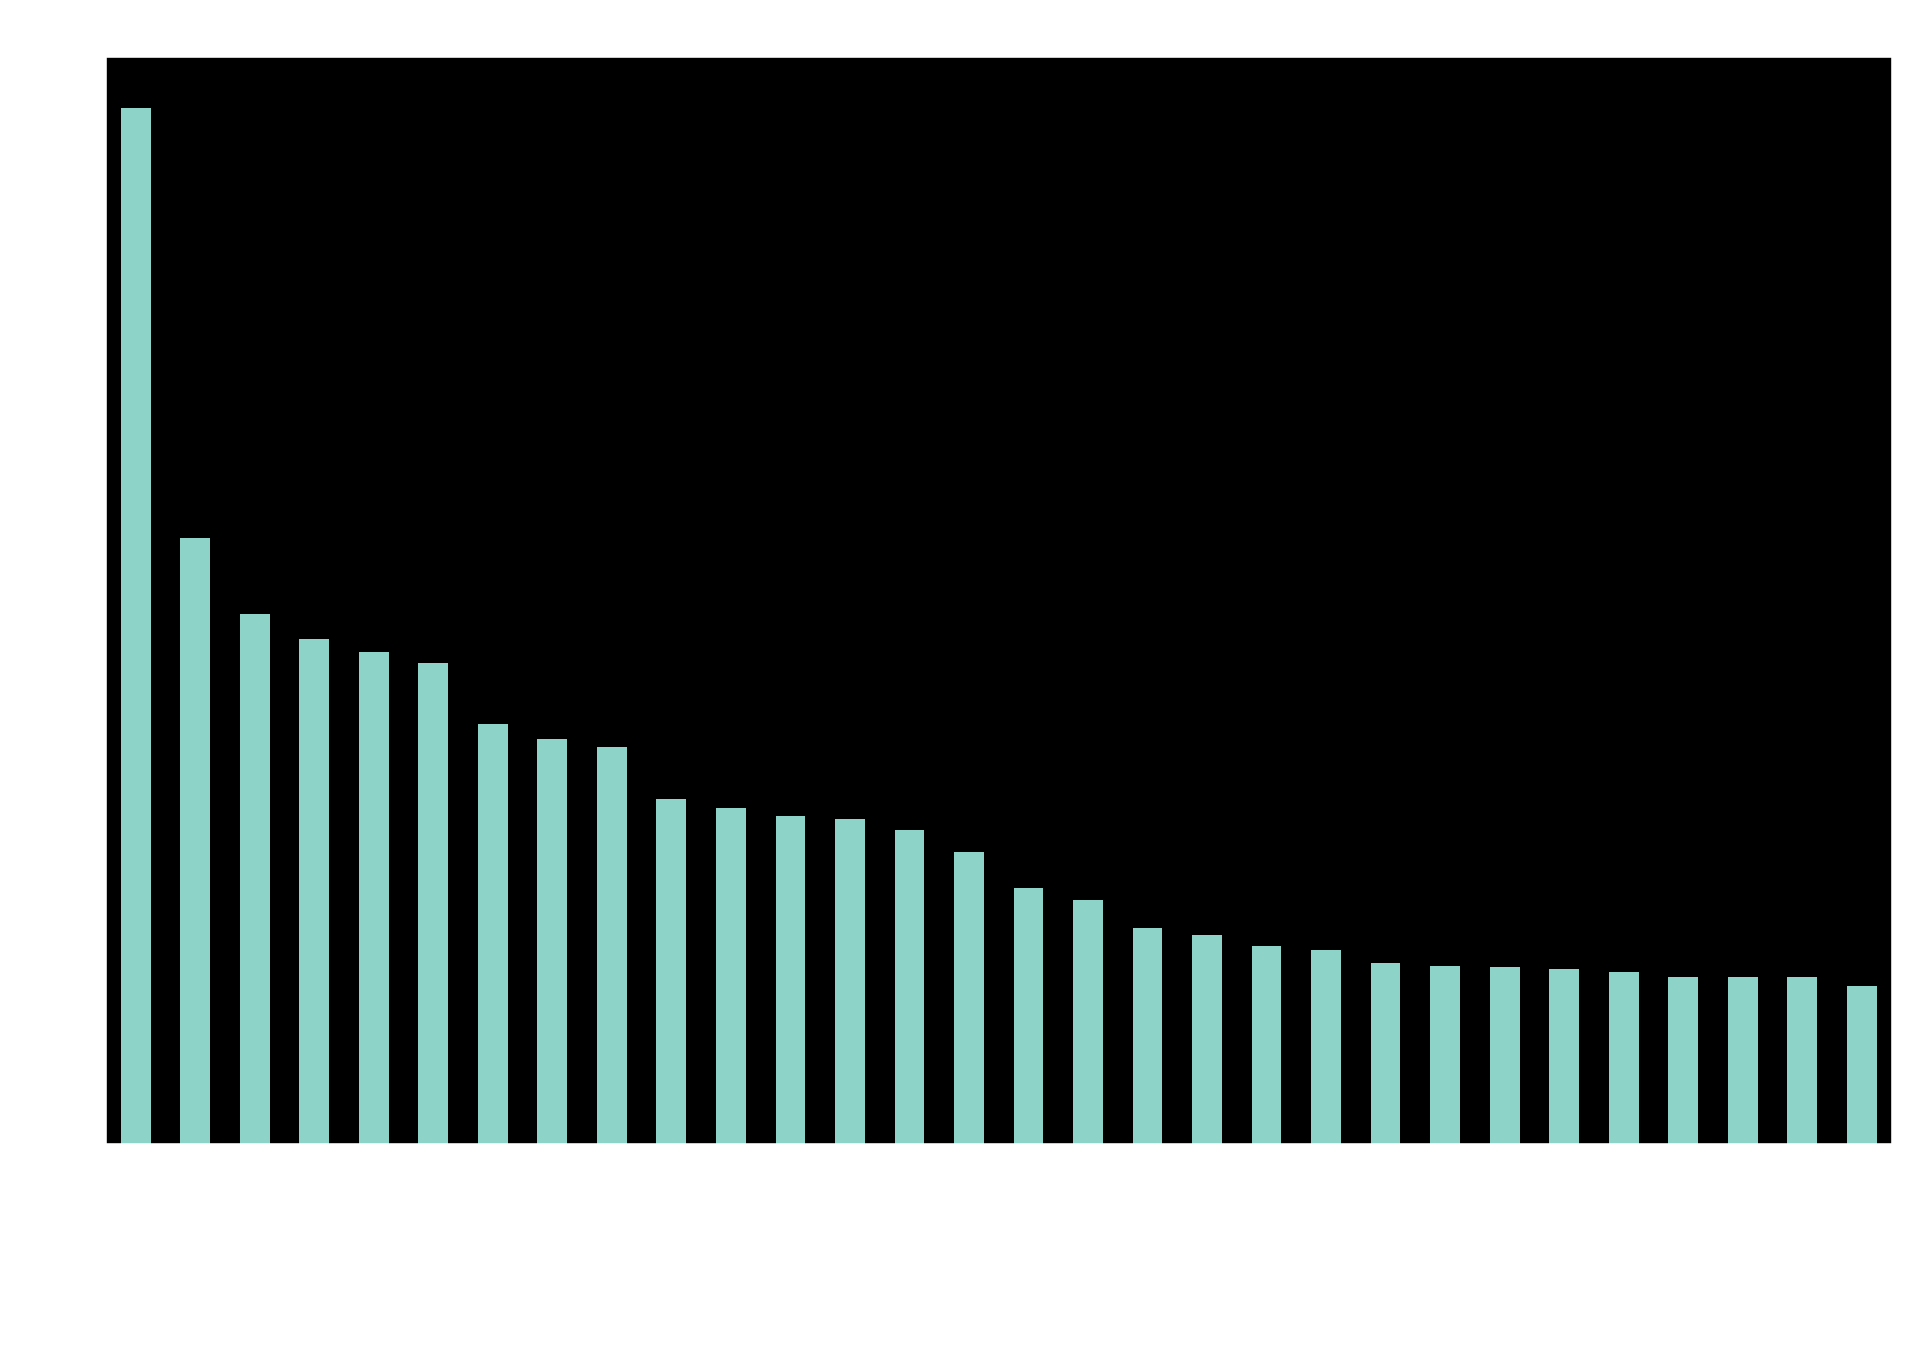

In [0]:
top_skills.plot(kind="bar", figsize=(16, 10))
plt.title('Top 30 words used to describe skills in roles', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.show()

# 4a Zooming in on Data Scientist/ML roles

In [0]:
data_scientist = jobs[(jobs.Roles=='Data Scientst')|(jobs.Roles=='Machine Learning Eng')]
len(data_scientist)

74

## Salary Distribution

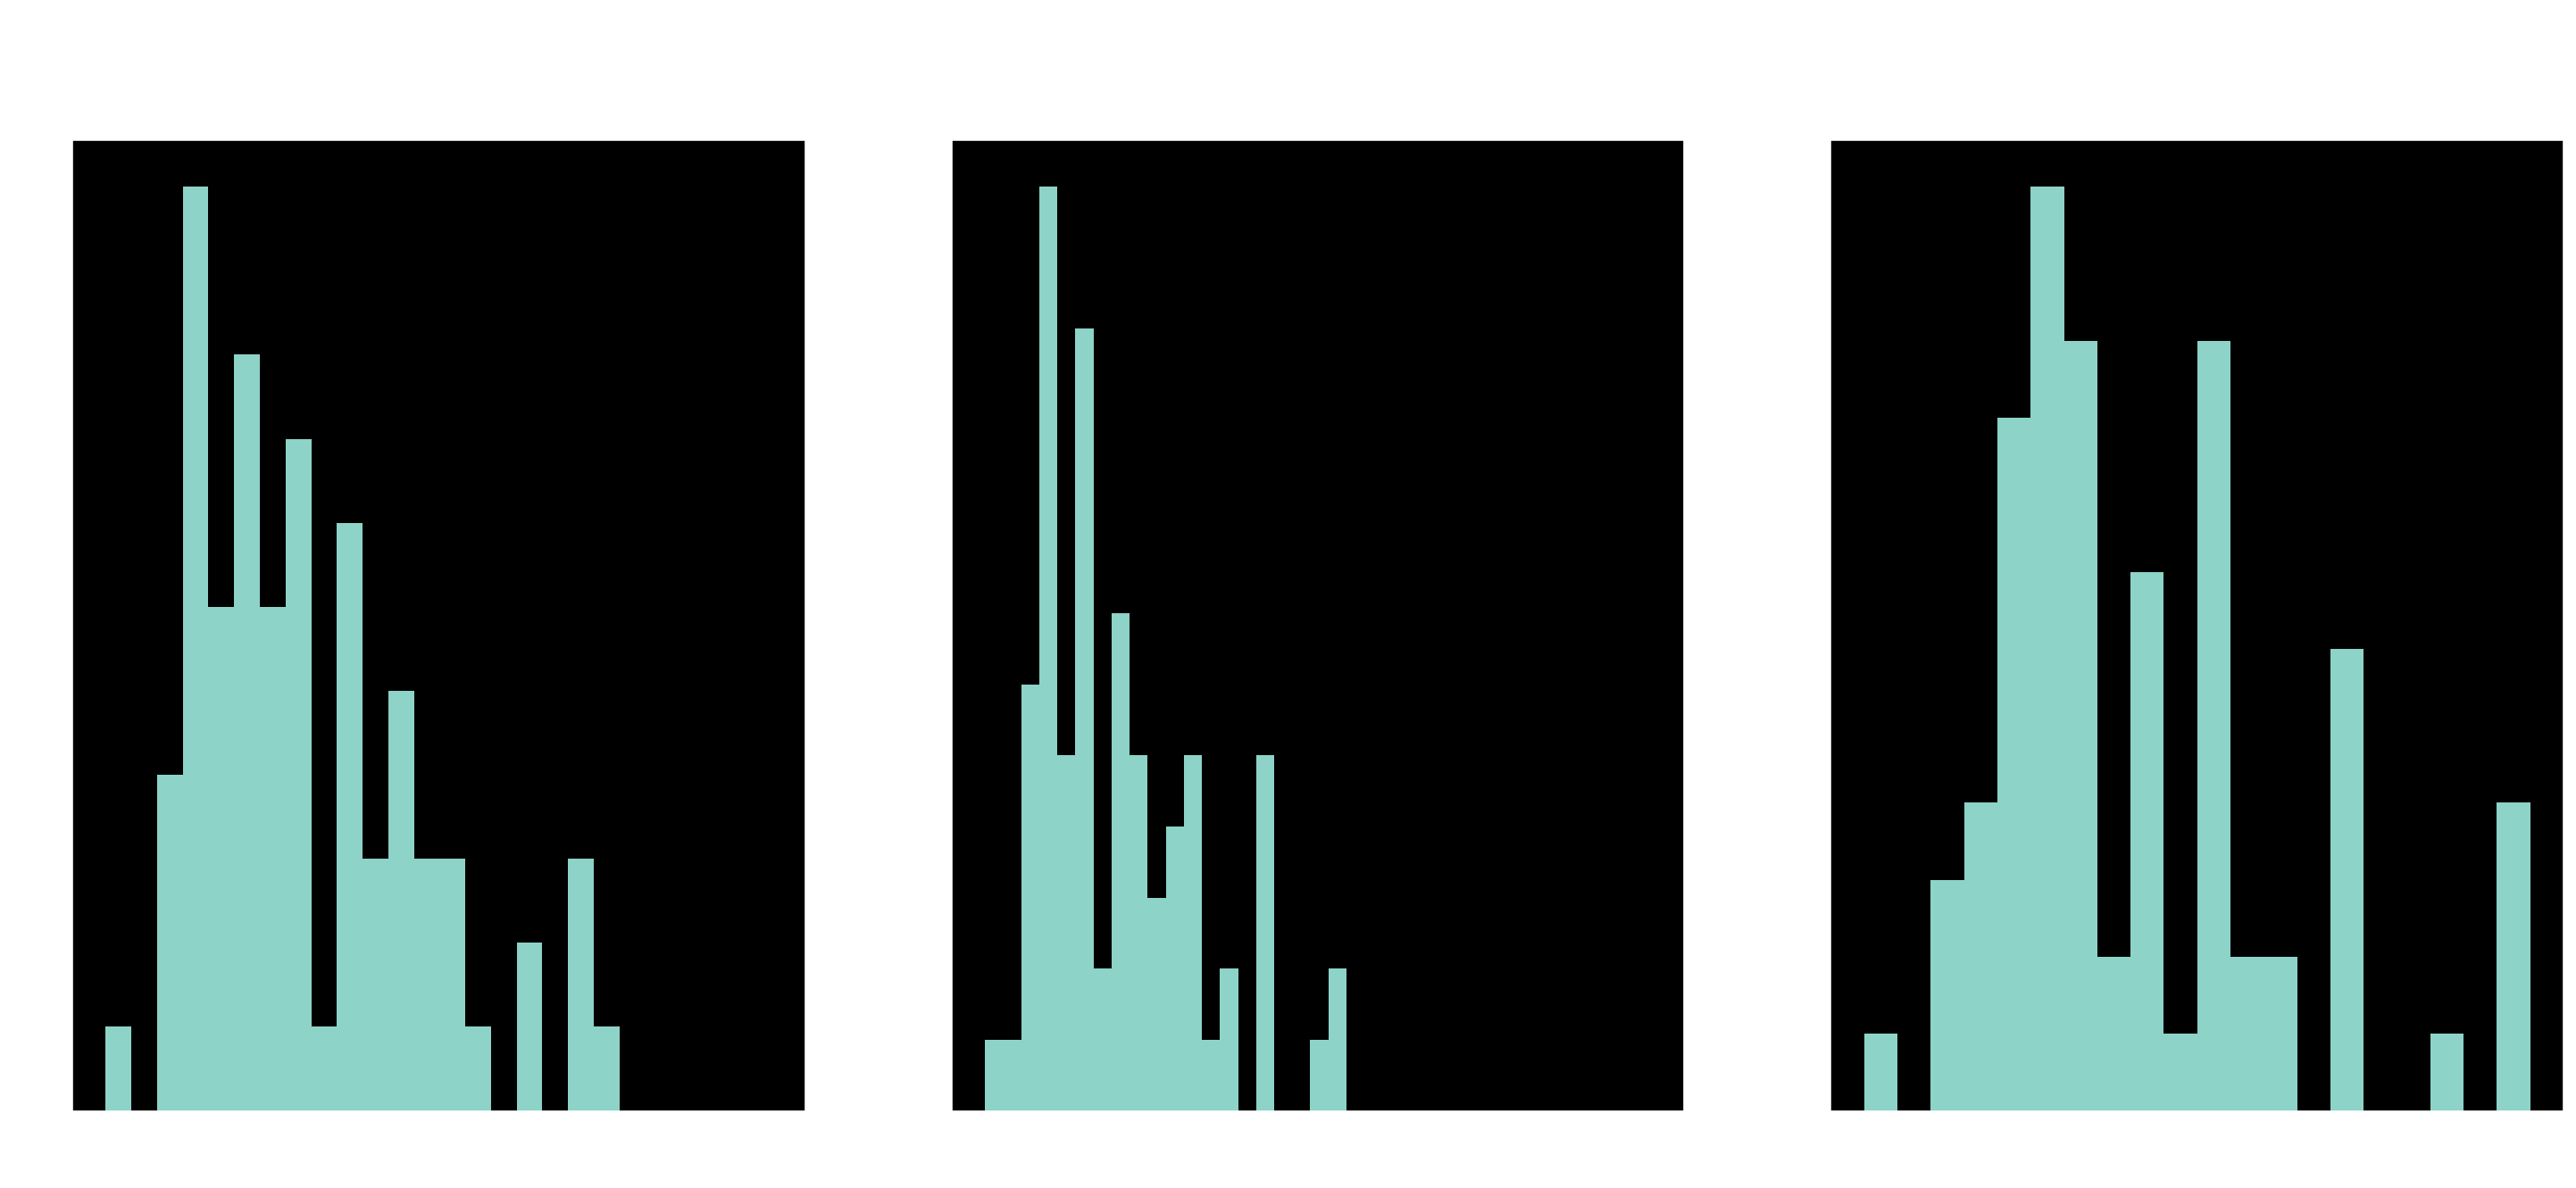

In [0]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
data_scientist["Salary_Average"].plot(kind="hist", ax=axs[0],bins=20)
data_scientist["Salary_Min"].plot(kind="hist", ax=axs[1],bins=20)
data_scientist["Salary_Max"].plot(kind="hist", ax=axs[2],bins=20)
fig.suptitle(
    "(L-R) Distribution of Average, Minimum and Maximum Salaries offered in job postings",
    fontsize=20,
)
plt.xlabel(
    "Monthly pay in Sing Dollars", fontsize=16, horizontalalignment="center", x=-0.8
)
plt.show()

## Salary vis-a-vis Other Features

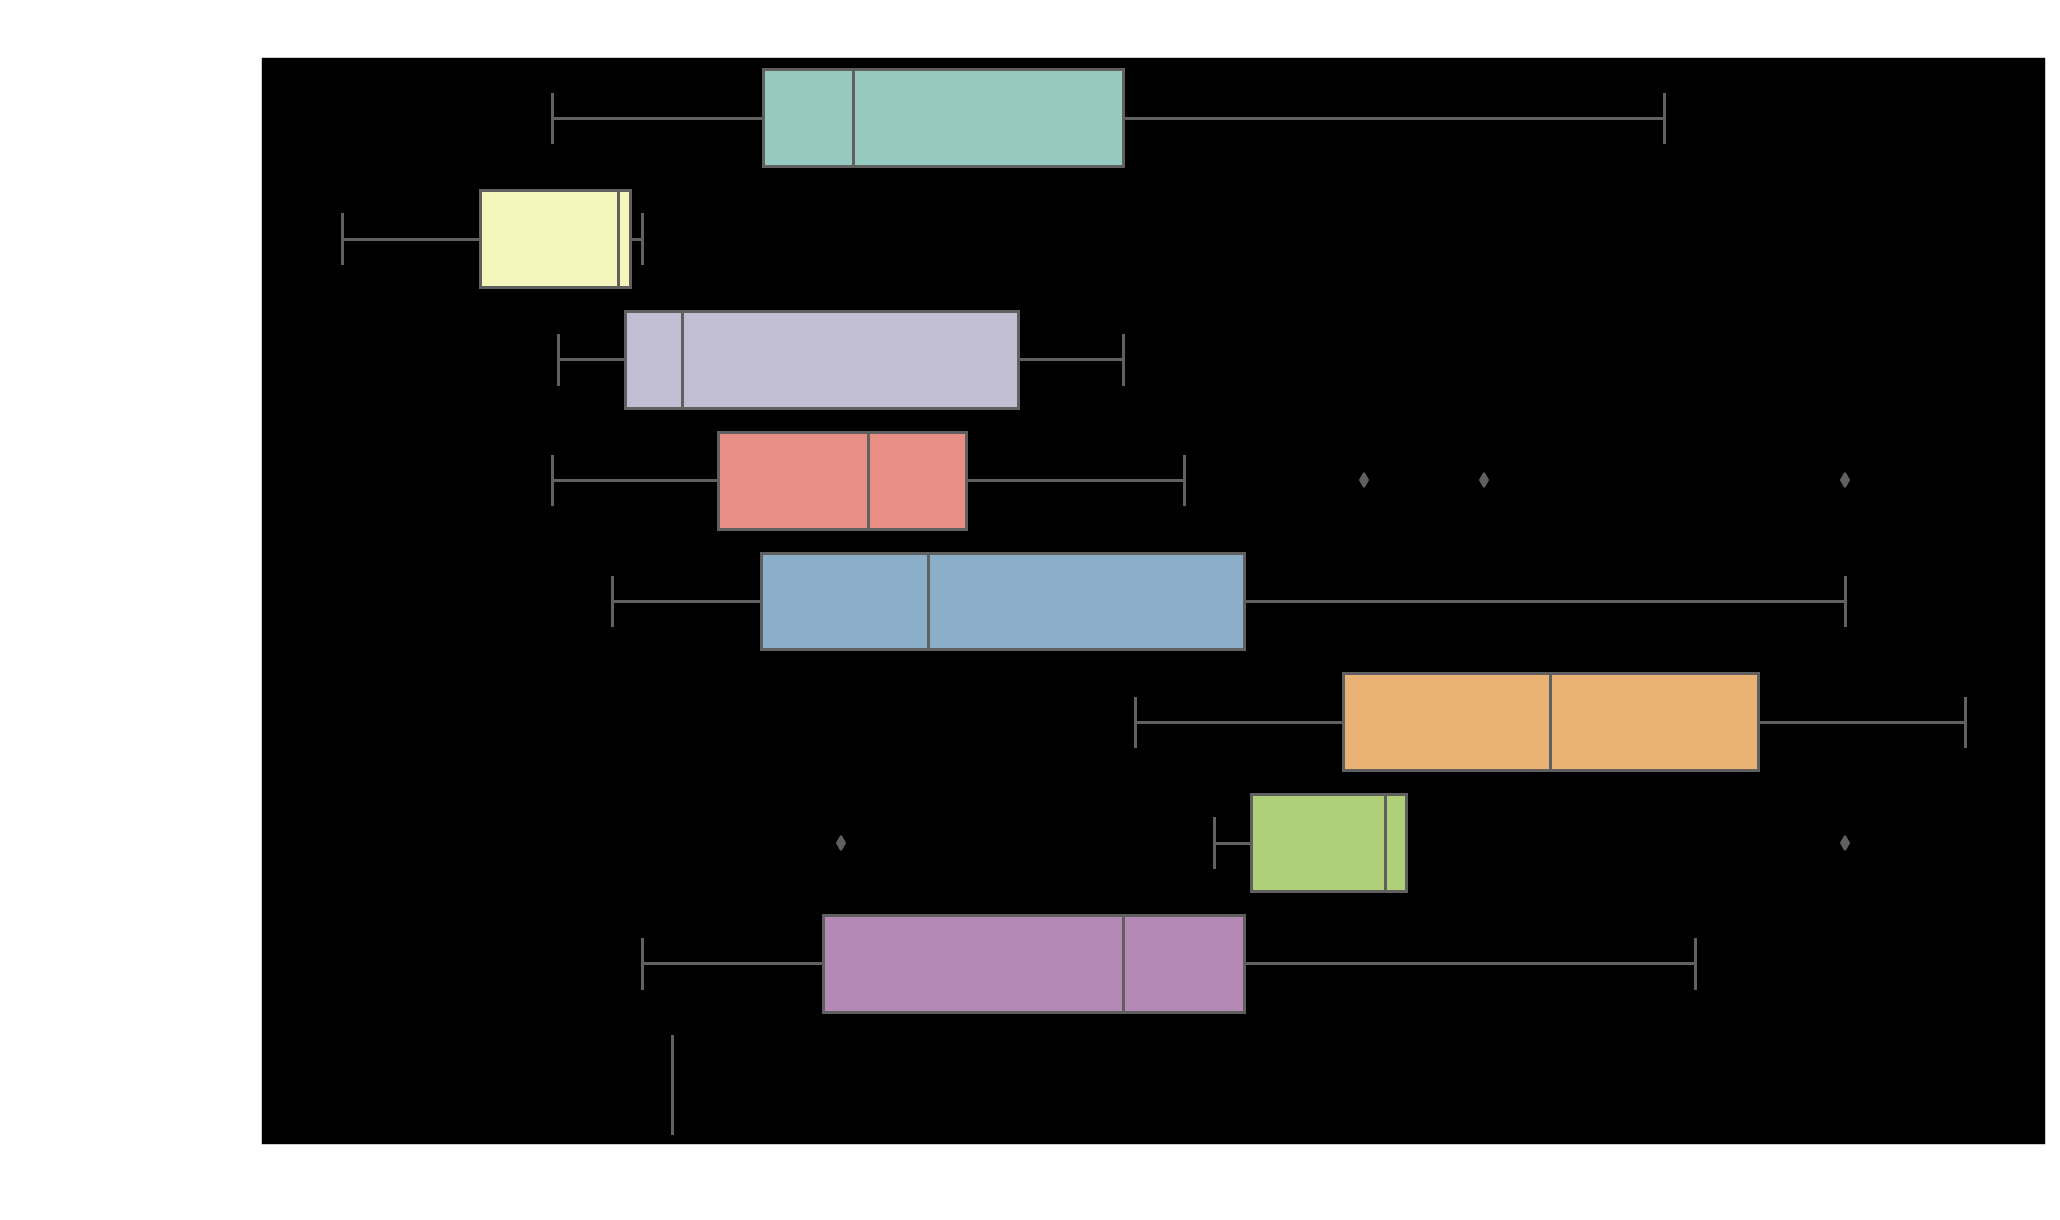

In [0]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Seniority", data=data_scientist)
plt.title('Distribution of average salary by seniority', fontsize=20)
plt.show()

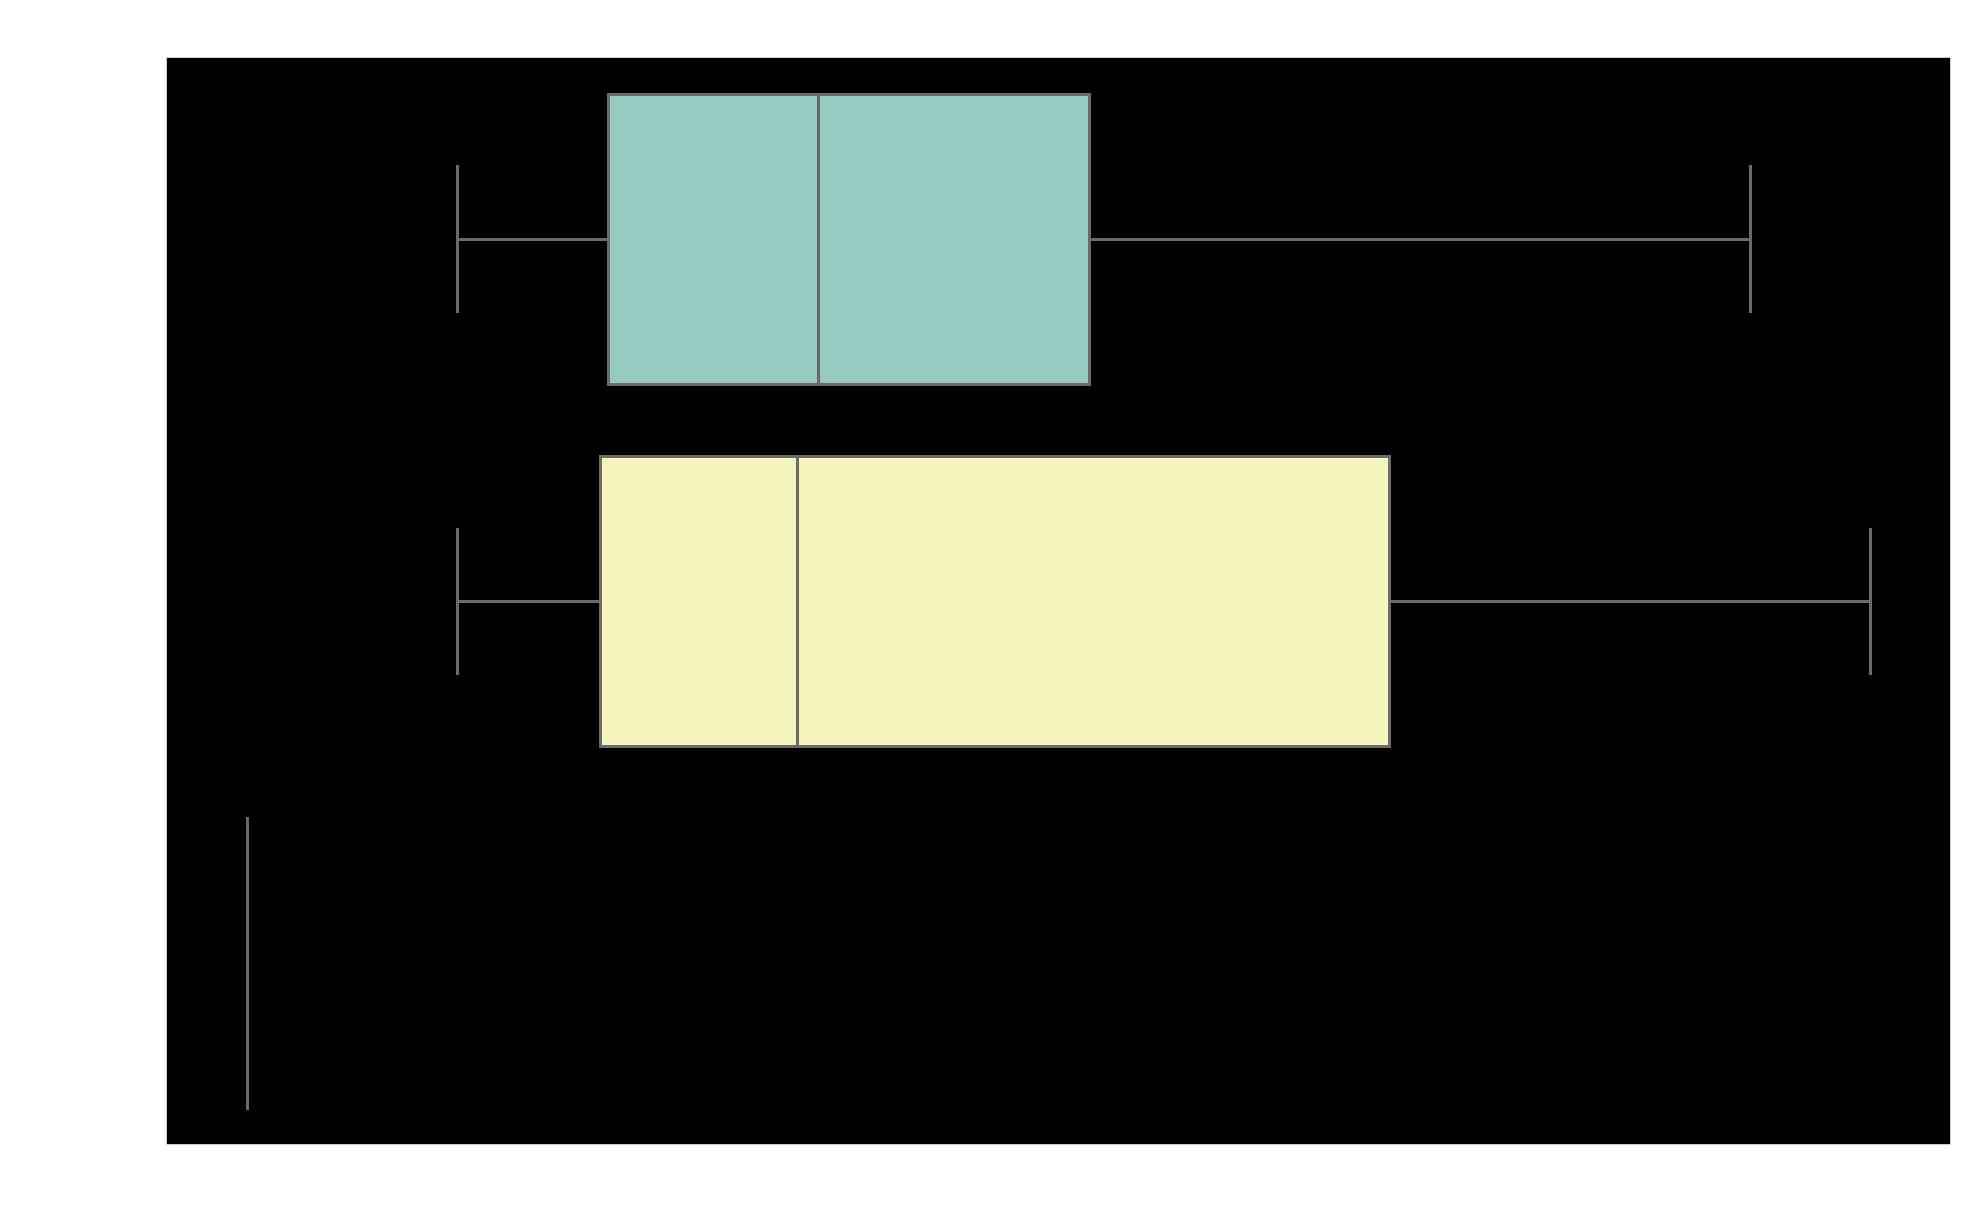

In [0]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Salary_Average", y="Employment_Type", data=data_scientist)
plt.title('Distribution of average salary by employment type', fontsize=20)
plt.show()

## Seniority/Roles Postings

In [0]:
test=data_scientist["Seniority"].value_counts()
test=test.reindex(progression)
x=progression
y=test.values.tolist()

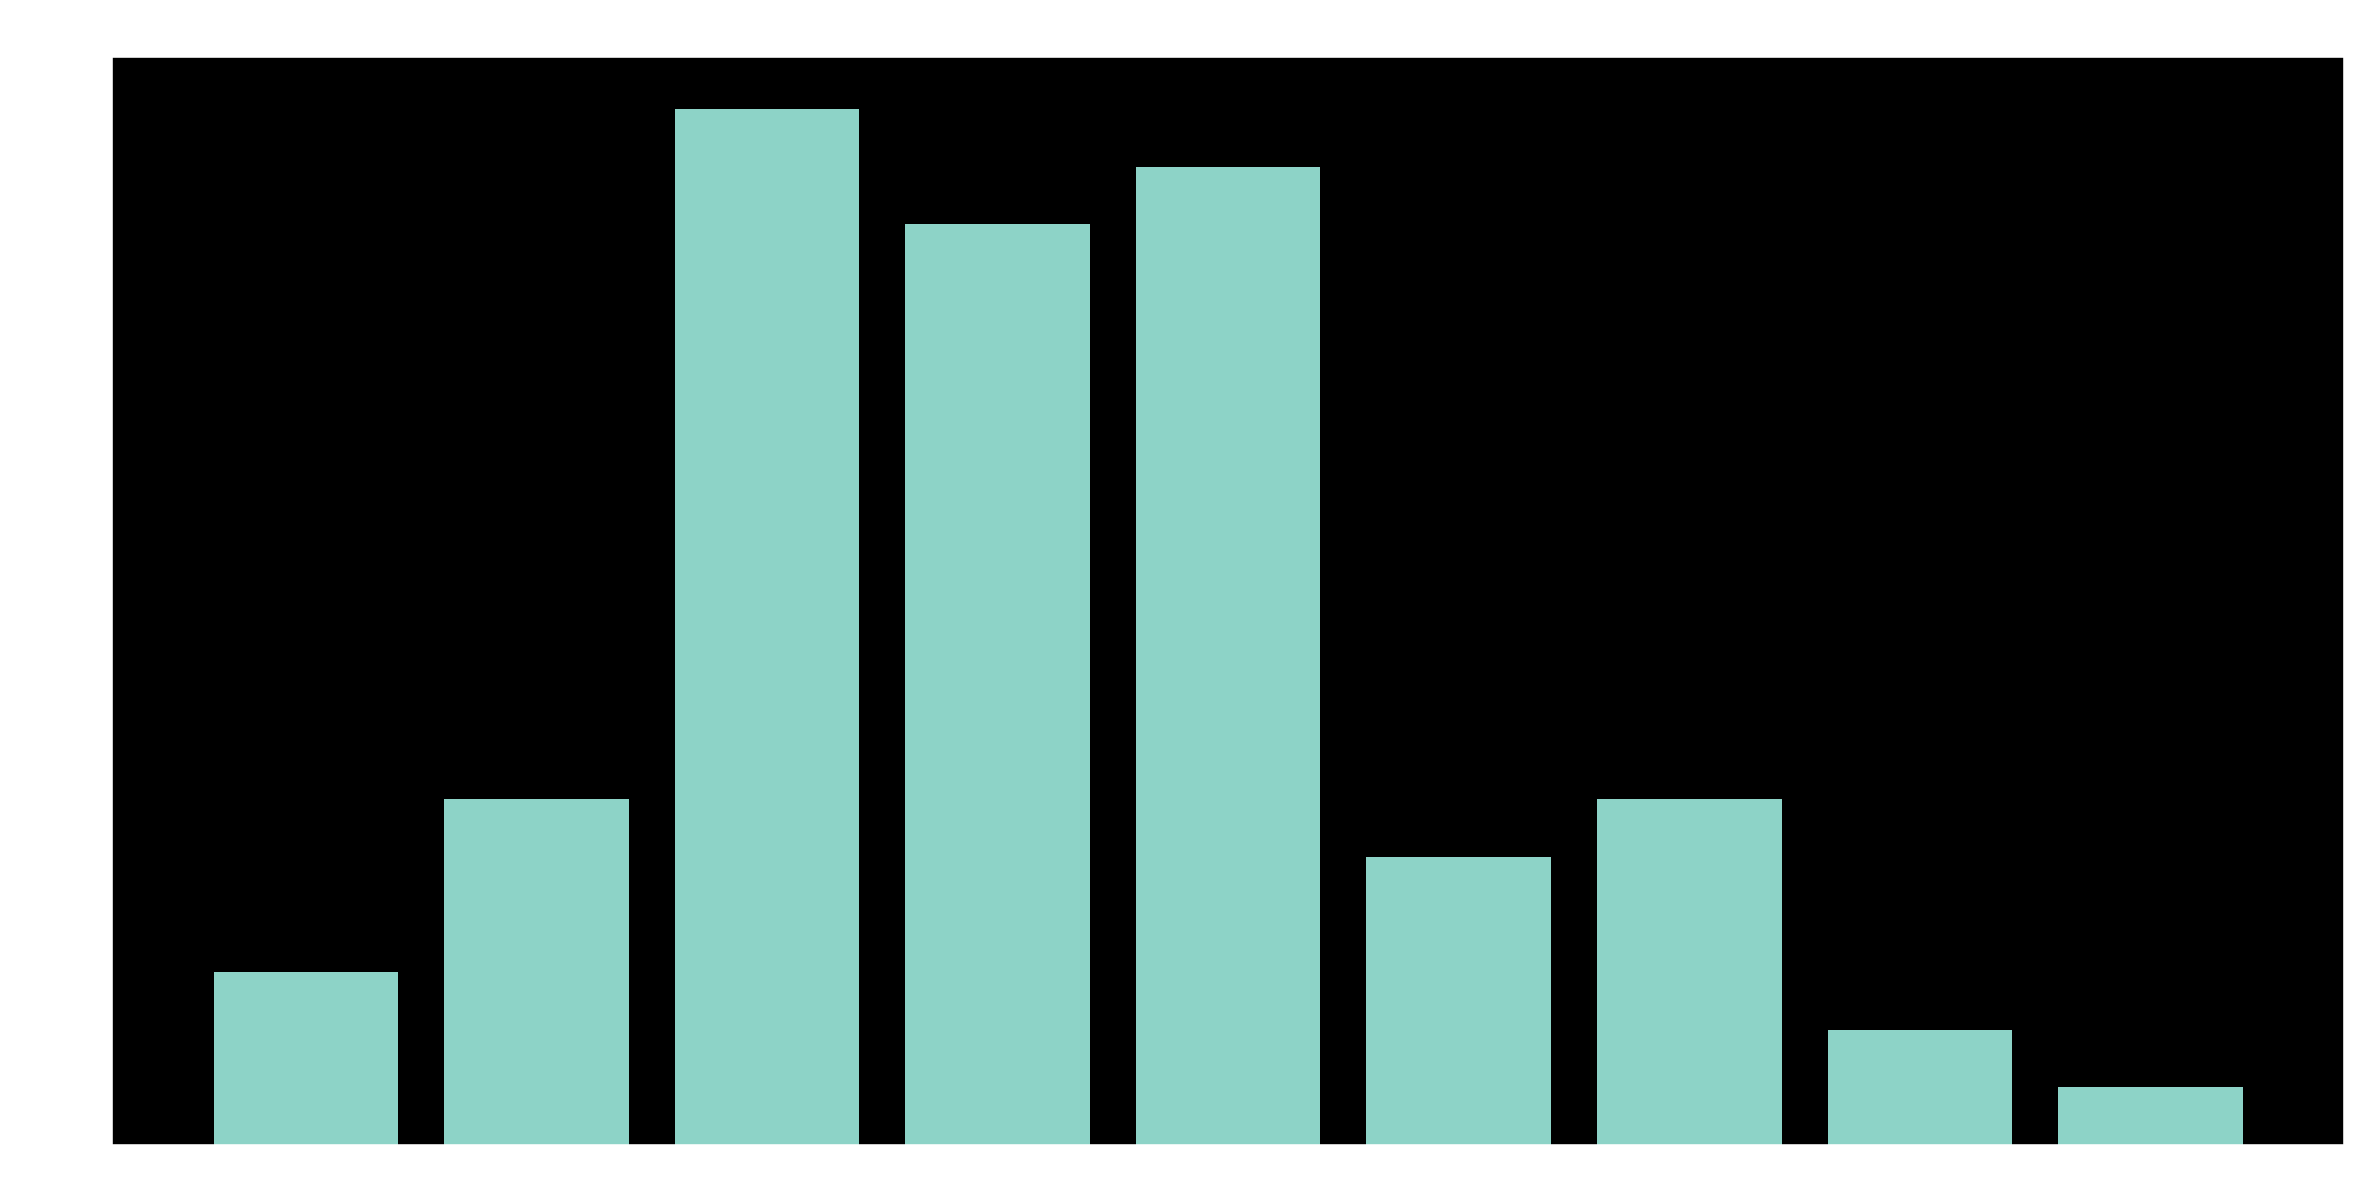

In [0]:
plt.bar(x,y)
plt.title(
    "Levels of seniority most commonly seen in job postings", fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.rcParams["figure.figsize"] = (20, 10) # (w, h)
plt.show()

## Employment Type Postings

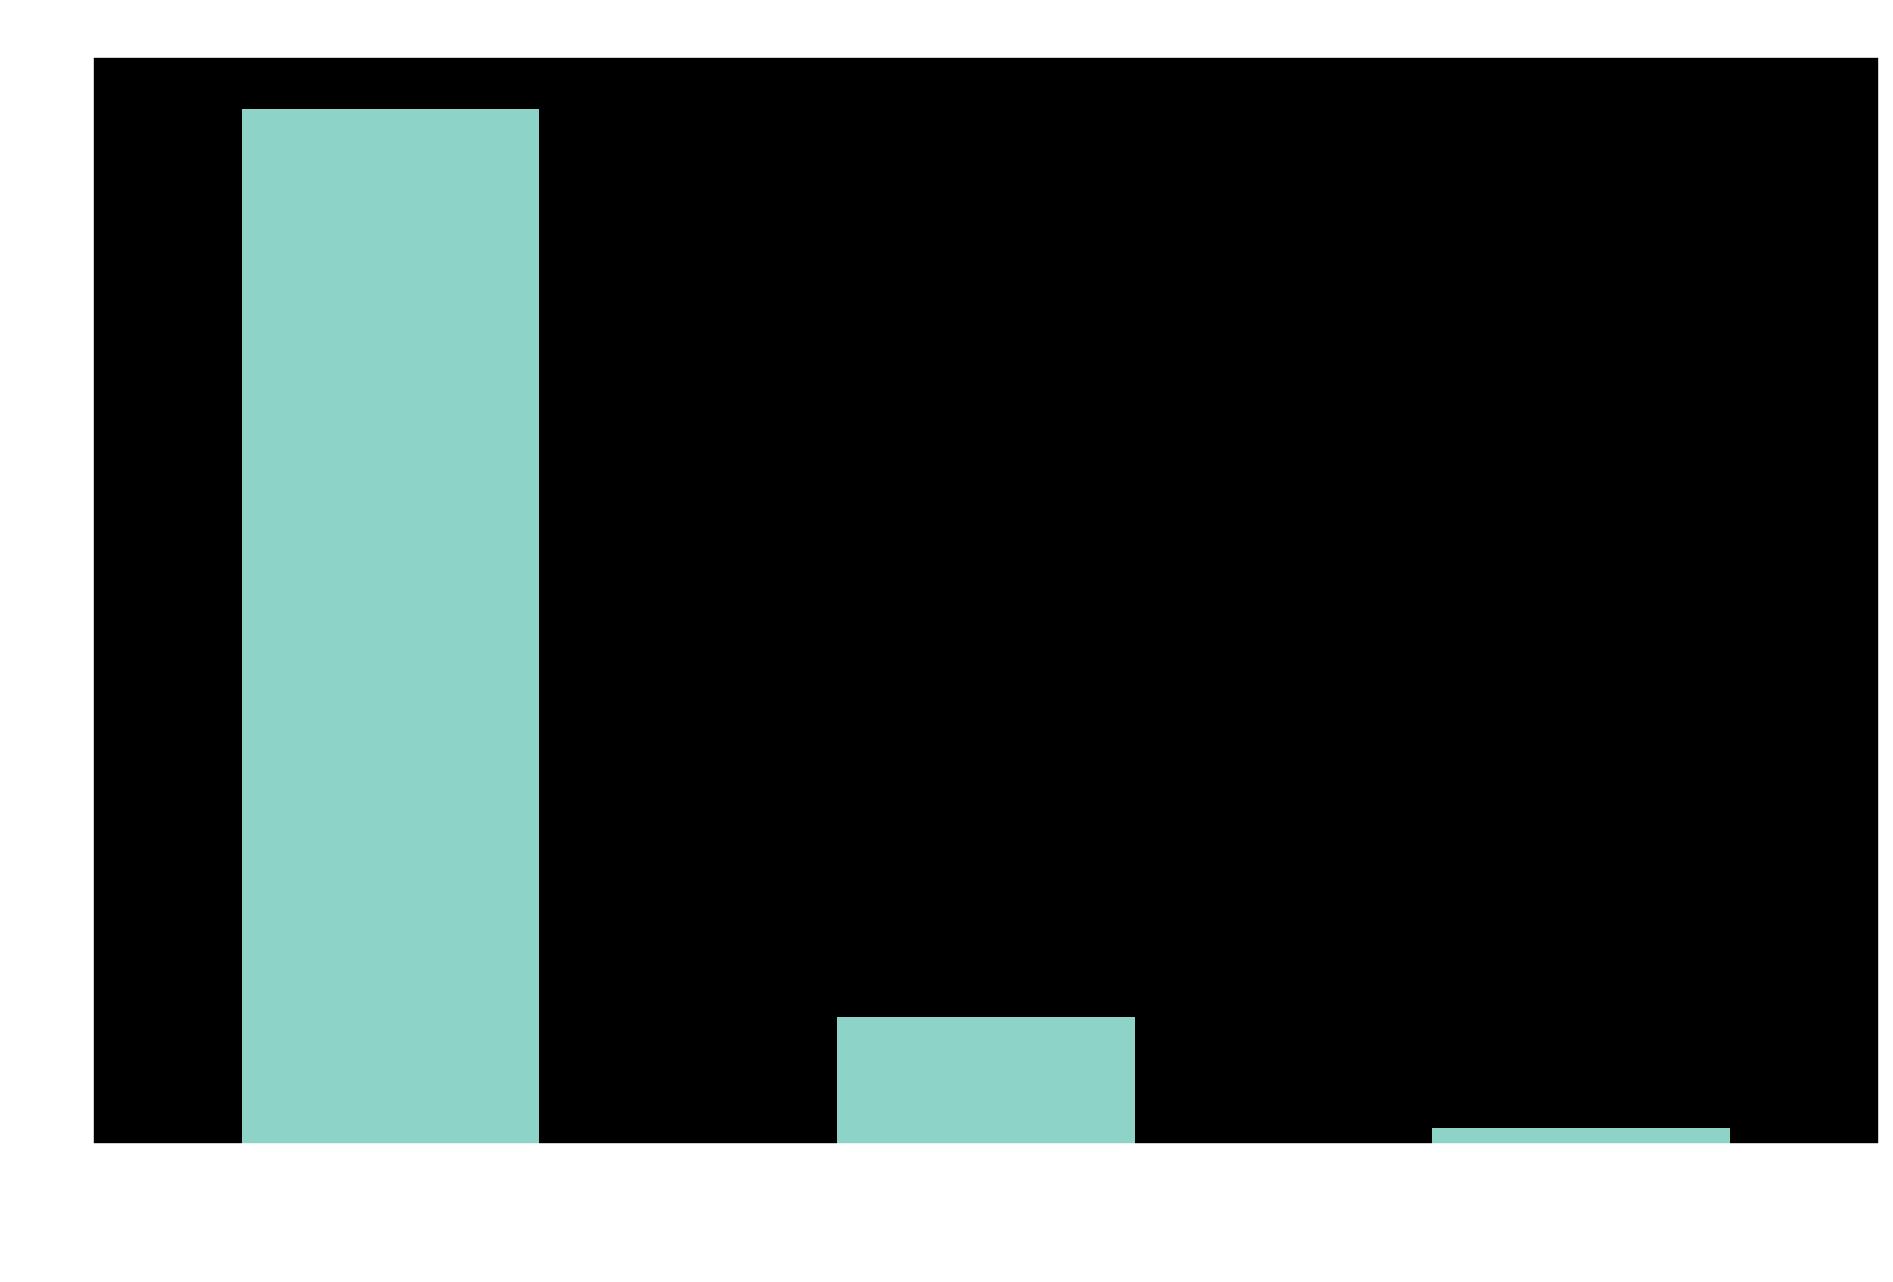

In [0]:
data_scientist["Employment_Type"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "Most frequently cited employment conditions in job postings", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)
plt.show()

 ## Qualitative Measures

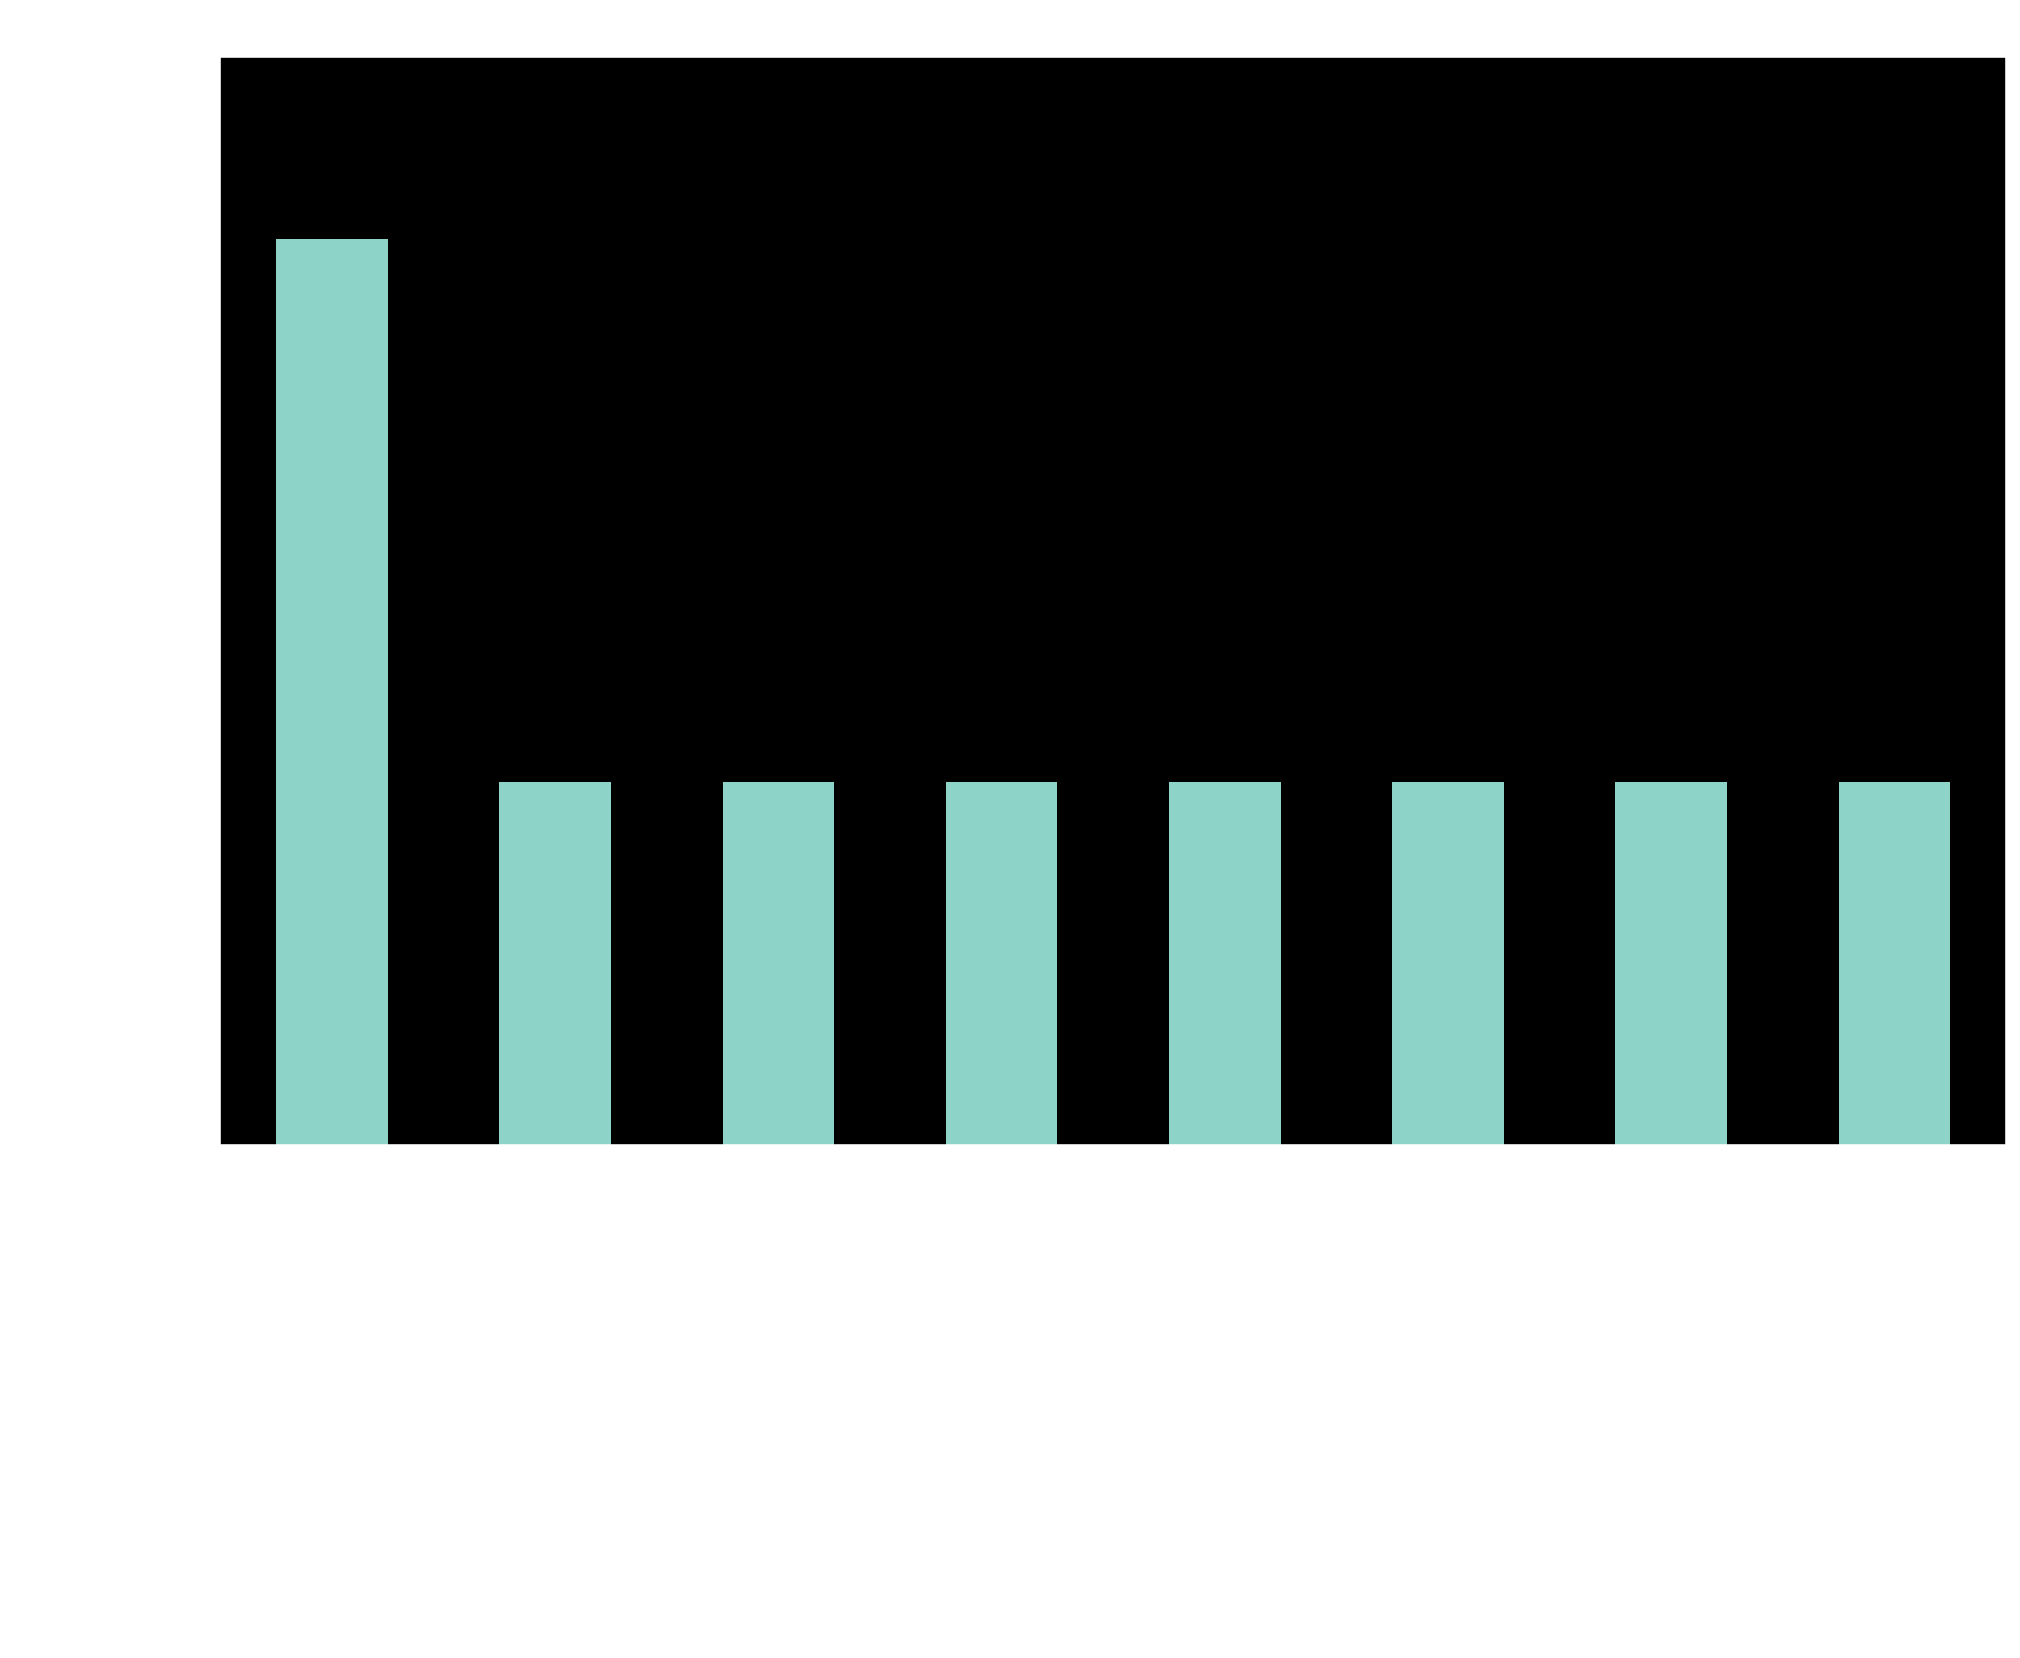

In [0]:
data_scientist["Category"].value_counts().plot(kind="bar", figsize=(16, 10))
plt.title(
    "Industries related to roles", fontsize=20
)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.xlim(1.5, 9.5)
plt.ylim(0,6)
plt.show()

In [0]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
vect.fit(data_scientist['Responsibilities'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 321


In [0]:
responsibility = vect.get_feature_names()
responsibility

['ability',
 'ability work',
 'able',
 'accuracy',
 'actionable',
 'advanced',
 'advantage',
 'agile',
 'ai',
 'algorithms',
 'analysis',
 'analysts',
 'analytic',
 'analytical',
 'analytics',
 'analyze',
 'analyzing',
 'andor',
 'applications',
 'applied',
 'apply',
 'applying',
 'architecture',
 'areas',
 'artificial',
 'artificial intelligence',
 'background',
 'based',
 'best',
 'better',
 'big',
 'big data',
 'build',
 'building',
 'business',
 'business problems',
 'candidates',
 'candidates notified',
 'capabilities',
 'challenges',
 'classification',
 'client',
 'closely',
 'cloud',
 'clustering',
 'code',
 'collaboration',
 'collaborative',
 'communicate',
 'communication',
 'communication skills',
 'company',
 'complex',
 'computer',
 'computer science',
 'concepts',
 'contribute',
 'core',
 'create',
 'critical',
 'culture',
 'customer',
 'customers',
 'data',
 'data analytics',
 'data mining',
 'data science',
 'data scientist',
 'data scientists',
 'data sets',
 'data sour

In [0]:
resp = pd.DataFrame(vect.transform(data_scientist['Responsibilities']).todense(),
                       columns=responsibility)

In [0]:
responsibility_count = resp.sum(axis=0)
responsibility_count.sort_values(ascending = False).head(30)

data                646
learning            236
machine             186
machine learning    181
experience          162
work                147
business            143
science             140
team                133
models              131
analytics           114
skills              103
knowledge           102
strong              86 
development         81 
analysis            81 
algorithms          81 
working             81 
data science        80 
statistical         80 
develop             79 
python              74 
new                 74 
design              74 
computer            73 
tools               69 
using               67 
ability             65 
engineering         64 
techniques          60 
dtype: int64

In [0]:
top_responsibility = responsibility_count.sort_values(ascending = False).head(30)

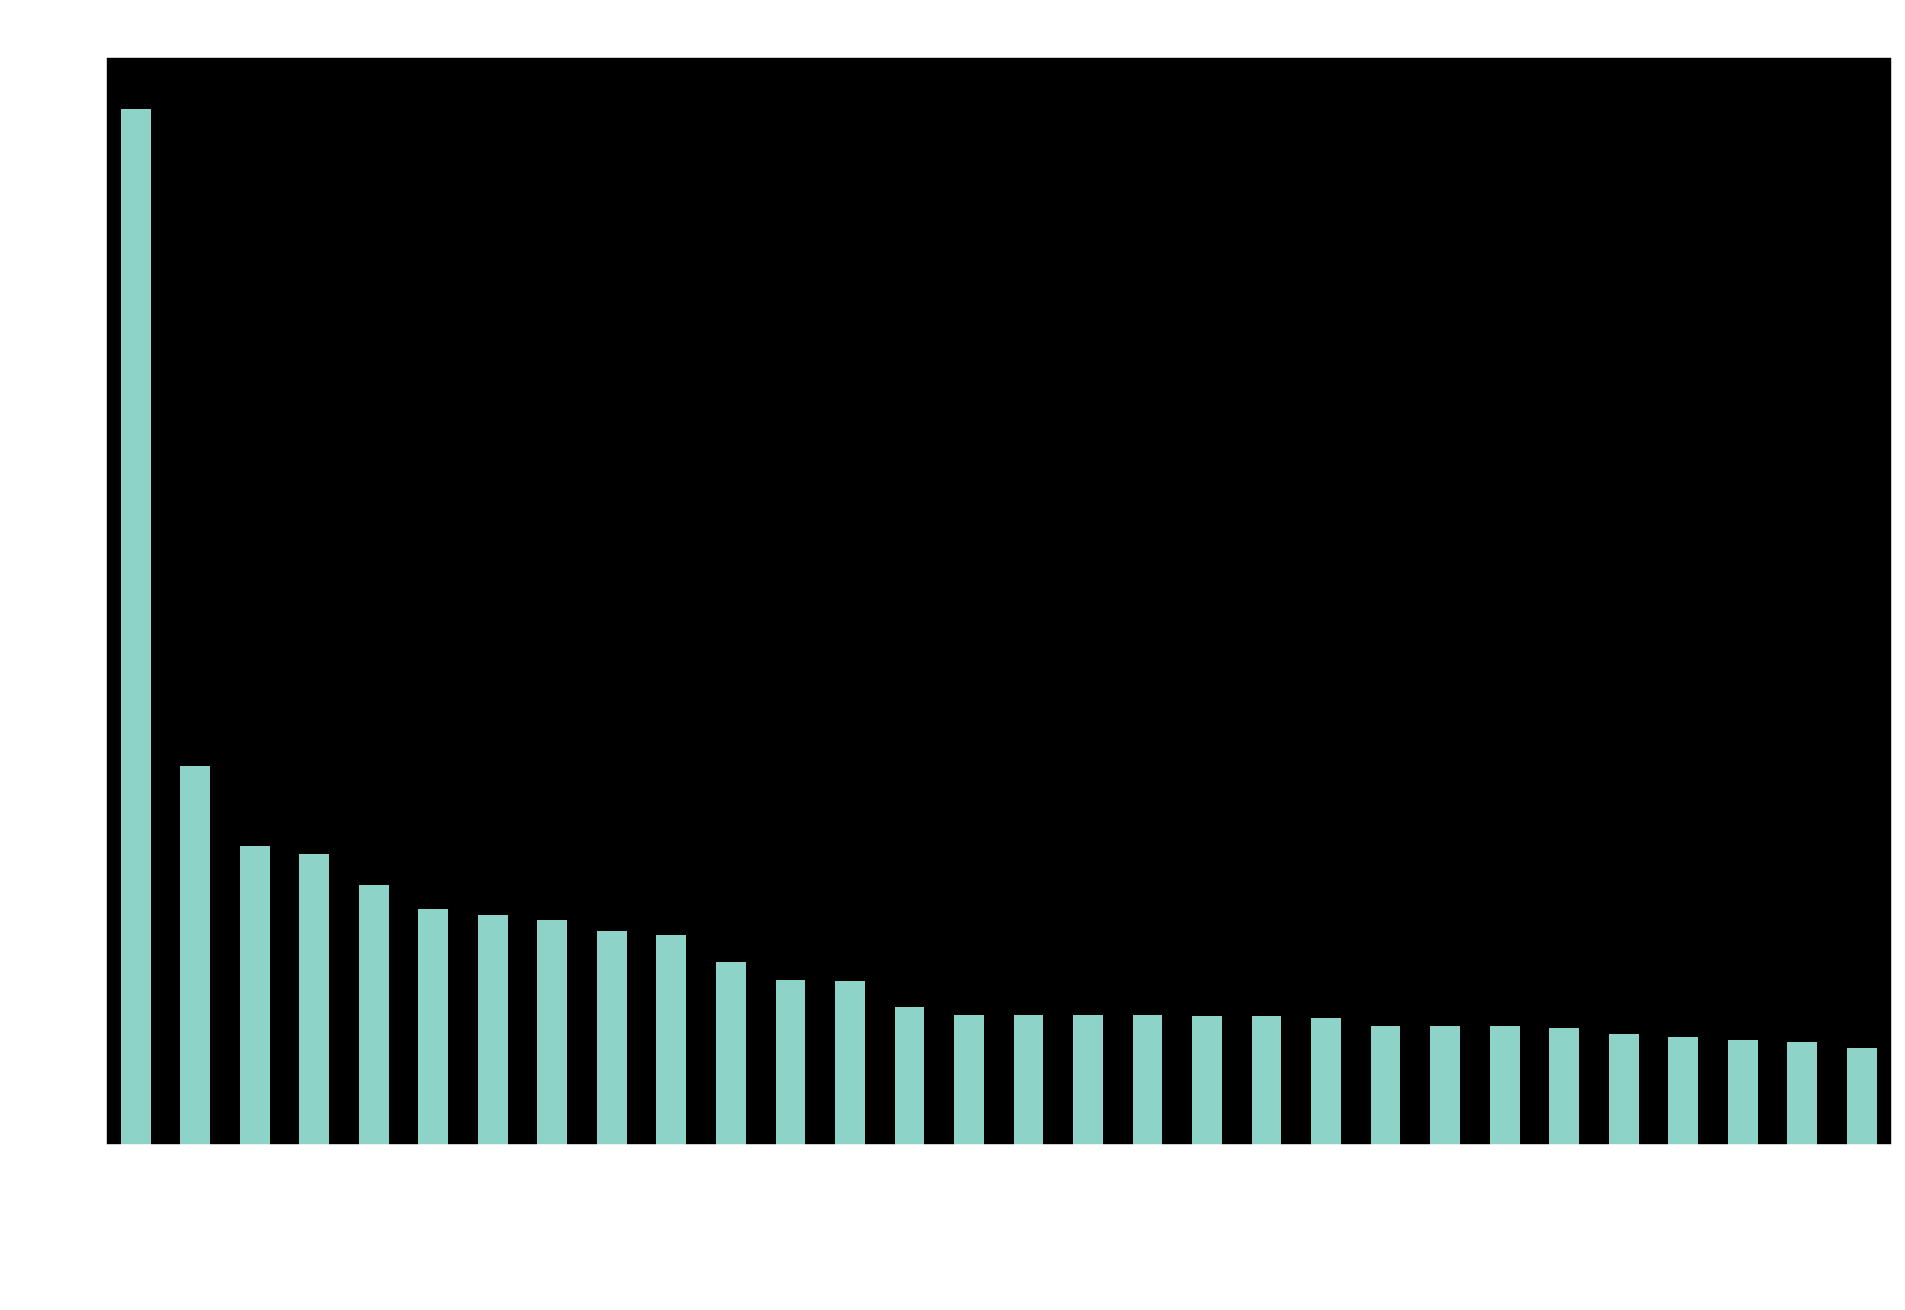

In [0]:
top_responsibility.plot(kind="bar", figsize=(16, 10))
plt.title('Top 30 words used to describe responsibilities in roles', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.show()

In [0]:
vect = CountVectorizer(stop_words='english', min_df=10, ngram_range=(1,2))
vect.fit(data_scientist['Skills'])

print('# of features: {}'.format( len(vect.get_feature_names()) ))

# of features: 35


In [0]:
skills = vect.get_feature_names()
skills

['algorithms',
 'analysis',
 'analysis data',
 'analytics',
 'artificial',
 'artificial intelligence',
 'big',
 'big data',
 'business',
 'data',
 'data analysis',
 'data data',
 'data mining',
 'data science',
 'development',
 'hadoop',
 'hadoop java',
 'intelligence',
 'java',
 'java machine',
 'learning',
 'learning python',
 'machine',
 'machine learning',
 'management',
 'mining',
 'mining data',
 'mining hadoop',
 'modeling',
 'predictive',
 'python',
 'research',
 'science',
 'statistical',
 'statistics']

In [0]:
resp = pd.DataFrame(vect.transform(data_scientist['Skills']).todense(),
                       columns=skills)

In [0]:
skills_count = resp.sum(axis=0)
skills_count.sort_values(ascending = False).head(30)

data                       192
learning                   62 
machine learning           58 
machine                    58 
analysis                   54 
data data                  50 
python                     45 
mining                     40 
data mining                40 
science                    35 
analysis data              35 
data analysis              35 
hadoop                     31 
analytics                  30 
java                       28 
big                        25 
big data                   25 
algorithms                 24 
data science               24 
management                 23 
statistics                 20 
development                18 
learning python            18 
mining data                18 
hadoop java                17 
java machine               17 
intelligence               15 
business                   14 
artificial                 14 
artificial intelligence    13 
dtype: int64

In [0]:
top_skills = skills_count.sort_values(ascending = False).head(30)

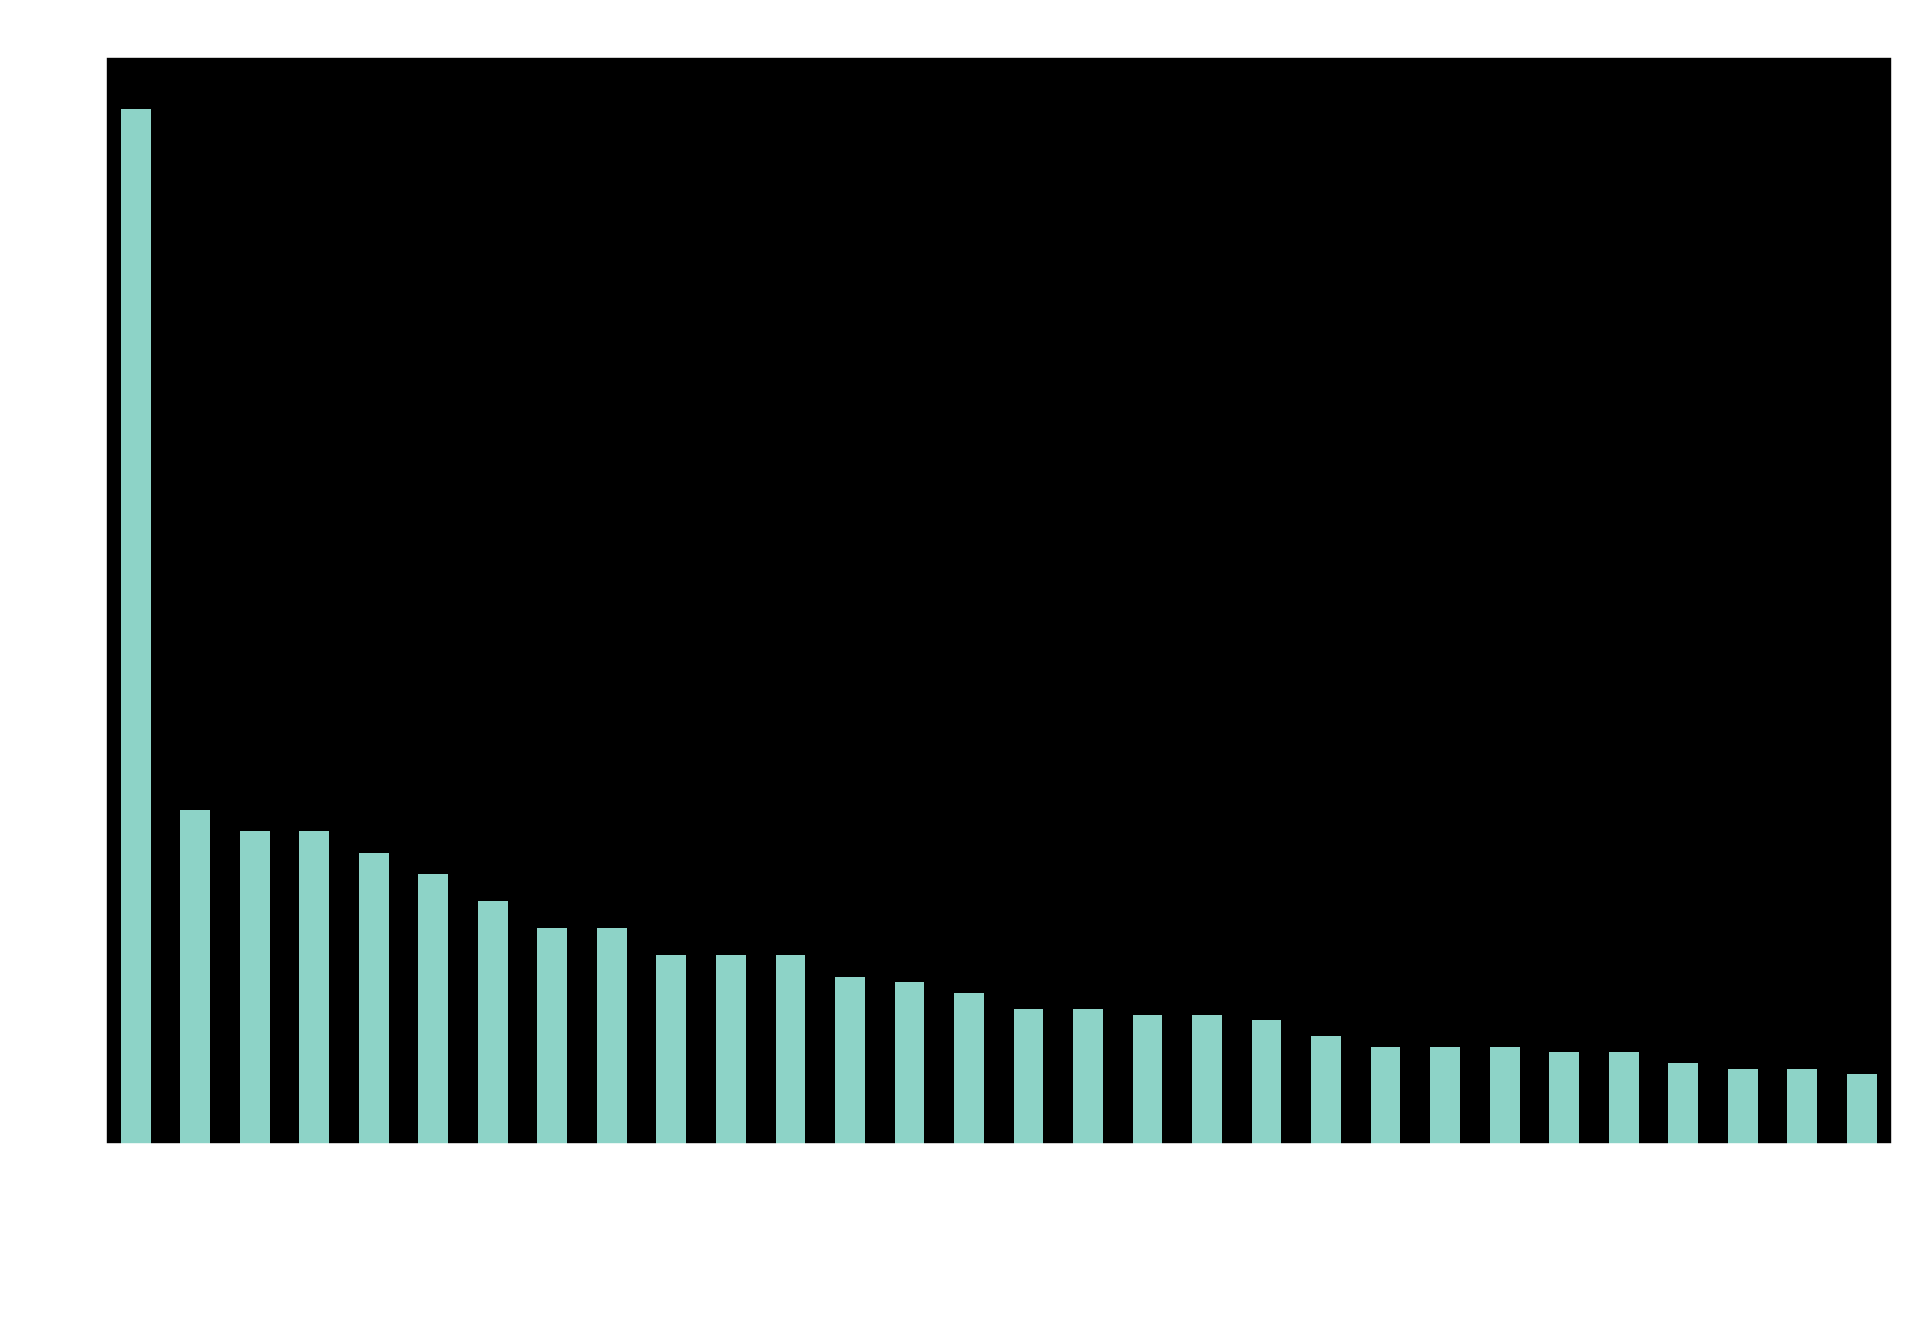

In [0]:
top_skills.plot(kind="bar", figsize=(16, 10))
plt.title('Top 30 words used to describe skills in roles', fontsize=20)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(rotation=45,ha='right')
plt.show()

Since there are so many research roles, let's take a look at them

# 5. Modelling

In [0]:
from scipy import stats
from scipy.stats import norm, skew

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import statsmodels.formula.api as smf
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, r2_score, classification_report

## Can we predict what the market is willing to pay given certain features?

Not exactly
XGBoost R2 0.56, LR R2 0.51

### Training Regression models

Similar features
* Company, Postal, Address
* Title, Seniority, Roles
* Responsbilities, Skills
* Employment_Type
* Category
* Applications


We trialed and errored several features and found that the ones below produced a better fit

<br> When too many features were added, the Lasso Regression performed far better than the Linear Regression suggesting a few features were doing the prediction

<br> Surprisingly 'Roles' or 'Title' did not help the baseline regression

In [0]:
features = ['Company','Seniority','Employment_Type']

#### Output Variable

In [0]:
output_var = jobs.Salary_Average

count    756.000000  
mean     6548.881614 
std      3181.184350 
min      1450.000000 
25%      4500.000000 
50%      5850.000000 
75%      7500.000000 
max      29000.000000
Name: Salary_Average, dtype: float64
Skewness: 2.036423
Kurtosis: 6.556700


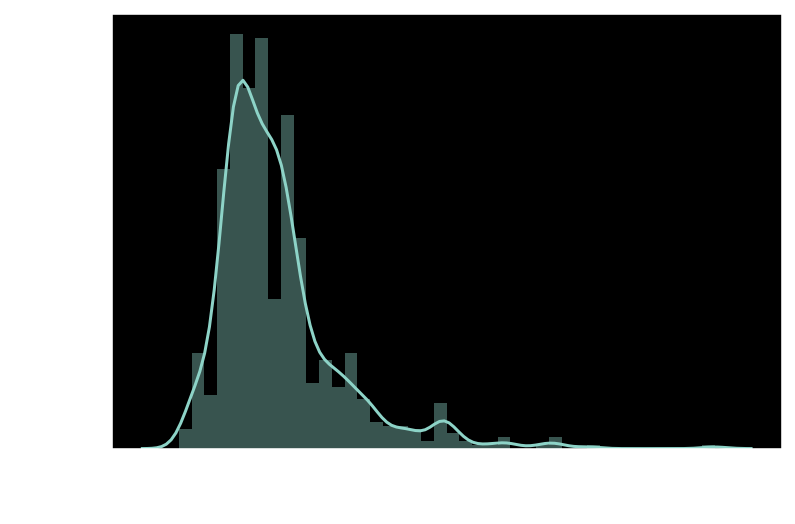

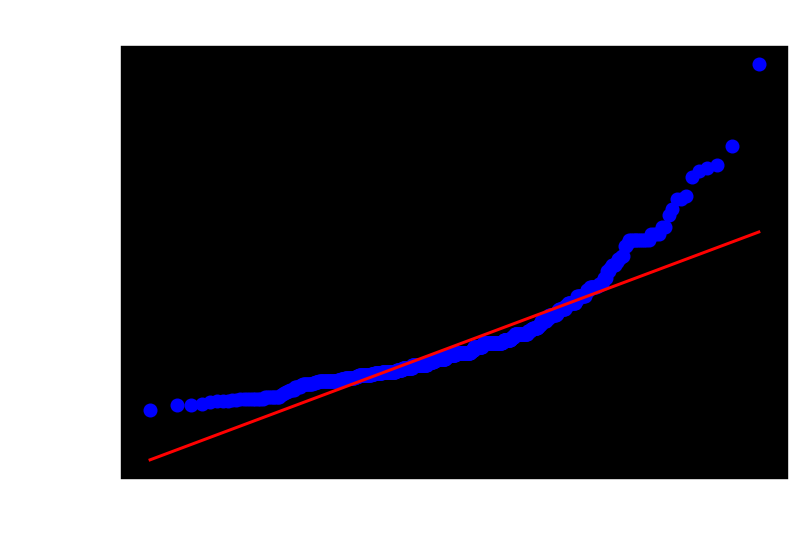

In [0]:
output_var_name = 'Salary_Average'
output_var = jobs[output_var_name]
print(output_var.describe())
sns.distplot(output_var)
print("Skewness: %f" % output_var.skew())
print("Kurtosis: %f" % output_var.kurt())
fig = plt.figure()
res = stats.probplot(jobs[output_var_name], plot=plt)
plt.show()

We normalize the salary for regression


 mu = 8.69 and sigma = 0.43



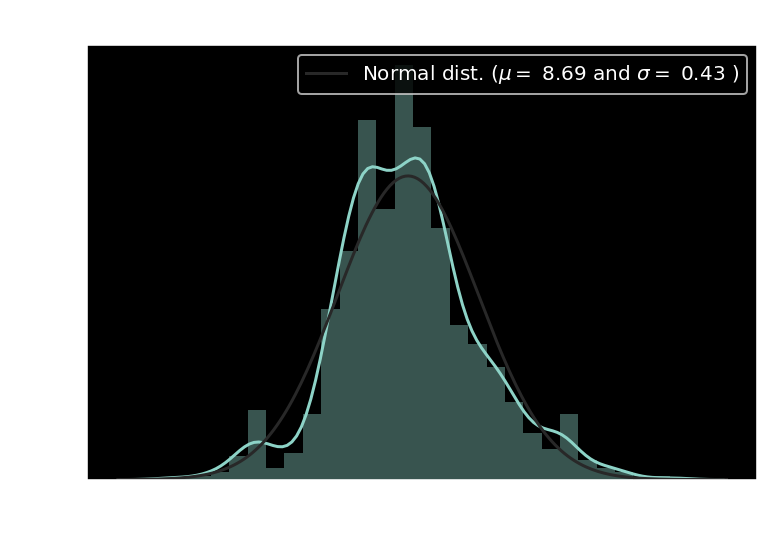

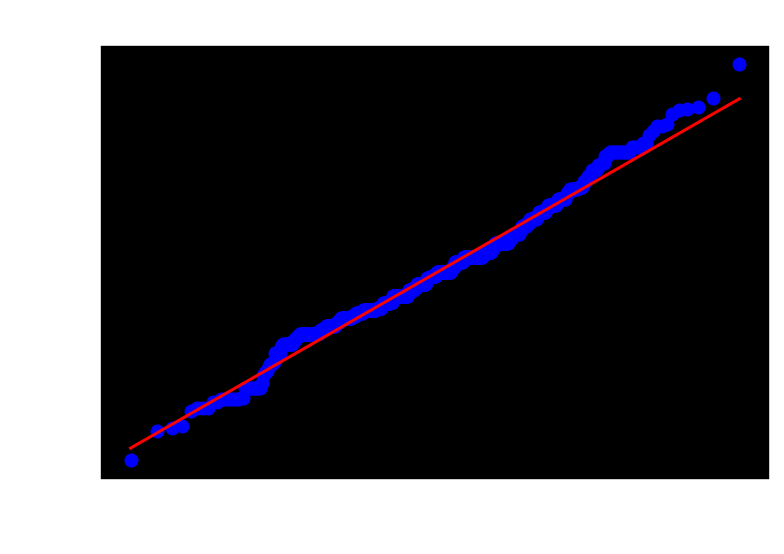

In [0]:
salary = np.log1p(jobs[output_var_name])
sns.distplot(salary , fit=norm);

(mu, sigma) = norm.fit(salary)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(salary, plot=plt)
plt.show()

#### Simple Linear Regression

In [0]:
simple_features = jobs[features]

In [0]:
simple_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 847
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          756 non-null    object
 1   Seniority        756 non-null    object
 2   Employment_Type  756 non-null    object
dtypes: object(3)
memory usage: 23.6+ KB


In [0]:
numerical_features = simple_features.select_dtypes(include=['int64','float64']).columns
categorical_features = simple_features.select_dtypes(include=['object']).columns

preprocess = make_column_transformer(
       (make_pipeline(StandardScaler()), numerical_features),
       (make_pipeline(OneHotEncoder()), categorical_features))

training_set_pp = preprocess.fit_transform(simple_features)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    training_set_pp,
    salary,
    test_size=0.2,
    random_state=42,
    )

In [0]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [0]:
r2 = r2_score(y_test,y_pred)
print("R2 Score: {:.5f}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

R2 Score: 0.51459
RMSE: 0.30


#### Tuning

In [0]:
alpha=[0.01,0.001,0.0075,0.005]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'alpha': alpha,
    }
random_cv = RandomizedSearchCV(estimator=Las,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)
print(random_cv.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done  18 out of  20 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    2.8s finished


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [0]:
alpha=[0.01,0.001,0.0075,0.005]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'alpha': alpha,
    }
random_cv = RandomizedSearchCV(estimator=ridge,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)
print(random_cv.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


[Parallel(n_jobs=4)]: Done  18 out of  20 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.4s finished


In [0]:
n_estimators = [500, 1000, 250, 750, 1250]
max_depth = [2, 3, 5, 7, 10]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.2]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator=model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)
print(random_cv.best_estimator_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   25.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.6min finished


XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=None, n_estimators=250, n_jobs=0,
             nthread=None, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)


In [0]:
n_estimators = [500, 1000, 250, 750, 1250]
learning_rate=[0.05,0.1,0.15,0.2]
max_depth=[2,3,4,5]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    }
random_cv = RandomizedSearchCV(estimator=GBoost,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train,y_train)
print(random_cv.best_estimator_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   37.5s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.7min finished


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='huber',
                          max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=1250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


#### Lasso Regression

In [0]:
Las = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Las.fit(X_train,y_train)
y_pred=Las.predict(X_test)

In [0]:
r2 = r2_score(y_test,y_pred)
print("R2 Score: {:.5f}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

R2 Score: 0.49490
RMSE: 0.31


#### Ridge Regression

In [0]:
ridge = Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)

In [0]:
r2 = r2_score(y_test,y_pred)
print("R2 Score: {:.5f}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

R2 Score: 0.51898
RMSE: 0.30


#### Boosting

In [0]:
model = xgb.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=None, n_estimators=250, n_jobs=0,
             nthread=None, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [0]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [0]:
r2 = r2_score(y_test,y_pred)
print("R2 Score: {:.5f}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

R2 Score: 0.56630
RMSE: 0.29


In [0]:
GBoost = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='huber',
                          max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=1250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
GBoost.fit(X_train,y_train)
y_pred=GBoost.predict(X_test)

In [0]:
r2 = r2_score(y_test,y_pred)
print("R2 Score: {:.5f}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

R2 Score: 0.39033
RMSE: 0.34


### We now attempt to add skills into the features and see if we get better Regression results 
Very slight increase with XGBoost

In [0]:
skills_encoded = jobs.Skills.apply(lambda x: x.split(' '))
skills_encoded = skills_encoded.str.join('|').str.get_dummies()

In [0]:
complex_features = pd.concat([simple_features,skills_encoded],axis=1)

In [0]:
complex_features.fillna(0,inplace=True)

In [0]:
categorical_features = complex_features.select_dtypes(include=['object']).columns
numerical_features = complex_features.select_dtypes(include=['int']).columns

preprocess = make_column_transformer(
    (make_pipeline(OneHotEncoder()), categorical_features,),
    remainder='passthrough')

complex_features = preprocess.fit_transform(complex_features)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    complex_features,
    salary,
    test_size=0.2,
    random_state=42,
    )

In [0]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [0]:
r2 = r2_score(y_test,y_pred)
print("R2 Score: {:.5f}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

R2 Score: -1920751108820067866902528.00000
RMSE: 605174118756.62


In [0]:
model = xgb.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=None, n_estimators=250, n_jobs=0,
             nthread=None, num_parallel_tree=1, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [0]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [0]:
r2 = r2_score(y_test,y_pred)
print("R2 Score: {:.5f}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

R2 Score: 0.57410
RMSE: 0.28


In [0]:
Las = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Las.fit(X_train,y_train)
y_pred=Las.predict(X_test)

In [0]:
r2 = r2_score(y_test,y_pred)
print("R2 Score: {:.5f}".format(r2))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: {:.2f}".format(rmse))

R2 Score: 0.49511
RMSE: 0.31


## Can we classify if someone has high pay based on their features?

Precision: RF > Log Reg > Linear SVC
<br> Recall: Linear SVC > Log Reg > RF
<br> The marginal benefits of increased recall in the other models seem redundant when RF can precisely predict high salary
<br> Hence when the model predicts high salary, you know its probably right but the chance of it predicting accurately is low. This might be due to the naturally skewed data of high pay vs low pay 

### We now try a different approach: Classification

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
import seaborn as sns

from scipy.sparse.csr import csr_matrix
from scipy.sparse import hstack, vstack
from sklearn import metrics
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC

In [0]:
jobs.describe()

,Applications,Salary_Min,Salary_Max,Salary_Average
count,756.000000,756.000000,756.000000,756.000000
mean,9.037037,5018.452381,8079.310847,6548.881614
std,15.200948,2372.407943,4137.810823,3181.184350
min,0.000000,1400.000000,1500.000000,1450.000000
25%,2.000000,3500.000000,5500.000000,4500.000000
50%,4.000000,4500.000000,7000.000000,5850.000000
75%,10.000000,6000.000000,9000.000000,7500.000000
max,139.000000,20000.000000,38000.000000,29000.000000


In [0]:
jobs.Salary_Average.median()

5850.0

In [0]:
jobs['High_Salary_Or_Not'] = np.where(jobs['Salary_Average'] > (3181+5850), 1, 0)

In [0]:
jobs['High_Salary_Or_Not'].value_counts()

0    643
1    113
Name: High_Salary_Or_Not, dtype: int64

NOTE:  
We are naturally dealing with an imbalanced class here, as high-paying jobs are obviously harder to come by. Subsequent modelling and analysis of the confusion matrices will have to take note of this. 

In [0]:
predictors = ['Company','Seniority','Employment_Type','Title']

In [0]:
# Since I'll be using a non-linear model like Random Forest, I won't apply the drop_first parameter 
job_predictors = pd.get_dummies(jobs[predictors])

In [0]:
X = job_predictors
y = jobs['High_Salary_Or_Not']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [0]:
print((X_train.shape))
print((X_test.shape))

(567, 889)
(189, 889)


In [0]:
print(y_test.value_counts())
# 0: low salary, 1: high salary

0    161
1    28 
Name: High_Salary_Or_Not, dtype: int64


#### Dummy Classifier

In [0]:
dummy = DummyClassifier(strategy='stratified', random_state=42)

In [0]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

In [0]:
dummy_pred = dummy.predict(X_test)

In [0]:
print("Accuracy Score:", accuracy_score(y_test, dummy_pred))
print("Precision Score : ", precision_score(y_test, dummy_pred))
print("Recall Score:", recall_score(y_test, dummy_pred))
print("f1 Score:", f1_score(y_test, dummy_pred))

Accuracy Score: 0.7513227513227513
Precision Score :  0.14814814814814814
Recall Score: 0.14285714285714285
f1 Score: 0.14545454545454545


### Trying other classifiers - RF has high precision of predictions but only 50% recall

In [0]:
models = {
    "Log_Reg": (
        LogisticRegression(),
        {
            "penalty": ["l1", "l2",'elasticnet'],
            "C": np.logspace(-4, 4, 40),
            "solver": ["liblinear"],
            "class_weight": [None, "balanced", {0: 1, 1: 75}],
        },
    ),
    "LinearSVC": (
        LinearSVC(),
        {
            "C": [10.0, 1.0, 0.1, 0.001],
            "loss": ["squared_hinge"],
            "class_weight": [None, "balanced", {0: 1, 1: 75}],
        },
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            "n_estimators": [200, 500, 1000],
            "criterion": ["gini", "entropy"],
            "class_weight": [None, "balanced", {0: 1, 1: 75}],
        },
    ),
}

In [0]:
for name, (model, parameters) in models.items():
    print("----- {} -----".format(name))
    gs = GridSearchCV(model, parameters, cv=5, verbose=0, n_jobs=-1, scoring="roc_auc")
    gs.fit(X_train, y_train)
    print("Best Parameters:", gs.best_params_)
    print("Best Score:", gs.best_score_)
    y_pred = gs.predict(X_test)
    print("Precision Score :", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("f1 Score:", f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("")

----- Log_Reg -----
Best Parameters: {'C': 88.86238162743408, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.9204157822922984
Precision Score : 0.7619047619047619
Recall Score: 0.5714285714285714
f1 Score: 0.6530612244897959
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       161
           1       0.76      0.57      0.65        28

    accuracy                           0.91       189
   macro avg       0.85      0.77      0.80       189
weighted avg       0.90      0.91      0.90       189

[[156   5]
 [ 12  16]]

----- LinearSVC -----
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'loss': 'squared_hinge'}
Best Score: 0.9171328582979583
Precision Score : 0.5454545454545454
Recall Score: 0.6428571428571429
f1 Score: 0.5901639344262296
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       161
           1       0.55      0.64      0.59    